In [145]:

#Import Important libraries
import pymssql
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import missingno as msno
import pandas as pd
import pyodbc
import pygrametl
from pygrametl.datasources import CSVSource
from pygrametl.tables import SlowlyChangingDimension

In [146]:

#Connect to the Staging Area
myconn = pyodbc.connect(r'Driver=SQL Server;Server=DESKTOP-IKFHUC3\SQLEXPRESS;Database=SA_SALES;Trusted_Connection=yes;')
cursor = myconn.cursor()

connection = pygrametl.ConnectionWrapper(myconn)
connection.setasdefault()

In [147]:
#Load Data from Stagin Area to Data Frames
order = pd.read_sql_query("select * from dbo.ORDERS", con=myconn)
test=pd.read_sql_query("select * from dbo.ORDERS", con=myconn)
custommer=order
postal= pd.read_sql_query("select * from dbo.Code_postal", con=myconn)
people= pd.read_sql_query("select * from dbo.PEOPLE", con=myconn)
returns=pd.read_sql_query("select * from dbo.RETURNSSA", con=myconn)



C:\Users\Dhia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy

C:\Users\Dhia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy

C:\Users\Dhia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy

C:\Users\Dhia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are no

In [148]:
#Nmber of Columns and Rows
order.shape

(51290, 24)

In [149]:
#Display The First 5 lines
order.sample(5)


RowIDS                  ORDERIDS  OrderDateS   ShipDateS  \
9264   42994   RS-2014-CS1845108-41965  2014-11-22  2014-11-27   
3669   25314   IN-2015-DB1340527-42022  2015-01-18  2015-01-23   
37291  25790   IN-2012-SN2056058-41132  2012-08-11  2012-08-13   
42319  39355  CA-2013-CB12025140-41514  2013-08-28  2013-09-04   
23215  29438  ID-2015-MA17560102-42152  2015-05-28  2015-06-04   

            ShipModeS   CustomerIDS      CustomerNameS     SegmentS  \
9264   Standard Class    CS-1845108         Cari Sayre    Corporate   
3669   Standard Class    DB-1340527      Denny Blanton     Consumer   
37291     First Class    SN-2056058       Skye Norling  Home Office   
42319  Standard Class  CB-120251404  Cassandra Brandow     Consumer   
23215  Standard Class   MA-17560102       Matt Abelman  Home Office   

             CityS            StateS  ...        CategoryS Sub-CategoryS  \
9264   Makhachkala          Dagestan  ...       Technology        Phones   
3669          Wuxi           Jiangsu  ...        Furniture        Chairs   
37291     Amritsar            Punjab  ...       Technology   Accessories   
42319  Los Angeles        California  ...       Technology        Phones   
23215     Caloocan  National Capital  ...  Office Supplies      Supplies   

                                           Product NameS QuantityS DiscountS  \
9264                          Apple Signal Booster, VoIP       2.0      0.00   
3669             SAFCO Executive Leather Armchair, Black      11.0      0.00   
37291                      Belkin Flash Drive, Bluetooth       6.0      0.00   
42319  invisibleSHIELD by ZAGG Smudge-Free Screen Pro...       3.0      0.20   
23215                    Kleencut Box Cutter, High Speed       8.0      0.45   

        ProfitS Shipping CostS  OrderPriorityS  PostalCodeS    SalesS  
9264    27.3000           9.00          Medium         None   273.480  
3669   656.3700         595.50            High         None  5049.000  
37291   72.9000          43.10        Critical         None   251.640  
42319   15.1116           1.33          Medium         None    43.176  
23215  -58.2600           7.26          Medium         None   152.460  

[5 rows x 24 columns]

In [150]:
#State , Country  and Region Analytics
order.iloc[:,9:12].describe()


StateS       CountryS         RegionS
count        51290          51290           51290
unique        1104            165              23
top     California  United States  Western Europe
freq          2001           9994            5883

In [151]:
#get all the critical information in our order dataframe
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RowIDS          51290 non-null  object 
 1   ORDERIDS        51290 non-null  object 
 2   OrderDateS      51290 non-null  object 
 3   ShipDateS       51290 non-null  object 
 4   ShipModeS       51290 non-null  object 
 5   CustomerIDS     51290 non-null  object 
 6   CustomerNameS   51290 non-null  object 
 7   SegmentS        51290 non-null  object 
 8   CityS           51290 non-null  object 
 9   StateS          51290 non-null  object 
 10  CountryS        51290 non-null  object 
 11  RegionS         51290 non-null  object 
 12  MarketS         51290 non-null  object 
 13  ProductIDS      51290 non-null  object 
 14  CategoryS       51290 non-null  object 
 15  Sub-CategoryS   51290 non-null  object 
 16  Product NameS   51290 non-null  object 
 17  QuantityS       51290 non-null 

In [152]:
#Order Columns
order.columns

Index(['RowIDS', 'ORDERIDS', 'OrderDateS', 'ShipDateS', 'ShipModeS',
       'CustomerIDS', 'CustomerNameS', 'SegmentS', 'CityS', 'StateS',
       'CountryS', 'RegionS', 'MarketS', 'ProductIDS', 'CategoryS',
       'Sub-CategoryS', 'Product NameS', 'QuantityS', 'DiscountS', 'ProfitS',
       'Shipping CostS', 'OrderPriorityS', 'PostalCodeS', 'SalesS'],
      dtype='object')

In [153]:
#Data Shape
print('Data Shape :')
order.shape

Data Shape :


(51290, 24)

In [154]:
#Null Values
order.isnull().any()


RowIDS            False
ORDERIDS          False
OrderDateS        False
ShipDateS         False
ShipModeS         False
CustomerIDS       False
CustomerNameS     False
SegmentS          False
CityS             False
StateS            False
CountryS          False
RegionS           False
MarketS           False
ProductIDS        False
CategoryS         False
Sub-CategoryS     False
Product NameS     False
QuantityS         False
DiscountS         False
ProfitS           False
Shipping CostS    False
OrderPriorityS    False
PostalCodeS        True
SalesS            False
dtype: bool

In [155]:
#Verify the existance of Null Values
order.isnull().values.any()


True

In [157]:
#Display order
order

RowIDS                  ORDERIDS  OrderDateS   ShipDateS  \
0      23579   IN-2014-LC1688558-41940  2014-10-28  2014-10-30   
1      28895   IN-2014-MH1778527-41697  2014-02-27  2014-02-28   
2      51249    MO-2014-PO919586-41812  2014-06-22  2014-06-27   
3       5033   MX-2015-CS1240093-42368  2015-12-30  2016-01-05   
4        497   US-2015-JH1543055-42328  2015-11-20  2015-11-23   
...      ...                       ...         ...         ...   
51285  37560  CA-2015-YS21880140-42130  2015-05-06  2015-05-11   
51286  37508  CA-2015-YS21880140-42235  2015-08-19  2015-08-26   
51287  32690  CA-2015-YS21880140-42189  2015-07-04  2015-07-05   
51288  34367  CA-2012-YC21895140-41229  2012-11-16  2012-11-21   
51289  32050  CA-2014-YC21895140-41737  2014-04-08  2014-04-10   

            ShipModeS   CustomerIDS       CustomerNameS     SegmentS  \
0        Second Class    LC-1688558      Lena Creighton     Consumer   
1         First Class    MH-1778527         Maya Herman    Corporate   
2        Second Class     PO-919586       Phillina Ober  Home Office   
3      Standard Class    CS-1240093  Christopher Schild  Home Office   
4         First Class    JH-1543055   Jennifer Halladay     Consumer   
...               ...           ...                 ...          ...   
51285  Standard Class  YS-218801408       Yana Sorensen    Corporate   
51286  Standard Class  YS-218801404       Yana Sorensen    Corporate   
51287     First Class  YS-218801408       Yana Sorensen    Corporate   
51288  Standard Class  YC-218951406      Yoseph Carroll    Corporate   
51289     First Class  YC-218951404      Yoseph Carroll    Corporate   

               CityS            StateS  ...        CategoryS Sub-CategoryS  \
0          Bangalore         Karnataka  ...       Technology   Accessories   
1            Tianjin           Tianjin  ...  Office Supplies       Binders   
2         Casablanca  Grand Casablanca  ...  Office Supplies       Binders   
3            Managua           Managua  ...  Office Supplies           Art   
4            Choloma            Cortés  ...  Office Supplies     Envelopes   
...              ...               ...  ...              ...           ...   
51285       Columbus           Georgia  ...  Office Supplies       Binders   
51286        Seattle        Washington  ...        Furniture   Furnishings   
51287     Burlington    North Carolina  ...  Office Supplies           Art   
51288         Newark          Delaware  ...  Office Supplies       Storage   
51289  San Francisco        California  ...       Technology       Copiers   

                                           Product NameS QuantityS DiscountS  \
0                       Belkin Numeric Keypad, Erganomic       3.0       0.0   
1                                  Ibico Binder, Durable       4.0       0.0   
2                 Wilson Jones Binding Machine, Recycled       2.0       0.0   
3            Binney & Smith Pencil Sharpener, Easy-Erase       9.0       0.0   
4                       Cameo Manila Envelope, Set of 50       6.0       0.4   
...                                                  ...       ...       ...   
51285  Ibico Covers for Plastic or Wire Binding Elements       3.0       0.0   
51286                         Contract Clock, 14", Brown       3.0       0.0   
51287                       4009 Highlighters by Sanford       3.0       0.2   
51288  Smead Adjustable Mobile File Trolley with Lock...       7.0       0.0   
51289  Hewlett Packard 610 Color Digital Copier / Pri...       3.0       0.2   

        ProfitS Shipping CostS  OrderPriorityS  PostalCodeS    SalesS  
0       30.1500         10.840          Medium         None   177.750  
1       14.1600         10.840            High         None    67.920  
2       10.8000         10.840          Medium         None    98.640  
3       77.0400         10.839          Medium         None   167.580  
4      -35.6400         10.839          Medium         None    64.800  
...         ...   

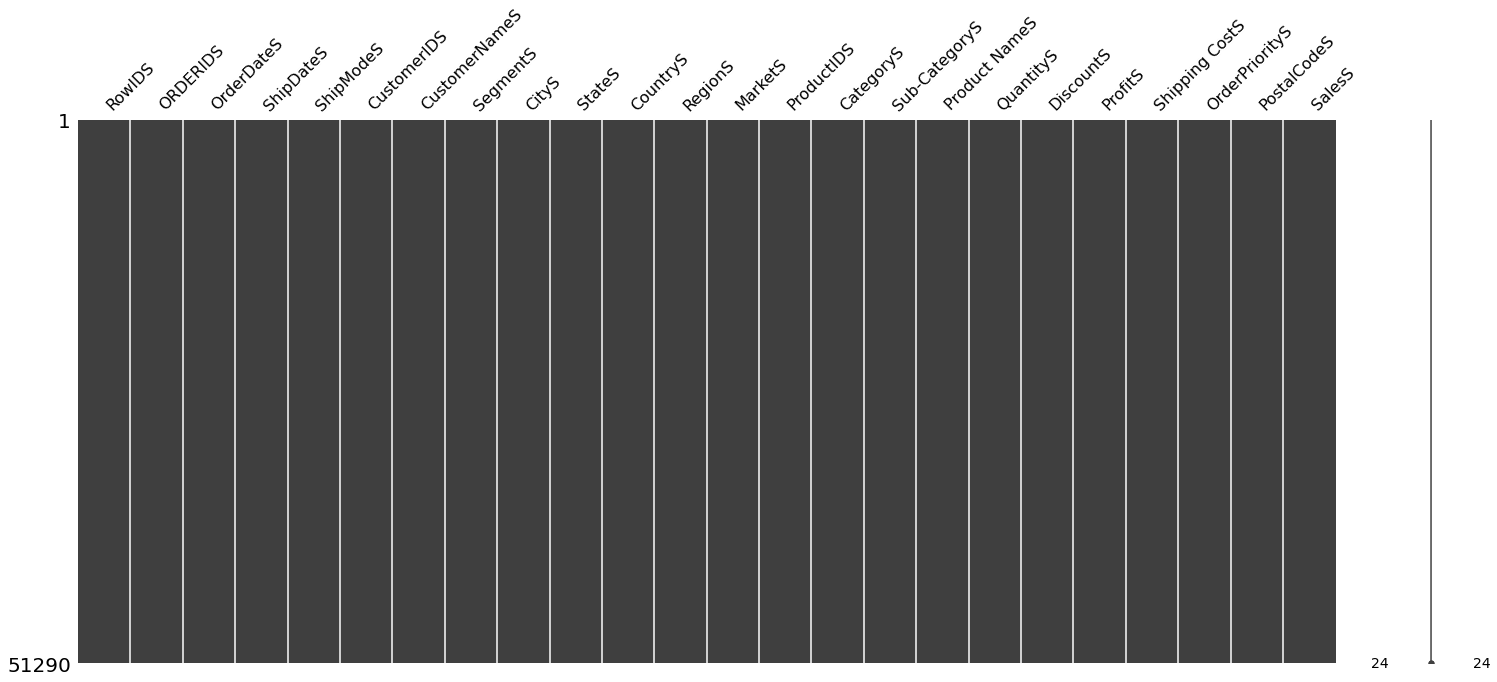

In [156]:
#Display size of Data in evrey column
msno.matrix(data);


In [160]:
#Dynamic visualization of Null Values in our Data
missing_values = order.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_dark',
       title = 'Missing Values')
fig.show()

In [161]:
#NUll Values Sum exactly in evrey Column
order.isnull().sum()

RowIDS                0
ORDERIDS              0
OrderDateS            0
ShipDateS             0
ShipModeS             0
CustomerIDS           0
CustomerNameS         0
SegmentS              0
CityS                 0
StateS                0
CountryS              0
RegionS               0
MarketS               0
ProductIDS            0
CategoryS             0
Sub-CategoryS         0
Product NameS         0
QuantityS             0
DiscountS             0
ProfitS               0
Shipping CostS        0
OrderPriorityS        0
PostalCodeS       51290
SalesS                0
dtype: int64

In [162]:
#Dispaly Postal Code Data Frame
postal

Row ID PostalCodeS
0       3193.0        9614
1       6491.0        1285
2       5600.0        2600
3      18167.0        3215
4      30459.0        3212
...        ...         ...
51285  13977.0        2551
51286  36140.0        5480
51287  11634.0        5863
51288  26779.0        9524
51289  39832.0        8112

[51290 rows x 2 columns]

In [163]:
#Verify Null Values in Postal
postal.isnull().any()

Row ID         False
PostalCodeS    False
dtype: bool

In [164]:
# MERGE POSTAL CODE FROM PODTAL TO ORDER
order.drop(['PostalCodeS'], axis=1)
order['PostalCodeS']=postal['PostalCodeS']

In [165]:
order

RowIDS                  ORDERIDS  OrderDateS   ShipDateS  \
0      23579   IN-2014-LC1688558-41940  2014-10-28  2014-10-30   
1      28895   IN-2014-MH1778527-41697  2014-02-27  2014-02-28   
2      51249    MO-2014-PO919586-41812  2014-06-22  2014-06-27   
3       5033   MX-2015-CS1240093-42368  2015-12-30  2016-01-05   
4        497   US-2015-JH1543055-42328  2015-11-20  2015-11-23   
...      ...                       ...         ...         ...   
51285  37560  CA-2015-YS21880140-42130  2015-05-06  2015-05-11   
51286  37508  CA-2015-YS21880140-42235  2015-08-19  2015-08-26   
51287  32690  CA-2015-YS21880140-42189  2015-07-04  2015-07-05   
51288  34367  CA-2012-YC21895140-41229  2012-11-16  2012-11-21   
51289  32050  CA-2014-YC21895140-41737  2014-04-08  2014-04-10   

            ShipModeS   CustomerIDS       CustomerNameS     SegmentS  \
0        Second Class    LC-1688558      Lena Creighton     Consumer   
1         First Class    MH-1778527         Maya Herman    Corporate   
2        Second Class     PO-919586       Phillina Ober  Home Office   
3      Standard Class    CS-1240093  Christopher Schild  Home Office   
4         First Class    JH-1543055   Jennifer Halladay     Consumer   
...               ...           ...                 ...          ...   
51285  Standard Class  YS-218801408       Yana Sorensen    Corporate   
51286  Standard Class  YS-218801404       Yana Sorensen    Corporate   
51287     First Class  YS-218801408       Yana Sorensen    Corporate   
51288  Standard Class  YC-218951406      Yoseph Carroll    Corporate   
51289     First Class  YC-218951404      Yoseph Carroll    Corporate   

               CityS            StateS  ...        CategoryS Sub-CategoryS  \
0          Bangalore         Karnataka  ...       Technology   Accessories   
1            Tianjin           Tianjin  ...  Office Supplies       Binders   
2         Casablanca  Grand Casablanca  ...  Office Supplies       Binders   
3            Managua           Managua  ...  Office Supplies           Art   
4            Choloma            Cortés  ...  Office Supplies     Envelopes   
...              ...               ...  ...              ...           ...   
51285       Columbus           Georgia  ...  Office Supplies       Binders   
51286        Seattle        Washington  ...        Furniture   Furnishings   
51287     Burlington    North Carolina  ...  Office Supplies           Art   
51288         Newark          Delaware  ...  Office Supplies       Storage   
51289  San Francisco        California  ...       Technology       Copiers   

                                           Product NameS QuantityS DiscountS  \
0                       Belkin Numeric Keypad, Erganomic       3.0       0.0   
1                                  Ibico Binder, Durable       4.0       0.0   
2                 Wilson Jones Binding Machine, Recycled       2.0       0.0   
3            Binney & Smith Pencil Sharpener, Easy-Erase       9.0       0.0   
4                       Cameo Manila Envelope, Set of 50       6.0       0.4   
...                                                  ...       ...       ...   
51285  Ibico Covers for Plastic or Wire Binding Elements       3.0       0.0   
51286                         Contract Clock, 14", Brown       3.0       0.0   
51287                       4009 Highlighters by Sanford       3.0       0.2   
51288  Smead Adjustable Mobile File Trolley with Lock...       7.0       0.0   
51289  Hewlett Packard 610 Color Digital Copier / Pri...       3.0       0.2   

        ProfitS Shipping CostS  OrderPriorityS  PostalCodeS    SalesS  
0       30.1500         10.840          Medium         9614   177.750  
1       14.1600         10.840            High         1285    67.920  
2       10.8000         10.840          Medium         2600    98.640  
3       77.0400         10.839          Medium         3215   167.580  
4      -35.6400         10.839          Medium         3212    64.800  
...         ...   

In [166]:
data=order

In [167]:
#Display Missing Values after merging columns
missing_values = order.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_dark',
       title = 'Missing Values')
fig.show()

In [19]:
#pip install cufflinks

In [171]:
#import cufflinks as cf
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [172]:
#Dynamic visualization of the best countries that we had deals with them
order['CountryS'].iplot(kind='hist', xTitle='claps',
                  yTitle='count', title='Claps Distribution')

In [173]:
#Display the count of the Ship modes
order['ShipModeS'].iplot(kind='hist', xTitle='claps',
                  yTitle='count', title='Claps Distribution')

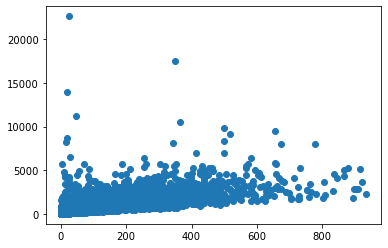

In [24]:
#visualization of Shipping CostS  /  SalesS
plt.scatter(x="Shipping CostS", y="SalesS",data=data)
plt.show()

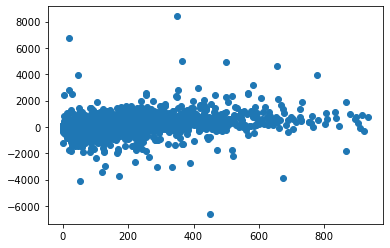

In [25]:
#visualization of Shipping CostS  /  ProfitS

plt.scatter(x="Shipping CostS", y="ProfitS",data=data)
plt.show()

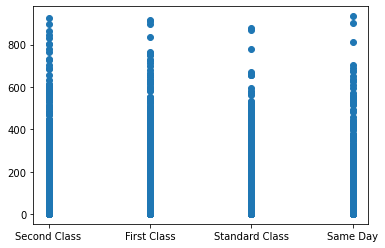

In [26]:
plt.scatter(x="ShipModeS", y="Shipping CostS",data=data)
plt.show()

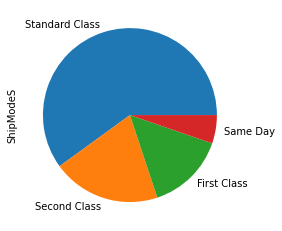

In [27]:

#Viz of the most used ship mode in our Products
data['ShipModeS'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

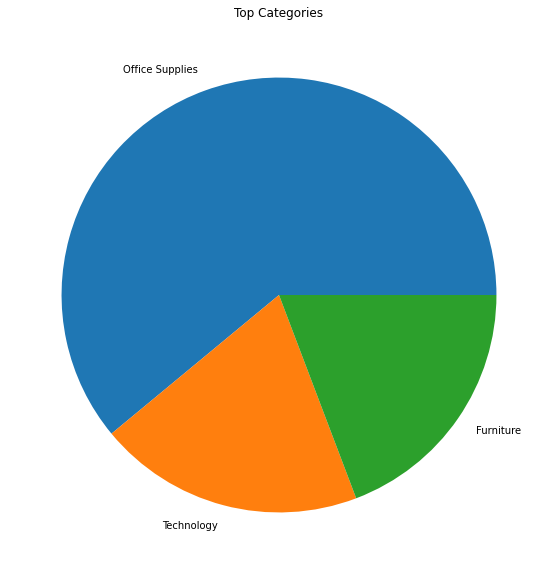

In [29]:
#Viz of the most used ship mode in our Categories

import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
data.CategoryS.value_counts()[:25].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top Categories")
plt.show()

In [176]:
#add Year column in our Data Frame
data['year'] = pd.DatetimeIndex(data['OrderDateS']).year
data.head()

RowIDS                 ORDERIDS  OrderDateS   ShipDateS       ShipModeS  \
0  23579  IN-2014-LC1688558-41940  2014-10-28  2014-10-30    Second Class   
1  28895  IN-2014-MH1778527-41697  2014-02-27  2014-02-28     First Class   
2  51249   MO-2014-PO919586-41812  2014-06-22  2014-06-27    Second Class   
3   5033  MX-2015-CS1240093-42368  2015-12-30  2016-01-05  Standard Class   
4    497  US-2015-JH1543055-42328  2015-11-20  2015-11-23     First Class   

  CustomerIDS       CustomerNameS     SegmentS       CityS            StateS  \
0  LC-1688558      Lena Creighton     Consumer   Bangalore         Karnataka   
1  MH-1778527         Maya Herman    Corporate     Tianjin           Tianjin   
2   PO-919586       Phillina Ober  Home Office  Casablanca  Grand Casablanca   
3  CS-1240093  Christopher Schild  Home Office     Managua           Managua   
4  JH-1543055   Jennifer Halladay     Consumer     Choloma            Cortés   

   ... Sub-CategoryS                                Product NameS QuantityS  \
0  ...   Accessories             Belkin Numeric Keypad, Erganomic       3.0   
1  ...       Binders                        Ibico Binder, Durable       4.0   
2  ...       Binders       Wilson Jones Binding Machine, Recycled       2.0   
3  ...           Art  Binney & Smith Pencil Sharpener, Easy-Erase       9.0   
4  ...     Envelopes             Cameo Manila Envelope, Set of 50       6.0   

  DiscountS ProfitS Shipping CostS OrderPriorityS  PostalCodeS  SalesS  year  
0       0.0   30.15         10.840         Medium         9614  177.75  2014  
1       0.0   14.16         10.840           High         1285   67.92  2014  
2       0.0   10.80         10.840         Medium         2600   98.64  2014  
3       0.0   77.04         10.839         Medium         3215  167.58  2015  
4       0.4  -35.64         10.839         Medium         3212   64.80  2015  

[5 rows x 25 columns]

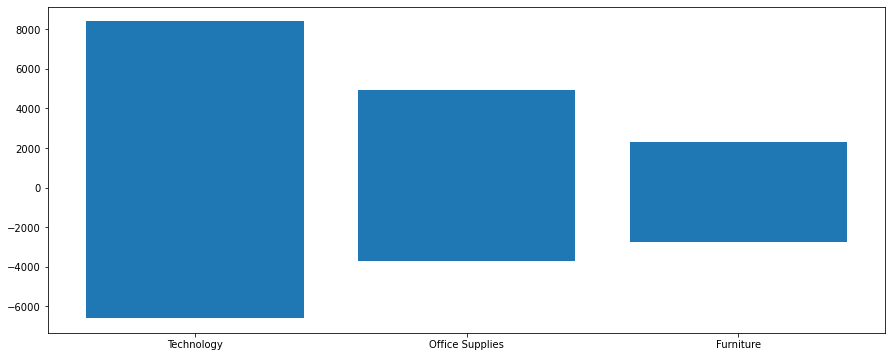

In [177]:
#Viz categories/ Profits
plt.figure(figsize=(15,6))
plt.bar(x='CategoryS',height='ProfitS',data=data)
plt.show()


In [178]:
plt.figure(figsize=(15,6))
plt.bar(x='year',height='SalesS',data=data)
plt.show()
point_barplot(x,y,x.labe="Style",y.label="Frequency",legend=F)


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3820326865.py, line 4)

In [ ]:
sns.pairplot(data, data=['QuantityS', 'Shipping CostS', 'ShipModeS'], y_vars='ProfitS', height=4, aspect=1, kind='scatter')
plt.show()

DATA TRANSFORMATION

In [32]:
dfobj = list(columns for columns in data.select_dtypes([object]).columns)
le = preprocessing.LabelEncoder()

for features in dfobj:
    data[features] = le.fit_transform(data[features].astype(str))
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RowIDS          51290 non-null  int32  
 1   ORDERIDS        51290 non-null  int32  
 2   OrderDateS      51290 non-null  int32  
 3   ShipDateS       51290 non-null  int32  
 4   ShipModeS       51290 non-null  int32  
 5   CustomerIDS     51290 non-null  int32  
 6   CustomerNameS   51290 non-null  int32  
 7   SegmentS        51290 non-null  int32  
 8   CityS           51290 non-null  int32  
 9   StateS          51290 non-null  int32  
 10  CountryS        51290 non-null  int32  
 11  RegionS         51290 non-null  int32  
 12  MarketS         51290 non-null  int32  
 13  ProductIDS      51290 non-null  int32  
 14  CategoryS       51290 non-null  int32  
 15  Sub-CategoryS   51290 non-null  int32  
 16  Product NameS   51290 non-null  int32  
 17  QuantityS       51290 non-null 

In [33]:
#Viz data after Transformation
data

RowIDS  ORDERIDS  OrderDateS  ShipDateS  ShipModeS  CustomerIDS  \
0       15089     13189        1005       1029          2         9900   
1       20995     13269         764        785          0        11245   
2       45834     17024         877        904          2        13312   
3       44813     19985        1428       1461          3         3853   
4       44111     25222        1388       1418          0         8081   
...       ...       ...         ...        ...        ...          ...   
51285   30624      4724        1193       1222          3        17359   
51286   30566      4726        1296       1329          3        17357   
51287   25213      4725        1252       1277          0        17359   
51288   27076      1180         307        321          3        17340   
51289   24503      3266         804        826          0        17339   

       CustomerNameS  SegmentS  CityS  StateS  ...  Sub-CategoryS  \
0                459         0    275     500  ...              0   
1                519         1   3229     995  ...              3   
2                613         2    615     371  ...              3   
3                159         2   1996     606  ...              2   
4                361         0    723     268  ...              7   
...              ...       ...    ...     ...  ...            ...   
51285            792         1    775     359  ...              3   
51286            792         1   2950    1060  ...              9   
51287            792         1    533     727  ...              2   
51288            793         1   2299     280  ...             14   
51289            793         1   2856     196  ...              6   

       Product NameS  QuantityS  DiscountS   ProfitS  Shipping CostS  \
0                581        3.0        0.0   30.1500          10.840   
1               1965        4.0        0.0   14.1600          10.840   
2               3530        2.0        0.0   10.8000          10.840   
3                645        9.0        0.0   77.0400          10.839   
4                828        6.0        0.4  -35.6400          10.839   
...              ...        ...        ...       ...             ...   
51285           1972        3.0        0.0   15.5250           3.970   
51286           1002        3.0        0.0   22.4196           3.140   
51287             27        3.0        0.2    1.5522           1.750   
51288           3166        7.0        0.0  792.2691         428.800   
51289           1768        3.0        0.2  374.9925         363.780   

       OrderPriorityS  PostalCodeS    SalesS  year  
0                   3         2874   177.750  2014  
1                   1           95    67.920  2014  
2                   3          481    98.640  2014  
3                   3          694   167.580  2015  
4                   3          691    64.800  2015  
...               ...          ...       ...   ...  
51285               3          470    34.500  2015  
51286               3         1458    65.940  2015  
51287               1         1583     9.552  2015  
51288               1         2841  2934.330  2012  
51289               1         2367  1199.976  2014  

[51290 rows x 25 columns]

Correlation Map(Heat Map)

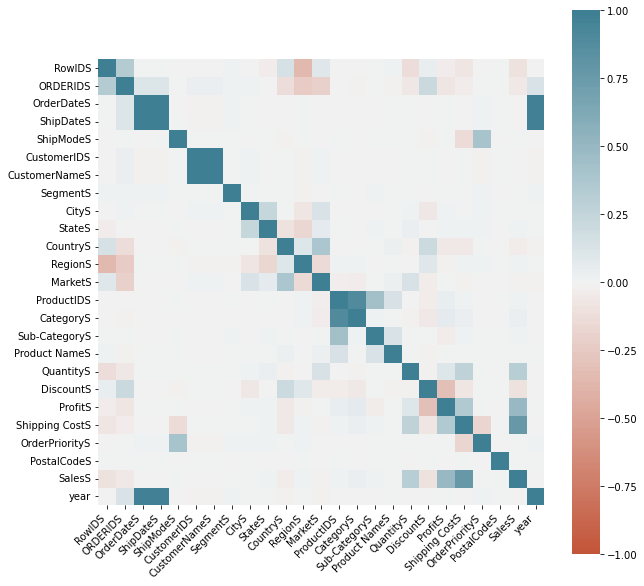

In [34]:
#Viz the Correlation Map
corr = data.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

XGB MODEL

In [54]:
#This part of the code is not completed (Skip^it)
from sklearn.model_selection import train_test_split
y=data['ProfitS']
x=data.drop(columns=['RowIDS','ProfitS','PostalCodeS'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=17)


In [ ]:
#pip install pygrametl

In [4]:
from pygrametl.tables import BulkDimension


In [7]:
order

RowIDS                  ORDERIDS  OrderDateS   ShipDateS  \
0      23579   IN-2014-LC1688558-41940  2014-10-28  2014-10-30   
1      28895   IN-2014-MH1778527-41697  2014-02-27  2014-02-28   
2      51249    MO-2014-PO919586-41812  2014-06-22  2014-06-27   
3       5033   MX-2015-CS1240093-42368  2015-12-30  2016-01-05   
4        497   US-2015-JH1543055-42328  2015-11-20  2015-11-23   
...      ...                       ...         ...         ...   
51285  37560  CA-2015-YS21880140-42130  2015-05-06  2015-05-11   
51286  37508  CA-2015-YS21880140-42235  2015-08-19  2015-08-26   
51287  32690  CA-2015-YS21880140-42189  2015-07-04  2015-07-05   
51288  34367  CA-2012-YC21895140-41229  2012-11-16  2012-11-21   
51289  32050  CA-2014-YC21895140-41737  2014-04-08  2014-04-10   

            ShipModeS   CustomerIDS       CustomerNameS     SegmentS  \
0        Second Class    LC-1688558      Lena Creighton     Consumer   
1         First Class    MH-1778527         Maya Herman    Corporate   
2        Second Class     PO-919586       Phillina Ober  Home Office   
3      Standard Class    CS-1240093  Christopher Schild  Home Office   
4         First Class    JH-1543055   Jennifer Halladay     Consumer   
...               ...           ...                 ...          ...   
51285  Standard Class  YS-218801408       Yana Sorensen    Corporate   
51286  Standard Class  YS-218801404       Yana Sorensen    Corporate   
51287     First Class  YS-218801408       Yana Sorensen    Corporate   
51288  Standard Class  YC-218951406      Yoseph Carroll    Corporate   
51289     First Class  YC-218951404      Yoseph Carroll    Corporate   

               CityS            StateS  ...        CategoryS Sub-CategoryS  \
0          Bangalore         Karnataka  ...       Technology   Accessories   
1            Tianjin           Tianjin  ...  Office Supplies       Binders   
2         Casablanca  Grand Casablanca  ...  Office Supplies       Binders   
3            Managua           Managua  ...  Office Supplies           Art   
4            Choloma            Cortés  ...  Office Supplies     Envelopes   
...              ...               ...  ...              ...           ...   
51285       Columbus           Georgia  ...  Office Supplies       Binders   
51286        Seattle        Washington  ...        Furniture   Furnishings   
51287     Burlington    North Carolina  ...  Office Supplies           Art   
51288         Newark          Delaware  ...  Office Supplies       Storage   
51289  San Francisco        California  ...       Technology       Copiers   

                                           Product NameS QuantityS DiscountS  \
0                       Belkin Numeric Keypad, Erganomic       3.0       0.0   
1                                  Ibico Binder, Durable       4.0       0.0   
2                 Wilson Jones Binding Machine, Recycled       2.0       0.0   
3            Binney & Smith Pencil Sharpener, Easy-Erase       9.0       0.0   
4                       Cameo Manila Envelope, Set of 50       6.0       0.4   
...                                                  ...       ...       ...   
51285  Ibico Covers for Plastic or Wire Binding Elements       3.0       0.0   
51286                         Contract Clock, 14", Brown       3.0       0.0   
51287                       4009 Highlighters by Sanford       3.0       0.2   
51288  Smead Adjustable Mobile File Trolley with Lock...       7.0       0.0   
51289  Hewlett Packard 610 Color Digital Copier / Pri...       3.0       0.2   

        ProfitS Shipping CostS  OrderPriorityS  PostalCodeS    SalesS  
0       30.1500         10.840          Medium         None   177.750  
1       14.1600         10.840            High         None    67.920  
2       10.8000         10.840          Medium         None    98.640  
3       77.0400         10.839          Medium         None   167.580  
4      -35.6400         10.839          Medium         None    64.800  
...         ...   

In [8]:
#cursor.execute('ALTER TABLE orders add Customer_id int IDENTITY(1, 1)')

In [10]:
#Connect to the Data Warehouse
myconn = pyodbc.connect(r'Driver=SQL Server;Server=DESKTOP-IKFHUC3\SQLEXPRESS;Database=DW_Saless;Trusted_Connection=yes;')
cursor = myconn.cursor()

conn2 = pygrametl.ConnectionWrapper(myconn)
conn2.setasdefault()

In [11]:
#this Function concern the bluk Dimension if one day w'ere gonna use it its ready
def pgbulkloader(name, attributes, fieldsep, rowsep, nullval, filehandle):
    cursor = connection.cursor()
    # psycopg2 does not accept the default value used to represent NULL
    # bv BulkDimension, which is None. Here this is ignored as we have no
    # NULL values that we wish to substitute for a more descriptive value
    cursor.copy_from(file=filehandle, table=name, sep=fieldsep,
                     columns=attributes)

In [179]:
#Prepare the date data frame
df = pd.DataFrame(pd.date_range('1/1/2001','12/31/2021'), columns=['date'])

df['year'] = df['date'].dt.year
df['quarter_number'] = df['date'].dt.quarter
df['quarter_text'] = df['date'].apply(lambda x: f'Q{x.quarter} {x.strftime("%Y")}')
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.strftime("%B %Y")
df['week'] = df['date'].dt.isocalendar().week
df['year_week'] = df['date'].apply(lambda x: f'{x.isocalendar()[0]}, Week {x.isocalendar()[1]}')
df['week_start'] = df['date'].dt.to_period('W').apply(lambda x: x.start_time)
df['week_end'] = df['date'].dt.to_period('W').apply(lambda x: x.end_time).dt.date
df['week_range'] = df.apply(lambda x: f"""{x['week_start'].strftime("%b %d, %Y")} to {x['week_end'].strftime("%b %d, %Y")} (Week {x['week']})""" , axis=1)
df['abbreviated_weekday'] = df['date'].dt.strftime("%a")
df['weekday'] = df['date'].dt.strftime("%A")

df

date  year  quarter_number quarter_text  month     year_month  \
0    2001-01-01  2001               1      Q1 2001      1   January 2001   
1    2001-01-02  2001               1      Q1 2001      1   January 2001   
2    2001-01-03  2001               1      Q1 2001      1   January 2001   
3    2001-01-04  2001               1      Q1 2001      1   January 2001   
4    2001-01-05  2001               1      Q1 2001      1   January 2001   
...         ...   ...             ...          ...    ...            ...   
7665 2021-12-27  2021               4      Q4 2021     12  December 2021   
7666 2021-12-28  2021               4      Q4 2021     12  December 2021   
7667 2021-12-29  2021               4      Q4 2021     12  December 2021   
7668 2021-12-30  2021               4      Q4 2021     12  December 2021   
7669 2021-12-31  2021               4      Q4 2021     12  December 2021   

      week      year_week week_start    week_end  \
0        1   2001, Week 1 2001-01-01  2001-01-07   
1        1   2001, Week 1 2001-01-01  2001-01-07   
2        1   2001, Week 1 2001-01-01  2001-01-07   
3        1   2001, Week 1 2001-01-01  2001-01-07   
4        1   2001, Week 1 2001-01-01  2001-01-07   
...    ...            ...        ...         ...   
7665    52  2021, Week 52 2021-12-27  2022-01-02   
7666    52  2021, Week 52 2021-12-27  2022-01-02   
7667    52  2021, Week 52 2021-12-27  2022-01-02   
7668    52  2021, Week 52 2021-12-27  2022-01-02   
7669    52  2021, Week 52 2021-12-27  2022-01-02   

                                  week_range abbreviated_weekday    weekday  
0      Jan 01, 2001 to Jan 07, 2001 (Week 1)                 Mon     Monday  
1      Jan 01, 2001 to Jan 07, 2001 (Week 1)                 Tue    Tuesday  
2      Jan 01, 2001 to Jan 07, 2001 (Week 1)                 Wed  Wednesday  
3      Jan 01, 2001 to Jan 07, 2001 (Week 1)                 Thu   Thursday  
4      Jan 01, 2001 to Jan 07, 2001 (Week 1)                 Fri     Friday  
...                                      ...                 ...        ...  
7665  Dec 27, 2021 to Jan 02, 2022 (Week 52)                 Mon     Monday  
7666  Dec 27, 2021 to Jan 02, 2022 (Week 52)                 Tue    Tuesday  
7667  Dec 27, 2021 to Jan 02, 2022 (Week 52)                 Wed  Wednesday  
7668  Dec 27, 2021 to Jan 02, 2022 (Week 52)                 Thu   Thursday  
7669  Dec 27, 2021 to Jan 02, 2022 (Week 52)                 Fri     Friday  

[7670 rows x 13 columns]

# Dimension Location

In [15]:
from pygrametl.tables import Dimension

In [47]:
#Location_dimension
Location_dimension =Dimension(
    name='[DW_Saless].[dbo].[DimLocation1]',
    key='Location_KEY',
    attributes=['PostalCode', 'Market', 'Region','Country','State','City'],
    lookupatts=['City', 'State', 'Country'],
    defaultidvalue=-1,
    )

In [38]:
Location_dimension.getbykey(1)


{'Location_KEY': 1,
 'PostalCode': 'None',
 'Market': 'Asia Pacific',
 'Region': 'Southern Asia',
 'Country': 'India',
 'State': 'Karnataka',
 'City': 'Bangalore'}

In [39]:
location=data

In [40]:
location['PostalCode']=data['PostalCodeS']
location['Market']=data['MarketS']
location['Region']=data['RegionS']
location['Country']=data['CountryS']
location['State']=data['StateS']
location['City']=data['CityS']



In [41]:
#insert our data in our Data Warehouse
dic={}
for j in location.index:
    for i in location:
        dic[i]=str(location[i][j])
    key = Location_dimension.lookup(dic)
    print(key)
    if key==-1:
        Location_dimension.insert(dic)
    else:
        Location_dimension.ensure(dic)
    
myconn.commit()


1
2
5
3
6
7
8
9
10
11
12
13
9
14
9
15
16
17
18
3
19
20
21
22
23
24
25
26
27
28
29
30
23
31
4
32
33
34
35
36
37
38
39
40
41
42
3
43
44
45
46
47
25
48
25
49
50
8
51
29
52
53
12
54
55
56
57
14
58
21
59
36
60
61
62
63
64
65
66
67
27
68
27
69
70
62
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
14
97
26
98
36
99
100
101
79
102
103
104
8
105
105
106
107
108
109
110
19
111
112
113
38
114
102
115
2
116
117
118
119
120
121
122
29
123
124
125
72
126
127
128
129
130
131
132
133
134
14
135
136
137
98
138
139
140
141
142
143
144
33
145
73
146
147
148
73
149
150
151
152
73
153
146
146
154
150
146
116
155
156
157
158
33
159
160
161
162
163
164
31
165
17
166
167
1
147
168
169
170
171
172
146
33
173
90
146
174
158
175
146
176
3
177
178
179
180
102
181
22
147
182
168
33
183
33
33
22
184
185
186
187
157
188
12
189
31
189
190
190
23
37
191
122
192
193
194
195
12
196
197
27
198
199
200
201
157
202
203
204
159
31
205
206
23
61
207
208
209
210
211
133
31
212
213
214
189
12
215


643
499
1019
469
314
1020
1021
1022
22
1023
8
358
102
961
150
102
1024
1025
25
105
528
128
121
56
1026
22
641
26
1027
27
43
8
1028
194
1029
954
1030
950
338
14
19
1031
1032
1033
317
1034
1035
897
1036
624
1025
1037
27
23
1038
173
30
722
243
152
229
1039
19
472
1040
107
194
22
1041
22
1042
161
430
1043
14
1044
1045
947
446
446
62
120
18
776
27
437
37
726
37
1046
1047
327
1048
421
1049
510
553
153
1015
1050
25
266
1049
574
889
1051
615
581
1052
226
194
23
260
272
1053
1054
506
1055
287
257
814
657
1056
1057
1014
112
72
1058
311
396
72
537
1059
1060
124
3
98
1061
1062
23
108
400
1063
165
1064
763
1065
143
1066
105
142
216
105
1031
1067
1068
1069
713
67
1070
1071
446
176
1072
27
62
72
72
168
44
380
1025
877
135
1073
341
320
289
770
1074
1073
1075
1076
341
763
1073
105
341
1014
182
1077
1078
229
291
702
1079
874
1080
1081
632
546
1082
530
1083
472
587
320
874
691
1084
189
339
469
1085
238
445
1086
572
732
1087
1088
509
844
72
1089
1090
221
864
105
630
633
72
1073
37
350
105
266
455
418
1091

612
874
1185
1544
341
316
789
1223
1545
1391
72
1546
1547
1336
385
1548
1549
72
1550
341
1551
1148
1552
420
1553
886
1554
107
504
1551
813
438
1391
1555
1137
105
1556
1557
814
26
1558
1559
95
62
62
1560
1561
1391
1562
396
5
1544
1391
1563
1564
74
296
321
1512
1111
1391
1565
1566
1391
341
2
68
51
1031
1391
811
317
644
1567
43
37
1568
888
1305
1569
1570
1444
1571
268
1440
57
514
1572
266
192
434
571
203
1573
26
27
1376
1574
1461
1575
27
1576
874
1577
228
1578
1579
620
1415
1580
1580
1580
1581
62
73
5
1582
105
1580
1196
1512
1583
1418
1584
1585
421
287
1586
1587
183
414
31
1588
1518
1589
1590
1591
227
571
228
1592
142
1593
1594
1580
654
886
1589
1595
1596
266
3
268
1589
1589
26
892
176
296
1257
1597
1084
512
88
12
296
1295
12
247
1598
364
368
545
1599
914
354
520
204
1069
1600
14
672
1601
67
675
206
12
31
168
384
208
1602
1025
44
1334
847
1603
124
256
934
266
1604
657
386
1605
1606
1607
1608
1609
98
1610
12
265
1611
1612
261
1613
1614
729
537
1615
152
1616
1617
12
483
1618
396
1099
1619
4

1602
34
47
1627
98
1946
1456
644
1947
1704
1948
73
221
199
88
1763
1949
240
16
257
1562
1950
806
350
556
150
325
1926
1051
619
1433
234
1798
22
27
26
44
545
1951
271
644
44
1387
1628
221
3
988
27
347
171
657
1952
495
1319
1953
504
1954
1955
1956
1358
657
221
1876
1948
27
1512
443
183
1168
545
617
1
786
257
220
345
233
404
1503
1957
341
1368
495
1958
94
207
1959
72
23
25
1482
341
221
1960
368
1961
626
286
1962
1324
220
670
89
637
177
187
228
1683
257
925
579
1963
189
1964
955
537
657
1024
1422
545
610
266
1669
294
401
320
1286
1063
72
1470
1341
88
495
571
1494
368
1146
1965
395
934
303
72
33
548
428
62
1966
30
152
348
157
3
64
846
1266
341
266
337
796
937
955
23
1355
1967
1418
414
490
1646
507
1011
617
1968
1368
332
27
358
19
692
220
650
650
95
523
881
350
227
355
152
93
877
877
93
1969
557
67
241
46
66
26
1970
90
644
1971
45
553
596
633
291
481
172
942
212
168
461
27
891
416
939
461
27
831
1726
3
33
299
1972
21
381
380
398
1973
920
1561
1974
27
70
33
162
549
376
1975
1554
994
1976
27
1

2209
364
744
2037
122
517
494
2023
1638
2210
2211
266
1438
189
1528
31
657
498
2200
23
1122
2200
3
2200
1888
2212
257
1052
2213
1288
296
14
1137
375
1052
204
514
2214
1888
174
1888
2215
499
339
1888
269
111
31
12
189
8
2216
2217
2218
2219
1646
8
1842
1187
1246
1927
496
363
503
1920
2220
537
187
1453
515
427
98
269
1946
1252
1922
1263
2221
1233
311
2222
2223
1246
1275
1888
506
2100
1031
657
752
1291
19
260
2224
2225
199
268
2226
881
292
228
152
8
272
489
358
1494
507
748
2227
1012
266
127
418
12
618
2228
172
212
27
1244
925
695
2229
62
354
122
748
748
1569
2230
1457
377
36
43
2231
1786
514
2232
537
270
2233
1907
105
502
2107
2234
303
143
299
729
576
414
390
14
2235
1611
26
308
2236
551
272
2097
67
1122
937
1068
160
1263
188
1797
420
420
14
925
2108
98
454
1432
8
1948
2228
22
44
3
759
330
955
270
390
93
17
33
657
8
2237
2238
2239
2074
12
266
1630
2231
350
44
2222
160
62
445
569
269
2095
517
337
542
2240
390
2131
301
2095
2241
2095
27
472
507
2242
2242
2243
2095
14
280
355
2244
14
2242
35

2428
1012
14
212
1940
1440
1570
250
2226
2300
8
615
657
380
391
1660
1836
2244
119
152
67
256
1864
380
1237
1842
152
152
341
1375
23
911
337
27
486
2429
23
13
16
722
2425
1158
2020
72
229
946
25
1280
1122
31
434
32
1933
1306
2174
942
304
324
294
1569
299
586
2430
981
1274
22
1579
2431
2432
204
437
189
2433
2434
162
430
1068
221
296
514
935
1245
1069
817
17
72
2435
2436
194
1876
1517
187
219
2425
2437
30
1912
8
2438
670
95
950
1271
227
19
220
2439
3
1032
68
268
1517
1030
946
1715
1842
419
162
2059
418
1927
25
2020
1486
62
8
1893
386
1247
481
1311
2425
1433
174
1419
641
2387
959
237
14
973
2440
988
237
37
686
38
2424
2441
2442
55
1573
38
72
489
2443
2429
2444
2445
646
1965
36
62
44
44
341
98
503
2211
1246
1095
2445
1390
1462
165
266
547
62
483
400
189
1358
1143
2445
2446
30
2447
837
1523
287
158
62
1538
320
1261
351
1775
326
1828
299
1231
2009
14
2444
1486
1414
26
1737
981
279
142
1305
3
93
260
22
2054
341
699
266
960
938
37
465
366
639
535
1235
579
294
232
393
889
699
2448
2444
501
168


341
211
22
475
136
378
326
350
624
444
1826
162
150
713
118
1562
1708
287
152
2632
621
2633
691
269
98
507
1627
232
33
867
2634
1530
2635
822
2505
70
933
33
617
2636
1508
1277
106
1121
152
105
805
636
2637
2171
481
2167
764
220
5
2087
1393
33
2638
456
1353
1554
5
33
268
730
2639
2640
1900
118
24
461
621
33
1890
160
2633
2641
2633
1393
226
641
874
2105
106
2458
340
70
470
456
234
95
1180
118
438
118
1564
2088
250
456
56
160
2642
98
2060
1708
241
1708
321
227
121
1541
911
1470
35
456
451
770
545
581
1479
13
2635
23
2643
2644
394
2574
2
2633
103
2532
2645
1756
2646
1571
1852
107
1237
368
1465
495
1171
2081
56
102
1842
2647
5
368
779
988
102
102
1205
2648
1947
1842
102
67
991
161
157
105
637
2649
2580
105
354
292
523
946
56
832
70
27
299
566
27
2190
1412
612
14
27
472
1924
1247
612
22
472
420
62
320
123
143
2650
2651
587
53
897
268
84
160
2111
485
545
203
5
33
347
172
991
194
194
347
157
62
2652
636
529
2519
2028
2554
2653
1713
151
1880
3
314
27
12
70
1247
33
27
160
2654
633
2655
852
634
5

1694
2784
582
220
937
2477
410
374
27
1520
1228
1955
2477
2097
44
296
2002
1029
30
2781
500
508
204
1021
2785
2781
27
1438
2739
617
1503
194
2786
26
1613
102
628
1973
1451
1254
489
1222
279
1396
2686
124
645
1030
582
2412
2739
1578
48
615
1546
311
333
220
22
1528
400
70
1003
805
401
796
2787
551
889
1080
983
62
37
73
692
127
199
2788
569
2686
2686
2676
763
2686
693
172
37
177
3
458
33
2789
1763
44
2702
2790
61
2791
2791
2088
483
755
633
855
481
2792
1364
1525
299
2580
1308
175
562
476
105
33
33
106
2793
2138
2794
315
1462
2625
414
33
365
428
33
33
271
2686
265
939
686
796
261
1029
2705
2429
657
1185
641
1703
316
179
299
885
2795
1466
2796
450
2228
347
624
2107
507
89
38
160
2425
162
2795
1320
708
2300
1185
2796
2764
103
1888
556
354
182
2796
1836
558
308
2762
708
114
73
571
2796
353
177
265
266
736
901
23
472
476
1850
266
2272
1719
265
1274
1764
2797
786
1539
1900
22
547
445
2543
106
2250
73
1624
221
2798
1667
1711
3
1049
1320
2799
803
296
26
399
1584
2205
837
5
1229
183
212
2250
14
24

232
268
566
83
1929
2564
612
1445
22
755
141
947
2916
73
800
14
1295
624
1389
958
93
637
207
681
421
2355
454
105
1445
12
2917
139
37
610
70
2916
925
1523
1646
565
525
128
1445
1318
2891
660
16
2246
2018
337
1977
1762
26
1445
150
588
1686
33
157
105
398
897
762
3
481
2462
1062
368
621
37
2634
2560
1052
216
238
67
37
36
2145
299
265
33
220
657
1526
1397
475
1516
83
12
102
72
1115
299
1063
510
348
172
2918
2919
106
2920
2409
17
1320
931
414
220
89
2146
268
523
2146
2146
1163
926
72
72
220
299
1
994
102
132
2921
1020
320
108
649
227
255
1342
1327
461
2922
1700
25
2923
2912
260
1694
2217
266
2360
251
102
251
1493
1913
2912
70
742
1812
2924
2925
2376
45
2912
521
681
226
194
535
2926
92
1883
102
980
503
2927
485
2912
168
2461
1030
368
822
361
5
67
1560
2527
1172
102
36
204
2354
2165
1417
2147
2928
630
80
53
2653
105
152
177
482
641
972
1183
2103
61
287
3
2146
2146
2779
2929
2930
2555
72
2931
26
2912
38
251
102
2146
1567
1964
416
1305
70
917
1290
320
2376
36
399
1922
162
1857
2932
228
22
2691

22
360
168
1127
474
2253
204
1432
1009
1749
1749
891
37
56
228
1828
160
2444
2444
469
689
2264
1847
689
1403
851
98
523
204
1749
976
2593
25
172
105
641
1459
2656
220
411
1347
1099
939
162
1554
793
603
1217
580
588
341
14
420
70
1158
1749
2542
1186
1129
1263
56
494
472
2933
2390
657
1593
44
157
931
44
171
337
3029
1879
368
2837
266
1050
72
822
215
1412
1543
12
2330
1689
483
121
2439
2318
1210
1777
934
1715
340
3030
1
177
152
928
469
1881
294
37
8
1151
2400
3031
37
1512
1319
2365
421
1981
1260
2
693
3032
3033
363
12
74
212
1099
246
350
105
347
1233
172
354
1916
506
3034
66
37
2117
1935
819
228
509
3035
490
1329
296
3036
105
2728
806
481
3029
1111
1516
3037
98
150
2024
2991
3009
486
72
168
70
317
51
490
2117
193
33
1067
1879
189
220
25
183
1446
22
12
3038
3039
3040
2105
722
70
530
660
963
166
822
3040
265
1552
341
268
1155
545
719
846
27
1270
1835
1678
12
12
14
3041
197
27
920
635
368
1956
2803
942
3040
229
2341
341
36
257
486
2018
146
146
1358
393
37
2097
519
320
194
844
1394
619
1318
6

636
1543
324
2034
475
194
2430
220
2229
2863
1686
287
562
66
962
268
887
971
636
269
1327
3042
417
172
1164
790
562
59
320
657
168
27
203
1074
2610
2610
171
562
1298
1604
43
37
268
27
105
90
27
348
517
317
605
14
27
93
1459
1604
781
2010
1478
478
1496
1562
27
27
1047
1762
27
268
961
102
296
1944
2170
844
266
1968
72
1493
299
237
1347
877
469
418
8
521
221
1729
2349
2235
1908
3113
1155
152
934
3114
454
36
322
686
2115
2406
98
2906
954
8
1339
2729
390
530
177
366
67
1507
1901
31
1936
37
418
43
380
737
252
43
14
2421
626
2131
3000
172
226
37
819
2941
743
19
98
341
150
3115
21
3116
1125
212
418
72
571
3036
181
337
1387
571
571
260
383
37
1322
337
1394
571
628
162
1528
102
736
741
982
610
341
571
105
528
1320
294
61
722
390
539
1365
105
3117
454
1433
340
1039
37
184
1229
2841
204
528
1385
102
571
547
3024
571
2962
55
2128
1627
1418
934
2426
741
5
1463
72
358
72
72
72
1118
2007
72
152
1410
1989
1587
1572
1922
269
221
1927
72
782
396
1208
37
1695
72
982
1695
2108
1463
26
415
1773
27
237
605
1

3184
3185
3
3056
8
2582
454
152
341
150
1255
320
2453
341
418
2806
1233
363
341
1265
16
1236
2724
877
763
2845
641
160
677
1562
237
216
946
25
1538
1184
2043
237
12
1095
1536
245
514
1733
22
308
1628
934
3186
294
142
61
557
14
44
356
3005
1558
11
37
237
25
3187
377
3188
1274
348
2933
770
22
2111
620
179
111
864
719
7
31
1458
16
1231
31
2176
443
72
237
805
2560
225
3189
25
1242
2785
1011
470
27
1126
189
452
93
21
2560
2307
434
27
136
74
182
42
732
1923
2721
726
172
2032
97
71
1351
14
206
31
160
55
525
3190
98
736
93
934
182
250
105
47
722
981
32
194
256
1822
1874
1341
1224
36
1508
3191
1686
3192
1822
160
322
3193
1131
1822
2715
499
1563
61
180
2785
1071
3194
2487
8
368
2965
294
472
2749
1822
56
105
523
657
98
67
287
920
312
1451
635
149
1483
610
221
3
205
1361
51
27
2472
2647
1976
2391
374
3
3195
19
3101
136
726
1199
1737
1493
698
1251
785
1977
214
469
1639
1826
534
1676
2782
121
2002
1669
1541
2064
364
84
196
2147
1285
1361
189
14
726
12
734
141
162
31
1274
189
3196
1248
1920
3196
297


55
437
160
520
230
2722
2383
3271
1943
1047
769
391
2094
212
162
150
1884
368
991
1479
3272
943
36
50
62
3002
1776
260
11
55
62
152
3183
8
190
27
1822
1416
8
1822
853
992
1554
793
33
2150
157
492
1822
368
205
1690
3273
2795
128
2406
1822
778
481
1012
752
3274
535
247
282
932
657
3275
3276
189
470
182
853
3276
994
3
874
1983
257
881
1279
2589
1030
152
542
3079
190
657
19
3277
61
300
172
368
1981
308
649
2980
1619
2713
277
220
2468
502
190
2869
37
227
537
7
3079
37
2876
559
31
268
103
33
268
368
88
1904
619
1158
2057
753
95
3276
190
503
205
880
2214
190
1641
1690
1822
106
44
1075
1113
2191
19
627
1405
1844
723
190
588
2
612
2053
190
1084
636
328
1338
266
268
1417
1539
62
3278
90
1039
3279
1451
2795
1739
3277
348
2164
814
2678
486
132
1737
150
2693
2002
94
27
45
490
657
94
445
853
522
1656
1533
575
1569
2992
95
407
105
538
152
832
438
458
1182
177
2310
618
3280
12
314
1777
43
2966
36
177
481
561
2075
1912
418
523
2738
2180
634
105
3281
1003
1782
2174
916
542
26
12
162
3282
299
37
1120
476

159
1047
19
1521
8
1780
1142
3341
1998
187
73
1579
2307
30
710
601
523
70
553
152
227
1093
93
1670
1286
390
1028
637
268
8
1751
1751
475
36
8
268
449
670
689
1530
507
266
285
350
472
37
460
452
490
456
22
1115
2048
19
121
348
194
539
45
8
3318
537
689
16
2124
934
26
272
657
617
2062
1505
617
141
266
1706
1731
36
2141
37
689
2062
56
303
610
345
3342
1426
1993
1050
389
3343
62
172
1669
2113
970
3344
1085
1996
153
337
1523
1312
1003
2062
1613
2166
1007
3230
2062
12
613
712
737
2521
418
163
1738
70
1030
1360
27
2803
702
2674
1
14
12
523
2599
569
3172
390
320
152
3
454
587
122
62
742
261
2734
1338
125
27
461
102
3345
72
1937
612
2002
232
5
612
1576
670
1191
158
266
237
12
3346
2390
565
102
2472
22
296
94
3345
297
1711
390
172
157
422
105
287
287
3121
2159
177
597
1064
70
431
102
5
1163
555
367
73
124
748
1387
370
36
612
1884
2297
1418
236
569
70
111
3345
1757
3345
27
102
1099
31
12
72
3347
2449
713
3348
454
2038
3
93
1149
207
3349
1857
27
2087
948
83
12
70
12
26
157
107
2445
3348
56
26
89
5

64
152
652
37
592
12
785
209
24
445
23
537
2128
12
194
70
1733
33
2182
228
3122
1984
12
1609
644
124
25
1798
21
199
56
55
1421
1862
279
523
320
2921
152
106
874
2057
185
364
8
5
934
266
279
737
934
27
2110
1219
623
1929
624
608
61
936
3
75
723
1255
1232
882
1358
472
1041
2337
946
266
1422
204
4
1034
1430
1575
21
553
720
204
576
937
1119
1516
2147
934
8
231
189
1058
232
1621
189
44
354
348
256
260
72
1483
351
72
545
1562
152
1644
30
180
961
1784
963
3423
309
98
520
72
350
1477
72
2910
788
279
2919
287
979
633
695
1619
812
337
21
168
70
350
266
976
3169
958
8
2374
679
489
619
520
272
162
279
2671
3068
299
2131
1457
31
368
153
641
1135
641
454
105
232
3068
1824
3068
3068
3424
1421
1072
376
1888
2879
3234
398
105
2402
1154
195
2879
37
288
265
3425
265
452
886
1286
280
2860
221
27
253
12
12
1107
805
637
17
1888
311
102
2160
754
1891
1008
719
1888
2757
394
2133
50
2081
292
1158
637
2899
51
1222
562
377
562
2960
558
1229
5
754
2008
3426
509
395
84
55
98
2089
880
62
62
105
2351
102
819
3427
35

12
21
1772
62
12
514
25
33
247
12
33
1350
1350
98
245
2657
55
27
1047
486
177
275
486
142
1686
42
46
1008
932
3
1350
72
447
11
2657
833
299
124
2657
565
341
221
3330
362
162
886
8
3482
253
70
2851
1380
1277
1418
2852
122
985
21
21
570
1789
39
1171
266
199
503
388
2687
265
12
8
2270
2518
272
168
502
657
13
3248
1324
221
8
2414
317
422
23
889
3330
125
398
11
21
127
1067
138
1562
23
418
3483
208
2374
8
152
287
23
2046
31
19
624
963
171
31
851
2980
657
124
1176
1554
657
618
377
1110
191
2
8
773
172
22
27
1163
212
1202
149
708
182
256
66
1411
33
1273
152
1109
1222
1166
773
26
2260
464
396
1411
137
152
345
528
759
162
942
1324
124
1366
1151
773
2289
1233
33
599
816
76
105
1076
72
105
418
27
2035
80
94
95
2034
58
816
2962
1565
4
93
223
1581
269
1509
816
182
189
599
1520
269
737
1410
886
636
839
2565
189
2917
599
105
95
816
816
994
3317
25
2366
2388
98
311
80
2739
816
37
3484
2661
816
177
1870
237
338
12
1012
3485
2024
317
1358
26
19
31
2081
2900
12
1274
1372
178
3486
780
152
5
266
1430
1544
3

545
2402
586
25
44
1373
70
686
1403
1071
105
12
204
260
3056
3098
361
363
260
1942
2758
845
26
12
1117
315
272
1788
1223
62
2402
102
3197
8
106
2922
1610
399
498
1809
947
1318
514
503
2194
959
341
2942
2363
967
456
31
311
216
1462
401
106
1091
3
241
420
254
227
1300
37
268
56
1552
340
22
455
853
947
25
1361
420
233
579
551
3528
2159
456
98
534
1483
855
177
194
2029
437
1153
833
1418
1387
1619
347
67
1088
1261
693
44
874
61
65
305
162
74
11
2855
292
2495
545
933
1327
153
960
41
3
1486
1470
1386
615
456
3434
283
2942
72
299
1916
162
3529
2767
174
1046
933
3
38
171
27
33
2434
347
353
194
595
703
33
1693
746
161
263
347
806
445
736
3530
111
490
1489
33
268
1340
1069
545
1246
2147
2564
12
160
205
153
713
1822
56
263
1018
152
227
355
523
847
72
366
569
385
72
637
355
296
2206
33
1050
185
3531
12
1838
2079
755
2824
1806
670
228
72
2153
1023
1632
2467
3361
269
2465
1418
283
470
179
569
12
982
3361
27
774
464
874
1517
1223
27
1628
2414
2431
545
1879
27
545
150
27
3020
142
260
1394
27
152
119
18

269
7
102
341
537
16
107
1448
177
1502
282
2191
1579
1363
810
119
1176
1115
106
517
2476
1142
112
22
2753
72
821
821
72
72
380
2809
290
2784
1699
821
1714
221
1694
74
2769
51
821
821
395
778
296
821
131
817
821
1732
2781
2017
98
2762
1554
974
2781
821
43
804
584
2759
1134
1935
150
1457
821
72
2002
736
452
1374
152
1502
3563
542
333
2798
1909
23
114
229
484
68
90
31
355
273
296
266
111
1241
3564
469
341
478
523
2728
1694
2473
53
481
1247
305
2733
3565
266
261
686
2217
523
1674
347
228
220
98
3486
274
380
1320
27
852
2165
388
500
768
934
3566
430
2903
121
348
1605
755
347
27
98
1012
150
27
1802
1084
189
111
2707
1131
27
3474
2837
2746
3474
1350
189
2308
514
50
1483
451
67
102
1350
1977
8
994
56
176
3474
4
445
102
23
1719
33
177
2967
195
528
886
3387
637
637
2111
95
437
2473
790
573
228
1467
31
2295
358
31
898
1108
228
1552
1375
1552
3341
778
414
189
1937
2069
3567
221
2
3413
1361
227
637
3
105
499
152
62
592
377
657
1733
1361
1361
617
308
1802
232
1866
70
12
2473
414
22
102
8
1414
332
17

133
401
107
391
2021
468
2057
1954
1395
132
590
1
461
1660
19
1526
228
468
636
44
368
182
523
1776
48
2775
152
27
507
1002
3599
1273
3599
1866
3599
2554
755
468
3600
624
1990
3601
481
2103
1973
590
72
350
641
347
33
1678
189
26
1483
450
2748
84
296
72
72
260
437
2048
2076
350
72
3557
2618
2171
1323
26
2747
1818
1916
3602
2731
23
269
8
2062
1806
2765
1669
72
105
428
2056
409
228
2368
1071
2479
2126
37
400
2202
514
134
194
2080
657
48
194
31
2503
358
486
27
150
1300
1886
1562
268
2487
21
1808
226
228
421
2107
1632
1057
814
181
420
22
1741
1574
189
374
525
333
30
2919
1976
2062
1385
416
1705
2320
2257
341
991
1176
341
2415
3603
1528
16
534
1149
671
36
189
3604
1324
2646
266
1358
2121
136
12
581
153
2368
163
8
469
216
21
1981
1284
37
12
395
753
3389
2059
1233
56
2206
1224
189
523
1224
499
232
37
3603
1057
287
461
819
2108
374
9
1395
250
963
2060
2899
2410
742
1072
189
3605
415
127
2541
1371
105
83
36
2527
523
160
3006
21
37
460
177
597
219
95
418
3606
67
1995
21
25
1085
398
390
1596
394
9


612
934
1582
37
584
37
33
228
33
2857
2005
105
676
1816
33
2230
132
1030
1544
6
33
2342
1084
249
347
400
5
2203
257
1091
1417
151
33
33
22
3
36
719
341
102
881
640
1887
500
2716
3208
1147
284
545
217
27
1237
299
1997
227
3045
534
822
2374
106
308
30
390
1178
2434
98
481
169
312
297
535
368
1710
1093
294
337
3639
390
11
257
27
512
571
14
2033
3250
90
105
730
732
979
1015
472
27
8
152
25
3447
37
1721
44
23
3384
26
401
3384
37
67
221
15
2771
1062
1879
1909
102
1250
299
1467
1031
1003
1316
1340
723
37
1532
388
105
535
161
1231
367
103
152
1999
2867
3384
25
2320
855
68
1
205
72
26
272
3046
22
540
2452
158
367
445
3384
569
8
657
2369
400
3113
1084
1055
26
1460
1205
9
37
1496
503
122
398
245
2535
514
31
37
3459
1462
9
3047
12
788
523
507
451
1320
942
205
3640
659
2618
1883
25
220
183
12
168
36
877
769
172
3641
9
553
37
2653
212
506
12
5
1665
3640
959
354
2137
1014
27
1883
3641
542
2202
409
143
37
1419
27
3642
32
1921
23
105
1312
926
553
266
636
390
657
2002
132
1465
3
105
1920
37
2318
95
44
2

2707
1703
634
98
1224
1685
819
204
571
105
22
1559
282
36
266
571
1933
571
284
571
67
657
1109
27
337
160
2596
410
504
237
3268
3405
2552
897
758
1286
721
805
107
1086
637
172
1859
1199
1660
49
657
25
2630
172
126
2087
2724
994
437
1395
70
2596
472
1133
755
25
116
5
2615
2596
1151
59
2596
2527
2517
143
1238
3
3263
331
105
576
280
3283
2942
464
1155
1090
150
1457
2836
2596
181
315
657
851
537
189
37
2509
2596
280
237
2803
26
2596
22
942
986
1493
229
2385
160
66
337
474
986
416
358
19
637
1012
469
1158
105
848
3468
220
2596
628
189
35
2596
8
8
341
391
27
1965
8
2600
553
70
38
127
95
1706
3671
665
514
1876
341
780
1554
299
571
1202
8
522
3413
1130
736
581
874
3000
845
44
3415
3
421
8
16
341
2721
1764
171
889
670
95
3672
232
582
11
2579
36
737
3673
2146
657
2017
852
3674
1874
256
136
796
368
1740
105
428
107
152
292
177
3
335
152
2351
617
2845
2146
2845
31
163
160
2342
1655
1249
1202
373
889
2845
2146
833
26
368
266
2146
1289
14
2100
2588
12
12
2087
1245
1444
1363
220
56
150
3353
212
2372


420
2688
3694
708
2114
434
368
1482
736
387
469
1306
268
25
1115
327
241
1590
985
291
637
1678
8
2926
1236
287
55
3464
1196
2811
1852
1443
62
2784
8
8
122
2314
2853
8
95
158
3355
1991
657
813
1294
1641
3695
922
367
376
16
639
472
27
220
1566
805
639
1777
3696
37
1365
1536
266
199
982
934
984
339
2835
8
3102
1815
881
2469
2246
150
8
1775
489
3464
2029
887
27
3583
1200
7
806
102
105
1852
424
945
399
2671
2335
38
681
102
25
1643
350
547
12
1595
41
1223
1552
105
182
1918
102
681
257
2644
430
2314
438
25
1725
8
225
418
1552
288
270
539
327
296
2472
12
3405
12
3111
3661
3697
920
1783
3661
212
938
3609
1263
551
269
428
160
1805
469
3697
268
2304
3661
194
5
1697
3150
124
438
1833
2112
915
3698
938
272
2230
676
476
368
3222
1944
36
3307
3609
227
160
3513
3698
23
1867
224
28
2310
565
1351
744
152
467
27
1340
3119
1464
161
3119
23
547
1001
221
111
997
528
1560
2867
1007
62
322
3119
2030
1481
1012
2297
253
3119
437
1071
3699
506
1349
8
1102
280
2273
168
98
194
184
769
889
617
2
385
172
385
874
199

1822
2863
2424
8
12
665
1188
25
220
1591
934
158
484
1503
1933
2149
2426
19
341
238
1685
8
12
220
2993
36
12
265
716
3651
1087
1535
510
102
70
70
42
2792
320
292
874
874
763
227
528
1154
3418
269
3125
2721
619
933
150
378
28
23
228
265
8
955
1535
8
3580
341
8
621
301
1508
430
1730
1685
1444
3
1331
3415
341
327
360
1318
1528
27
12
341
1535
537
445
153
1261
934
3344
49
266
689
309
2758
634
73
1171
1734
1657
1733
1906
368
2024
3413
2299
1657
337
119
2409
721
3
1203
125
311
438
1007
23
1444
2083
286
167
596
445
36
2376
1350
1717
1547
1801
8
55
3738
1706
2257
160
957
2737
261
485
624
189
3053
1507
14
37
2137
703
2946
152
2632
499
469
62
2904
946
458
309
438
1350
5
1235
725
537
567
1350
1580
37
204
324
309
1657
1350
1418
440
1472
1736
1301
129
501
309
177
261
56
1472
3738
1472
396
1472
708
1562
2166
846
152
2028
263
1538
152
1121
1231
2887
13
296
2964
2253
220
1599
430
1353
168
1953
1350
31
220
12
220
141
12
1462
3403
490
490
414
1324
1387
150
33
523
866
3
62
44
759
3
106
846
480
2937
12
120

8
806
2824
1798
1444
545
105
3048
227
8
2596
942
547
2229
523
2596
168
1010
418
1467
266
380
2544
70
2841
320
587
62
1516
1682
456
29
981
418
1265
2554
1128
30
1120
143
51
455
1557
1115
27
918
360
764
482
2107
221
30
1532
26
1569
1210
1631
2836
8
3368
889
649
734
1223
189
3210
2873
268
1660
184
204
967
978
3438
1029
1254
12
308
367
137
934
257
459
1224
105
3176
1012
244
269
26
8
542
1003
1252
33
199
734
33
486
1929
2863
157
1214
877
1873
2100
3368
934
14
75
340
2468
320
33
624
162
18
2342
494
3757
2552
326
714
220
1237
408
50
37
2469
93
288
2841
1482
2528
521
37
67
48
2863
3528
1275
579
3535
734
1660
19
3758
93
2376
184
2977
416
2977
376
1240
778
148
172
874
494
105
889
38
31
3238
2440
105
959
33
634
44
431
153
2023
1189
168
128
2125
105
3511
2412
1115
198
37
1737
84
1270
12
1357
3511
44
537
301
1199
420
36
1677
2036
1636
37
925
2008
149
227
2098
1631
2359
55
1636
320
3
276
161
1398
1153
70
1562
171
904
1142
2191
194
649
25
2409
37
2278
1887
33
1126
2100
1326
103
352
445
105
530
211
10

88
72
522
1665
624
1786
72
160
14
3783
80
569
72
1222
227
2120
292
105
1596
535
813
1324
2539
2
745
3061
2057
177
504
105
1121
172
1836
1937
3783
3784
8
834
73
84
105
8
1654
1654
2539
2482
2710
1958
257
510
1106
1154
2369
3
2117
315
514
3783
958
2906
268
1078
3191
227
380
64
401
334
106
3783
14
3441
1274
2616
1528
1627
1967
55
80
347
157
232
8
630
2660
610
571
8
708
325
3284
14
73
325
534
401
105
535
194
16
2279
594
150
1623
1499
2815
508
3122
308
1618
47
494
1418
1663
325
62
157
1237
51
1058
530
102
37
27
341
56
571
1126
1076
1491
1243
26
918
1069
1972
1204
2815
225
641
1120
636
177
3109
296
2468
1353
399
189
645
2876
37
292
296
27
16
197
2020
2020
1554
1015
32
306
617
291
30
846
1481
1813
558
1571
969
5
189
2905
333
1496
3245
4
726
2210
1793
189
3236
41
636
2552
584
2449
72
22
649
3297
23
3214
1274
1693
1430
3578
628
1923
216
37
1584
2020
62
997
1106
5
630
14
1115
547
220
37
17
67
713
916
72
2020
1836
27
1910
741
1887
19
410
3424
62
874
637
172
3
161
27
27
1294
741
665
934
741
855
20

1119
189
1409
905
114
514
1115
232
33
1278
2454
220
27
1508
160
232
7
3810
124
27
418
3322
265
136
312
3238
1730
189
2296
764
597
1930
3
499
124
3
7
3044
33
27
401
33
73
299
27
27
33
3246
24
347
195
376
33
29
1936
1530
203
27
927
1920
1521
814
3
6
855
1935
376
1504
288
601
198
398
1576
11
542
1241
523
545
618
27
216
27
178
522
292
229
974
22
44
157
2137
1245
874
6
1669
1729
291
95
2932
812
194
1118
812
55
287
759
2919
55
366
812
510
692
2506
2547
73
95
266
3116
1139
189
22
812
510
1199
102
296
27
812
237
1544
17
27
3811
438
1791
1588
266
1353
67
1429
1483
481
1562
296
14
3208
1203
498
237
95
153
2457
994
2400
311
208
575
2224
1834
62
2239
250
1139
247
14
56
2932
3812
22
3425
934
105
287
1588
874
758
27
227
2048
649
1216
2879
2346
296
3171
220
2527
1009
320
440
734
189
455
734
2473
23
221
845
2879
114
135
1983
506
2958
388
1483
1054
1483
657
2049
451
663
502
470
962
2965
269
3463
1677
98
677
62
23
31
657
257
1154
2472
1176
2473
1623
103
734
1126
2599
105
350
522
2048
3
22
73
28
364
3813

Location_dimension.getbykey(1)

# Dimension Custommer

In [17]:
Custommer_Dimension=Dimension(
    name='[DW_Saless].[dbo].[DimCustomer]',
    key='Customer_key',
    attributes=['Customer_ID','Name','Segment'],
    lookupatts=['Customer_ID'],
    defaultidvalue=-1,
    )

In [142]:
Custommer=data

In [143]:
Custommer['Customer_ID']=data['CustomerIDS']
Custommer['Name']=data['CustomerNameS']
Custommer['Segment']=data['SegmentS']



In [ ]:
#insert our data in our Data Warehouse

dic={}
for j in Custommer.index:
    for i in Custommer:
        dic[i]=str(Custommer[i][j])
    key = Custommer_Dimension.lookup(dic)
    print(key)
    if key==-1:
        Custommer_Dimension.insert(dic)
    else:
        Custommer_Dimension.ensure(dic)
    
myconn.commit()

In [244]:
#verify the insert was done
Custommer_Dimension.getbykey(1)

{'Customer_key': 1,
 'Customer_ID': 'LC-1688558',
 'Name': 'Lena Creighton',
 'Segment': 'Consumer'}

# Dimension Product

In [18]:
Product_Dimension=Dimension(
    name='[DW_Saless].[dbo].[DimProduct]',
    key='Product_key',
    attributes=['Product_ID','Product_name','Category','sub_category'],
    lookupatts=['Product_ID'],
    defaultidvalue=-1,
    )

In [23]:
product=data

In [150]:
product.drop_duplicates(subset=["ProductIDS"], keep="first", inplace=True)

In [154]:
product['Product_ID']=data['ProductIDS']
product['Product_name']=data['Product NameS']
product['Category']=data['CategoryS']
product['sub_category']=data['Sub-CategoryS']

In [155]:
#insert our data in our Data Warehouse

dic={}
for j in product.index:
    for i in product:
        dic[i]=str(product[i][j])
    key = Product_Dimension.lookup(dic)
    print(key)
    if key==-1:
        Product_Dimension.insert(dic)
    else:
        Product_Dimension.ensure(dic)
    
myconn.commit()

2934
1536
1621
1114
1705
2793
3222
746
2013
244
3568
1778
3501
1073
807
1328
1319
270
1137
1760
3084
1078
1943
3374
1383
7
1330
212
1908
2673
1900
2168
213
284
1788
2649
2286
2728
1097
2605
2767
330
2849
2548
2706
1700
3336
2932
465
2672
1611
2148
1156
88
383
1714
1081
2669
1210
1148
278
905
3032
1879
527
1944
1096
3082
1320
2766
2864
2181
3176
1122
519
2185
1416
1313
3065
2917
3257
2960
1695
172
2615
1316
1265
1166
3399
1050
3556
2259
3020
165
1865
2696
281
1312
3661
3029
1179
1668
1357
1074
2731
3370
2804
2497
3083
2113
2192
3591
3522
438
2214
2600
261
148
1104
2177
1091
2877
1710
2503
1392
1123
2130
2616
3136
2670
2613
1177
339
70
955
1618
2655
1729
1314
1423
2664
3759
1437
441
1781
2821
1116
1307
1886
2176
2024
71
3217
1321
1084
607
1143
2813
1750
2471
3125
2933
2201
3069
3703
3360
359
50
43
321
635
2604
990
856
2330
1138
594
2389
365
2206
283
1858
638
3467
1150
1913
2876
2210
1752
1533
1915
1159
2367
3633
1843
1853
1086
2408
1201
3651
3572
851
2656
1375
1163
1942
1736
2848
3074
28

1119
2791
1584
234
1863
1839
2602
3649
1443
2183
275
2357
1333
985
599
2667
1085
1787
2198
3042
1937
2695
1276
2846
1697
2727
3248
2216
3724
724
808
3327
385
4
1161
678
2573
2193
131
2504
854
1318
2087
2811
1635
1923
2768
1811
1174
2455
2021
3483
239
2786
280
235
737
2901
2179
3147
3629
1544
200
2584
1586
972
2495
3615
2082
2819
1140
2948
2509
1501
3148
2038
1038
1517
2083
2306
1955
1732
1914
622
2395
3452
523
610
586
882
1060
2501
2512
3075
2092
96
102
925
1997
3281
2751
3118
3409
3752
3161
2502
290
2349
621
3150
2756
3526
1998
1440
494
1407
2126
2134
716
257
780
3575
1633
868
2677
170
2942
171
2430
3600
2158
2479
1253
447
1653
2816
423
396
2334
1464
1656
1359
1278
2027
979
1005
3609
3565
3715
1019
2089
1631
2364
1234
287
3682
3303
3765
286
756
151
197
1222
711
3564
1035
889
2525
1009
1043
786
2530
353
1036
3654
785
821
3764
3404
893
274
3169
3655
145
920
512
288
217
3200
1981
115
3253
758
2172
113
1059
3762
3316
771
953
713
3681
3511
3309
3188
1425
957
1011
3199
964
1421
3438
959
376

2792
3743
1194
1794
840
973
1713
1988
3578
31
2078
2532
1761
3062
1128
3106
1961
1021
2138
3449
688
2457
2296
3371
2131
2383
2287
1223
3576
1872
707
3386
3733
1972
665
2123
202
2302
630
2233
3776
475
1196
3610
304
20
503
1220
2748
1062
3107
2235
2625
481
844
3528
1181
3689
2540
250
557
468
3162
2585
802
926
3342
3771
1947
1169
1849
3045
552
1135
3772
873
3541
414
1133
1609
3009
2975
2327
2972
3527
1583
992
1054
2433
3055
830
3705
843
2392
417
2341
1018
3357
2404
765
3594
938
3577
3694
3606
2332
1183
2339
2473
182
1793
2245
3351
1626
1152
662
570
3717
2416
661
2459
1020
576
3719
3068
3358
408
3305
1514
65
1
936
407
2482
1066
1905
2230
3477
1028
1324
3405
1024
108
1657
3156
2714
2985
521
150
766
927
2224
3387
3480
1977
2226
3319
2437
3500
838
3056
2125
2336
1647
1250
3109
2315
3091
1189
425
2303
2993
469
944
3478
3471
2483
671
3730
1219
3348
3596
2365
3732
561
980
356
499
249
496
3356
1813
1364
2146
3024
2997
2400
3128
1953
2529
3476
928
543
776
3446
2300
1127
3314
2431
1108
861
3620
230

In [156]:
Product_Dimension.getbykey(1)

{'Product_key': 1,
 'Product_ID': 'FUR-BO-3174',
 'Product_name': 'Atlantic Metals Mobile 2-Shelf Bookcases, Custom Colors',
 'Category': 'Furniture',
 'sub_category': 'Bookcases'}

# Dimension Shipping

In [49]:
Dimshipmode_Dimension=Dimension(
    name='[DW_Saless].[dbo].[Dimshipmode1]',
    key='keyshipmode',
    attributes=['shipmode'],
    lookupatts=['shipmode'],
    defaultidvalue=-1,
    )

In [50]:
Dimshipmode_Dimension.getbykey(1)

{'keyshipmode': 1, 'shipmode': 'Second Class'}

In [30]:
Shipmode=data

In [31]:
Shipmode.drop_duplicates(subset=["ShipModeS"], keep="first", inplace=True)

In [32]:
Shipmode['shipmode']=data['ShipModeS']


In [34]:
dic={}
for j in Shipmode.index:
    for i in Shipmode:
        dic[i]=str(Shipmode[i][j])
    key = Dimshipmode_Dimension.lookup(dic)
    print(key)
    if key==-1:
        Dimshipmode_Dimension.insert(dic)
    else:
        Dimshipmode_Dimension.ensure(dic)
    
myconn.commit()

1
2
3
4


In [35]:
Dimshipmode_Dimension.getbykey(1)

{'keyshipmode': 1, 'shipmode': 'Second Class'}

# Date Dimension

In [12]:
Date= pd.read_sql_query("select * from dbo.DimDate", con=myconn)


C:\Users\Dhia\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



In [13]:
df.columns

Index(['date', 'year', 'quarter_number', 'quarter_text', 'month', 'year_month',
       'week', 'year_week', 'week_start', 'week_end', 'week_range',
       'abbreviated_weekday', 'weekday'],
      dtype='object')

In [51]:
Date_Dimension=Dimension(
    name='[DW_Saless].[dbo].[Date_Dimension]',
    key='DateKey',
    attributes=['date','year','quarter_number','quarter_text','month','year_month','week','year_week','week_start','week_end','week_range','abbreviated_weekday','weekday'],
    lookupatts=['date'],
    defaultidvalue=-1
    )

In [22]:
Date_Dimension.getbykey(1)

{'DateKey': None,
 'date': None,
 'year': None,
 'quarter_number': None,
 'quarter_text': None,
 'month': None,
 'year_month': None,
 'week': None,
 'year_week': None,
 'week_start': None,
 'week_end': None,
 'week_range': None,
 'abbreviated_weekday': None,
 'weekday': None}

In [23]:
##Date_Dimension=df[['date','year','quarter_number','quarter_text','month','year_month','week','year_week','week_start','week_end','week_range','abbreviated_weekday','weekday']]


In [27]:
print(df.columns.tolist())

['date', 'year', 'quarter_number', 'quarter_text', 'month', 'year_month', 'week', 'year_week', 'week_start', 'week_end', 'week_range', 'abbreviated_weekday', 'weekday']


In [25]:
dic={}
for j in df.index:
    for i in df:
        dic[i]=str(df[i][j]) 
        print(dic[i])
    key = Date_Dimension.lookup(dic)
    if key==-1:
        Date_Dimension.insert(dic)
    else:
        Date_Dimension.ensure(dic)
    
myconn.commit()







2001-01-01 00:00:00
2001
1
Q1 2001
1
January 2001
1
2001, Week 1
2001-01-01 00:00:00
2001-01-07
Jan 01, 2001 to Jan 07, 2001 (Week 1)
Mon
Monday
2001-01-02 00:00:00
2001
1
Q1 2001
1
January 2001
1
2001, Week 1
2001-01-01 00:00:00
2001-01-07
Jan 01, 2001 to Jan 07, 2001 (Week 1)
Tue
Tuesday
2001-01-03 00:00:00
2001
1
Q1 2001
1
January 2001
1
2001, Week 1
2001-01-01 00:00:00
2001-01-07
Jan 01, 2001 to Jan 07, 2001 (Week 1)
Wed
Wednesday
2001-01-04 00:00:00
2001
1
Q1 2001
1
January 2001
1
2001, Week 1
2001-01-01 00:00:00
2001-01-07
Jan 01, 2001 to Jan 07, 2001 (Week 1)
Thu
Thursday
2001-01-05 00:00:00
2001
1
Q1 2001
1
January 2001
1
2001, Week 1
2001-01-01 00:00:00
2001-01-07
Jan 01, 2001 to Jan 07, 2001 (Week 1)
Fri
Friday
2001-01-06 00:00:00
2001
1
Q1 2001
1
January 2001
1
2001, Week 1
2001-01-01 00:00:00
2001-01-07
Jan 01, 2001 to Jan 07, 2001 (Week 1)
Sat
Saturday
2001-01-07 00:00:00
2001
1
Q1 2001
1
January 2001
1
2001, Week 1
2001-01-01 00:00:00
2001-01-07
Jan 01, 2001 to Jan 07, 20

2001-03-27 00:00:00
2001
1
Q1 2001
3
March 2001
13
2001, Week 13
2001-03-26 00:00:00
2001-04-01
Mar 26, 2001 to Apr 01, 2001 (Week 13)
Tue
Tuesday
2001-03-28 00:00:00
2001
1
Q1 2001
3
March 2001
13
2001, Week 13
2001-03-26 00:00:00
2001-04-01
Mar 26, 2001 to Apr 01, 2001 (Week 13)
Wed
Wednesday
2001-03-29 00:00:00
2001
1
Q1 2001
3
March 2001
13
2001, Week 13
2001-03-26 00:00:00
2001-04-01
Mar 26, 2001 to Apr 01, 2001 (Week 13)
Thu
Thursday
2001-03-30 00:00:00
2001
1
Q1 2001
3
March 2001
13
2001, Week 13
2001-03-26 00:00:00
2001-04-01
Mar 26, 2001 to Apr 01, 2001 (Week 13)
Fri
Friday
2001-03-31 00:00:00
2001
1
Q1 2001
3
March 2001
13
2001, Week 13
2001-03-26 00:00:00
2001-04-01
Mar 26, 2001 to Apr 01, 2001 (Week 13)
Sat
Saturday
2001-04-01 00:00:00
2001
2
Q2 2001
4
April 2001
13
2001, Week 13
2001-03-26 00:00:00
2001-04-01
Mar 26, 2001 to Apr 01, 2001 (Week 13)
Sun
Sunday
2001-04-02 00:00:00
2001
2
Q2 2001
4
April 2001
14
2001, Week 14
2001-04-02 00:00:00
2001-04-08
Apr 02, 2001 to Apr 

2001-06-18 00:00:00
2001
2
Q2 2001
6
June 2001
25
2001, Week 25
2001-06-18 00:00:00
2001-06-24
Jun 18, 2001 to Jun 24, 2001 (Week 25)
Mon
Monday
2001-06-19 00:00:00
2001
2
Q2 2001
6
June 2001
25
2001, Week 25
2001-06-18 00:00:00
2001-06-24
Jun 18, 2001 to Jun 24, 2001 (Week 25)
Tue
Tuesday
2001-06-20 00:00:00
2001
2
Q2 2001
6
June 2001
25
2001, Week 25
2001-06-18 00:00:00
2001-06-24
Jun 18, 2001 to Jun 24, 2001 (Week 25)
Wed
Wednesday
2001-06-21 00:00:00
2001
2
Q2 2001
6
June 2001
25
2001, Week 25
2001-06-18 00:00:00
2001-06-24
Jun 18, 2001 to Jun 24, 2001 (Week 25)
Thu
Thursday
2001-06-22 00:00:00
2001
2
Q2 2001
6
June 2001
25
2001, Week 25
2001-06-18 00:00:00
2001-06-24
Jun 18, 2001 to Jun 24, 2001 (Week 25)
Fri
Friday
2001-06-23 00:00:00
2001
2
Q2 2001
6
June 2001
25
2001, Week 25
2001-06-18 00:00:00
2001-06-24
Jun 18, 2001 to Jun 24, 2001 (Week 25)
Sat
Saturday
2001-06-24 00:00:00
2001
2
Q2 2001
6
June 2001
25
2001, Week 25
2001-06-18 00:00:00
2001-06-24
Jun 18, 2001 to Jun 24, 200

2001-09-19 00:00:00
2001
3
Q3 2001
9
September 2001
38
2001, Week 38
2001-09-17 00:00:00
2001-09-23
Sep 17, 2001 to Sep 23, 2001 (Week 38)
Wed
Wednesday
2001-09-20 00:00:00
2001
3
Q3 2001
9
September 2001
38
2001, Week 38
2001-09-17 00:00:00
2001-09-23
Sep 17, 2001 to Sep 23, 2001 (Week 38)
Thu
Thursday
2001-09-21 00:00:00
2001
3
Q3 2001
9
September 2001
38
2001, Week 38
2001-09-17 00:00:00
2001-09-23
Sep 17, 2001 to Sep 23, 2001 (Week 38)
Fri
Friday
2001-09-22 00:00:00
2001
3
Q3 2001
9
September 2001
38
2001, Week 38
2001-09-17 00:00:00
2001-09-23
Sep 17, 2001 to Sep 23, 2001 (Week 38)
Sat
Saturday
2001-09-23 00:00:00
2001
3
Q3 2001
9
September 2001
38
2001, Week 38
2001-09-17 00:00:00
2001-09-23
Sep 17, 2001 to Sep 23, 2001 (Week 38)
Sun
Sunday
2001-09-24 00:00:00
2001
3
Q3 2001
9
September 2001
39
2001, Week 39
2001-09-24 00:00:00
2001-09-30
Sep 24, 2001 to Sep 30, 2001 (Week 39)
Mon
Monday
2001-09-25 00:00:00
2001
3
Q3 2001
9
September 2001
39
2001, Week 39
2001-09-24 00:00:00
2001

2001-12-16 00:00:00
2001
4
Q4 2001
12
December 2001
50
2001, Week 50
2001-12-10 00:00:00
2001-12-16
Dec 10, 2001 to Dec 16, 2001 (Week 50)
Sun
Sunday
2001-12-17 00:00:00
2001
4
Q4 2001
12
December 2001
51
2001, Week 51
2001-12-17 00:00:00
2001-12-23
Dec 17, 2001 to Dec 23, 2001 (Week 51)
Mon
Monday
2001-12-18 00:00:00
2001
4
Q4 2001
12
December 2001
51
2001, Week 51
2001-12-17 00:00:00
2001-12-23
Dec 17, 2001 to Dec 23, 2001 (Week 51)
Tue
Tuesday
2001-12-19 00:00:00
2001
4
Q4 2001
12
December 2001
51
2001, Week 51
2001-12-17 00:00:00
2001-12-23
Dec 17, 2001 to Dec 23, 2001 (Week 51)
Wed
Wednesday
2001-12-20 00:00:00
2001
4
Q4 2001
12
December 2001
51
2001, Week 51
2001-12-17 00:00:00
2001-12-23
Dec 17, 2001 to Dec 23, 2001 (Week 51)
Thu
Thursday
2001-12-21 00:00:00
2001
4
Q4 2001
12
December 2001
51
2001, Week 51
2001-12-17 00:00:00
2001-12-23
Dec 17, 2001 to Dec 23, 2001 (Week 51)
Fri
Friday
2001-12-22 00:00:00
2001
4
Q4 2001
12
December 2001
51
2001, Week 51
2001-12-17 00:00:00
2001-

2002-03-13 00:00:00
2002
1
Q1 2002
3
March 2002
11
2002, Week 11
2002-03-11 00:00:00
2002-03-17
Mar 11, 2002 to Mar 17, 2002 (Week 11)
Wed
Wednesday
2002-03-14 00:00:00
2002
1
Q1 2002
3
March 2002
11
2002, Week 11
2002-03-11 00:00:00
2002-03-17
Mar 11, 2002 to Mar 17, 2002 (Week 11)
Thu
Thursday
2002-03-15 00:00:00
2002
1
Q1 2002
3
March 2002
11
2002, Week 11
2002-03-11 00:00:00
2002-03-17
Mar 11, 2002 to Mar 17, 2002 (Week 11)
Fri
Friday
2002-03-16 00:00:00
2002
1
Q1 2002
3
March 2002
11
2002, Week 11
2002-03-11 00:00:00
2002-03-17
Mar 11, 2002 to Mar 17, 2002 (Week 11)
Sat
Saturday
2002-03-17 00:00:00
2002
1
Q1 2002
3
March 2002
11
2002, Week 11
2002-03-11 00:00:00
2002-03-17
Mar 11, 2002 to Mar 17, 2002 (Week 11)
Sun
Sunday
2002-03-18 00:00:00
2002
1
Q1 2002
3
March 2002
12
2002, Week 12
2002-03-18 00:00:00
2002-03-24
Mar 18, 2002 to Mar 24, 2002 (Week 12)
Mon
Monday
2002-03-19 00:00:00
2002
1
Q1 2002
3
March 2002
12
2002, Week 12
2002-03-18 00:00:00
2002-03-24
Mar 18, 2002 to Mar 2

2002-06-11 00:00:00
2002
2
Q2 2002
6
June 2002
24
2002, Week 24
2002-06-10 00:00:00
2002-06-16
Jun 10, 2002 to Jun 16, 2002 (Week 24)
Tue
Tuesday
2002-06-12 00:00:00
2002
2
Q2 2002
6
June 2002
24
2002, Week 24
2002-06-10 00:00:00
2002-06-16
Jun 10, 2002 to Jun 16, 2002 (Week 24)
Wed
Wednesday
2002-06-13 00:00:00
2002
2
Q2 2002
6
June 2002
24
2002, Week 24
2002-06-10 00:00:00
2002-06-16
Jun 10, 2002 to Jun 16, 2002 (Week 24)
Thu
Thursday
2002-06-14 00:00:00
2002
2
Q2 2002
6
June 2002
24
2002, Week 24
2002-06-10 00:00:00
2002-06-16
Jun 10, 2002 to Jun 16, 2002 (Week 24)
Fri
Friday
2002-06-15 00:00:00
2002
2
Q2 2002
6
June 2002
24
2002, Week 24
2002-06-10 00:00:00
2002-06-16
Jun 10, 2002 to Jun 16, 2002 (Week 24)
Sat
Saturday
2002-06-16 00:00:00
2002
2
Q2 2002
6
June 2002
24
2002, Week 24
2002-06-10 00:00:00
2002-06-16
Jun 10, 2002 to Jun 16, 2002 (Week 24)
Sun
Sunday
2002-06-17 00:00:00
2002
2
Q2 2002
6
June 2002
25
2002, Week 25
2002-06-17 00:00:00
2002-06-23
Jun 17, 2002 to Jun 23, 200

2002-09-05 00:00:00
2002
3
Q3 2002
9
September 2002
36
2002, Week 36
2002-09-02 00:00:00
2002-09-08
Sep 02, 2002 to Sep 08, 2002 (Week 36)
Thu
Thursday
2002-09-06 00:00:00
2002
3
Q3 2002
9
September 2002
36
2002, Week 36
2002-09-02 00:00:00
2002-09-08
Sep 02, 2002 to Sep 08, 2002 (Week 36)
Fri
Friday
2002-09-07 00:00:00
2002
3
Q3 2002
9
September 2002
36
2002, Week 36
2002-09-02 00:00:00
2002-09-08
Sep 02, 2002 to Sep 08, 2002 (Week 36)
Sat
Saturday
2002-09-08 00:00:00
2002
3
Q3 2002
9
September 2002
36
2002, Week 36
2002-09-02 00:00:00
2002-09-08
Sep 02, 2002 to Sep 08, 2002 (Week 36)
Sun
Sunday
2002-09-09 00:00:00
2002
3
Q3 2002
9
September 2002
37
2002, Week 37
2002-09-09 00:00:00
2002-09-15
Sep 09, 2002 to Sep 15, 2002 (Week 37)
Mon
Monday
2002-09-10 00:00:00
2002
3
Q3 2002
9
September 2002
37
2002, Week 37
2002-09-09 00:00:00
2002-09-15
Sep 09, 2002 to Sep 15, 2002 (Week 37)
Tue
Tuesday
2002-09-11 00:00:00
2002
3
Q3 2002
9
September 2002
37
2002, Week 37
2002-09-09 00:00:00
2002-0

2002-12-01 00:00:00
2002
4
Q4 2002
12
December 2002
48
2002, Week 48
2002-11-25 00:00:00
2002-12-01
Nov 25, 2002 to Dec 01, 2002 (Week 48)
Sun
Sunday
2002-12-02 00:00:00
2002
4
Q4 2002
12
December 2002
49
2002, Week 49
2002-12-02 00:00:00
2002-12-08
Dec 02, 2002 to Dec 08, 2002 (Week 49)
Mon
Monday
2002-12-03 00:00:00
2002
4
Q4 2002
12
December 2002
49
2002, Week 49
2002-12-02 00:00:00
2002-12-08
Dec 02, 2002 to Dec 08, 2002 (Week 49)
Tue
Tuesday
2002-12-04 00:00:00
2002
4
Q4 2002
12
December 2002
49
2002, Week 49
2002-12-02 00:00:00
2002-12-08
Dec 02, 2002 to Dec 08, 2002 (Week 49)
Wed
Wednesday
2002-12-05 00:00:00
2002
4
Q4 2002
12
December 2002
49
2002, Week 49
2002-12-02 00:00:00
2002-12-08
Dec 02, 2002 to Dec 08, 2002 (Week 49)
Thu
Thursday
2002-12-06 00:00:00
2002
4
Q4 2002
12
December 2002
49
2002, Week 49
2002-12-02 00:00:00
2002-12-08
Dec 02, 2002 to Dec 08, 2002 (Week 49)
Fri
Friday
2002-12-07 00:00:00
2002
4
Q4 2002
12
December 2002
49
2002, Week 49
2002-12-02 00:00:00
2002-

2003-02-18 00:00:00
2003
1
Q1 2003
2
February 2003
8
2003, Week 8
2003-02-17 00:00:00
2003-02-23
Feb 17, 2003 to Feb 23, 2003 (Week 8)
Tue
Tuesday
2003-02-19 00:00:00
2003
1
Q1 2003
2
February 2003
8
2003, Week 8
2003-02-17 00:00:00
2003-02-23
Feb 17, 2003 to Feb 23, 2003 (Week 8)
Wed
Wednesday
2003-02-20 00:00:00
2003
1
Q1 2003
2
February 2003
8
2003, Week 8
2003-02-17 00:00:00
2003-02-23
Feb 17, 2003 to Feb 23, 2003 (Week 8)
Thu
Thursday
2003-02-21 00:00:00
2003
1
Q1 2003
2
February 2003
8
2003, Week 8
2003-02-17 00:00:00
2003-02-23
Feb 17, 2003 to Feb 23, 2003 (Week 8)
Fri
Friday
2003-02-22 00:00:00
2003
1
Q1 2003
2
February 2003
8
2003, Week 8
2003-02-17 00:00:00
2003-02-23
Feb 17, 2003 to Feb 23, 2003 (Week 8)
Sat
Saturday
2003-02-23 00:00:00
2003
1
Q1 2003
2
February 2003
8
2003, Week 8
2003-02-17 00:00:00
2003-02-23
Feb 17, 2003 to Feb 23, 2003 (Week 8)
Sun
Sunday
2003-02-24 00:00:00
2003
1
Q1 2003
2
February 2003
9
2003, Week 9
2003-02-24 00:00:00
2003-03-02
Feb 24, 2003 to Mar

2003-05-20 00:00:00
2003
2
Q2 2003
5
May 2003
21
2003, Week 21
2003-05-19 00:00:00
2003-05-25
May 19, 2003 to May 25, 2003 (Week 21)
Tue
Tuesday
2003-05-21 00:00:00
2003
2
Q2 2003
5
May 2003
21
2003, Week 21
2003-05-19 00:00:00
2003-05-25
May 19, 2003 to May 25, 2003 (Week 21)
Wed
Wednesday
2003-05-22 00:00:00
2003
2
Q2 2003
5
May 2003
21
2003, Week 21
2003-05-19 00:00:00
2003-05-25
May 19, 2003 to May 25, 2003 (Week 21)
Thu
Thursday
2003-05-23 00:00:00
2003
2
Q2 2003
5
May 2003
21
2003, Week 21
2003-05-19 00:00:00
2003-05-25
May 19, 2003 to May 25, 2003 (Week 21)
Fri
Friday
2003-05-24 00:00:00
2003
2
Q2 2003
5
May 2003
21
2003, Week 21
2003-05-19 00:00:00
2003-05-25
May 19, 2003 to May 25, 2003 (Week 21)
Sat
Saturday
2003-05-25 00:00:00
2003
2
Q2 2003
5
May 2003
21
2003, Week 21
2003-05-19 00:00:00
2003-05-25
May 19, 2003 to May 25, 2003 (Week 21)
Sun
Sunday
2003-05-26 00:00:00
2003
2
Q2 2003
5
May 2003
22
2003, Week 22
2003-05-26 00:00:00
2003-06-01
May 26, 2003 to Jun 01, 2003 (Week

2003-08-20 00:00:00
2003
3
Q3 2003
8
August 2003
34
2003, Week 34
2003-08-18 00:00:00
2003-08-24
Aug 18, 2003 to Aug 24, 2003 (Week 34)
Wed
Wednesday
2003-08-21 00:00:00
2003
3
Q3 2003
8
August 2003
34
2003, Week 34
2003-08-18 00:00:00
2003-08-24
Aug 18, 2003 to Aug 24, 2003 (Week 34)
Thu
Thursday
2003-08-22 00:00:00
2003
3
Q3 2003
8
August 2003
34
2003, Week 34
2003-08-18 00:00:00
2003-08-24
Aug 18, 2003 to Aug 24, 2003 (Week 34)
Fri
Friday
2003-08-23 00:00:00
2003
3
Q3 2003
8
August 2003
34
2003, Week 34
2003-08-18 00:00:00
2003-08-24
Aug 18, 2003 to Aug 24, 2003 (Week 34)
Sat
Saturday
2003-08-24 00:00:00
2003
3
Q3 2003
8
August 2003
34
2003, Week 34
2003-08-18 00:00:00
2003-08-24
Aug 18, 2003 to Aug 24, 2003 (Week 34)
Sun
Sunday
2003-08-25 00:00:00
2003
3
Q3 2003
8
August 2003
35
2003, Week 35
2003-08-25 00:00:00
2003-08-31
Aug 25, 2003 to Aug 31, 2003 (Week 35)
Mon
Monday
2003-08-26 00:00:00
2003
3
Q3 2003
8
August 2003
35
2003, Week 35
2003-08-25 00:00:00
2003-08-31
Aug 25, 2003 t

2003-11-25 00:00:00
2003
4
Q4 2003
11
November 2003
48
2003, Week 48
2003-11-24 00:00:00
2003-11-30
Nov 24, 2003 to Nov 30, 2003 (Week 48)
Tue
Tuesday
2003-11-26 00:00:00
2003
4
Q4 2003
11
November 2003
48
2003, Week 48
2003-11-24 00:00:00
2003-11-30
Nov 24, 2003 to Nov 30, 2003 (Week 48)
Wed
Wednesday
2003-11-27 00:00:00
2003
4
Q4 2003
11
November 2003
48
2003, Week 48
2003-11-24 00:00:00
2003-11-30
Nov 24, 2003 to Nov 30, 2003 (Week 48)
Thu
Thursday
2003-11-28 00:00:00
2003
4
Q4 2003
11
November 2003
48
2003, Week 48
2003-11-24 00:00:00
2003-11-30
Nov 24, 2003 to Nov 30, 2003 (Week 48)
Fri
Friday
2003-11-29 00:00:00
2003
4
Q4 2003
11
November 2003
48
2003, Week 48
2003-11-24 00:00:00
2003-11-30
Nov 24, 2003 to Nov 30, 2003 (Week 48)
Sat
Saturday
2003-11-30 00:00:00
2003
4
Q4 2003
11
November 2003
48
2003, Week 48
2003-11-24 00:00:00
2003-11-30
Nov 24, 2003 to Nov 30, 2003 (Week 48)
Sun
Sunday
2003-12-01 00:00:00
2003
4
Q4 2003
12
December 2003
49
2003, Week 49
2003-12-01 00:00:00
200

2004-03-02 00:00:00
2004
1
Q1 2004
3
March 2004
10
2004, Week 10
2004-03-01 00:00:00
2004-03-07
Mar 01, 2004 to Mar 07, 2004 (Week 10)
Tue
Tuesday
2004-03-03 00:00:00
2004
1
Q1 2004
3
March 2004
10
2004, Week 10
2004-03-01 00:00:00
2004-03-07
Mar 01, 2004 to Mar 07, 2004 (Week 10)
Wed
Wednesday
2004-03-04 00:00:00
2004
1
Q1 2004
3
March 2004
10
2004, Week 10
2004-03-01 00:00:00
2004-03-07
Mar 01, 2004 to Mar 07, 2004 (Week 10)
Thu
Thursday
2004-03-05 00:00:00
2004
1
Q1 2004
3
March 2004
10
2004, Week 10
2004-03-01 00:00:00
2004-03-07
Mar 01, 2004 to Mar 07, 2004 (Week 10)
Fri
Friday
2004-03-06 00:00:00
2004
1
Q1 2004
3
March 2004
10
2004, Week 10
2004-03-01 00:00:00
2004-03-07
Mar 01, 2004 to Mar 07, 2004 (Week 10)
Sat
Saturday
2004-03-07 00:00:00
2004
1
Q1 2004
3
March 2004
10
2004, Week 10
2004-03-01 00:00:00
2004-03-07
Mar 01, 2004 to Mar 07, 2004 (Week 10)
Sun
Sunday
2004-03-08 00:00:00
2004
1
Q1 2004
3
March 2004
11
2004, Week 11
2004-03-08 00:00:00
2004-03-14
Mar 08, 2004 to Mar 

2004-05-26 00:00:00
2004
2
Q2 2004
5
May 2004
22
2004, Week 22
2004-05-24 00:00:00
2004-05-30
May 24, 2004 to May 30, 2004 (Week 22)
Wed
Wednesday
2004-05-27 00:00:00
2004
2
Q2 2004
5
May 2004
22
2004, Week 22
2004-05-24 00:00:00
2004-05-30
May 24, 2004 to May 30, 2004 (Week 22)
Thu
Thursday
2004-05-28 00:00:00
2004
2
Q2 2004
5
May 2004
22
2004, Week 22
2004-05-24 00:00:00
2004-05-30
May 24, 2004 to May 30, 2004 (Week 22)
Fri
Friday
2004-05-29 00:00:00
2004
2
Q2 2004
5
May 2004
22
2004, Week 22
2004-05-24 00:00:00
2004-05-30
May 24, 2004 to May 30, 2004 (Week 22)
Sat
Saturday
2004-05-30 00:00:00
2004
2
Q2 2004
5
May 2004
22
2004, Week 22
2004-05-24 00:00:00
2004-05-30
May 24, 2004 to May 30, 2004 (Week 22)
Sun
Sunday
2004-05-31 00:00:00
2004
2
Q2 2004
5
May 2004
23
2004, Week 23
2004-05-31 00:00:00
2004-06-06
May 31, 2004 to Jun 06, 2004 (Week 23)
Mon
Monday
2004-06-01 00:00:00
2004
2
Q2 2004
6
June 2004
23
2004, Week 23
2004-05-31 00:00:00
2004-06-06
May 31, 2004 to Jun 06, 2004 (Week

2004-08-16 00:00:00
2004
3
Q3 2004
8
August 2004
34
2004, Week 34
2004-08-16 00:00:00
2004-08-22
Aug 16, 2004 to Aug 22, 2004 (Week 34)
Mon
Monday
2004-08-17 00:00:00
2004
3
Q3 2004
8
August 2004
34
2004, Week 34
2004-08-16 00:00:00
2004-08-22
Aug 16, 2004 to Aug 22, 2004 (Week 34)
Tue
Tuesday
2004-08-18 00:00:00
2004
3
Q3 2004
8
August 2004
34
2004, Week 34
2004-08-16 00:00:00
2004-08-22
Aug 16, 2004 to Aug 22, 2004 (Week 34)
Wed
Wednesday
2004-08-19 00:00:00
2004
3
Q3 2004
8
August 2004
34
2004, Week 34
2004-08-16 00:00:00
2004-08-22
Aug 16, 2004 to Aug 22, 2004 (Week 34)
Thu
Thursday
2004-08-20 00:00:00
2004
3
Q3 2004
8
August 2004
34
2004, Week 34
2004-08-16 00:00:00
2004-08-22
Aug 16, 2004 to Aug 22, 2004 (Week 34)
Fri
Friday
2004-08-21 00:00:00
2004
3
Q3 2004
8
August 2004
34
2004, Week 34
2004-08-16 00:00:00
2004-08-22
Aug 16, 2004 to Aug 22, 2004 (Week 34)
Sat
Saturday
2004-08-22 00:00:00
2004
3
Q3 2004
8
August 2004
34
2004, Week 34
2004-08-16 00:00:00
2004-08-22
Aug 16, 2004 

2004-11-18 00:00:00
2004
4
Q4 2004
11
November 2004
47
2004, Week 47
2004-11-15 00:00:00
2004-11-21
Nov 15, 2004 to Nov 21, 2004 (Week 47)
Thu
Thursday
2004-11-19 00:00:00
2004
4
Q4 2004
11
November 2004
47
2004, Week 47
2004-11-15 00:00:00
2004-11-21
Nov 15, 2004 to Nov 21, 2004 (Week 47)
Fri
Friday
2004-11-20 00:00:00
2004
4
Q4 2004
11
November 2004
47
2004, Week 47
2004-11-15 00:00:00
2004-11-21
Nov 15, 2004 to Nov 21, 2004 (Week 47)
Sat
Saturday
2004-11-21 00:00:00
2004
4
Q4 2004
11
November 2004
47
2004, Week 47
2004-11-15 00:00:00
2004-11-21
Nov 15, 2004 to Nov 21, 2004 (Week 47)
Sun
Sunday
2004-11-22 00:00:00
2004
4
Q4 2004
11
November 2004
48
2004, Week 48
2004-11-22 00:00:00
2004-11-28
Nov 22, 2004 to Nov 28, 2004 (Week 48)
Mon
Monday
2004-11-23 00:00:00
2004
4
Q4 2004
11
November 2004
48
2004, Week 48
2004-11-22 00:00:00
2004-11-28
Nov 22, 2004 to Nov 28, 2004 (Week 48)
Tue
Tuesday
2004-11-24 00:00:00
2004
4
Q4 2004
11
November 2004
48
2004, Week 48
2004-11-22 00:00:00
2004-1

2005-02-23 00:00:00
2005
1
Q1 2005
2
February 2005
8
2005, Week 8
2005-02-21 00:00:00
2005-02-27
Feb 21, 2005 to Feb 27, 2005 (Week 8)
Wed
Wednesday
2005-02-24 00:00:00
2005
1
Q1 2005
2
February 2005
8
2005, Week 8
2005-02-21 00:00:00
2005-02-27
Feb 21, 2005 to Feb 27, 2005 (Week 8)
Thu
Thursday
2005-02-25 00:00:00
2005
1
Q1 2005
2
February 2005
8
2005, Week 8
2005-02-21 00:00:00
2005-02-27
Feb 21, 2005 to Feb 27, 2005 (Week 8)
Fri
Friday
2005-02-26 00:00:00
2005
1
Q1 2005
2
February 2005
8
2005, Week 8
2005-02-21 00:00:00
2005-02-27
Feb 21, 2005 to Feb 27, 2005 (Week 8)
Sat
Saturday
2005-02-27 00:00:00
2005
1
Q1 2005
2
February 2005
8
2005, Week 8
2005-02-21 00:00:00
2005-02-27
Feb 21, 2005 to Feb 27, 2005 (Week 8)
Sun
Sunday
2005-02-28 00:00:00
2005
1
Q1 2005
2
February 2005
9
2005, Week 9
2005-02-28 00:00:00
2005-03-06
Feb 28, 2005 to Mar 06, 2005 (Week 9)
Mon
Monday
2005-03-01 00:00:00
2005
1
Q1 2005
3
March 2005
9
2005, Week 9
2005-02-28 00:00:00
2005-03-06
Feb 28, 2005 to Mar 06,

2005-05-29 00:00:00
2005
2
Q2 2005
5
May 2005
21
2005, Week 21
2005-05-23 00:00:00
2005-05-29
May 23, 2005 to May 29, 2005 (Week 21)
Sun
Sunday
2005-05-30 00:00:00
2005
2
Q2 2005
5
May 2005
22
2005, Week 22
2005-05-30 00:00:00
2005-06-05
May 30, 2005 to Jun 05, 2005 (Week 22)
Mon
Monday
2005-05-31 00:00:00
2005
2
Q2 2005
5
May 2005
22
2005, Week 22
2005-05-30 00:00:00
2005-06-05
May 30, 2005 to Jun 05, 2005 (Week 22)
Tue
Tuesday
2005-06-01 00:00:00
2005
2
Q2 2005
6
June 2005
22
2005, Week 22
2005-05-30 00:00:00
2005-06-05
May 30, 2005 to Jun 05, 2005 (Week 22)
Wed
Wednesday
2005-06-02 00:00:00
2005
2
Q2 2005
6
June 2005
22
2005, Week 22
2005-05-30 00:00:00
2005-06-05
May 30, 2005 to Jun 05, 2005 (Week 22)
Thu
Thursday
2005-06-03 00:00:00
2005
2
Q2 2005
6
June 2005
22
2005, Week 22
2005-05-30 00:00:00
2005-06-05
May 30, 2005 to Jun 05, 2005 (Week 22)
Fri
Friday
2005-06-04 00:00:00
2005
2
Q2 2005
6
June 2005
22
2005, Week 22
2005-05-30 00:00:00
2005-06-05
May 30, 2005 to Jun 05, 2005 (We

2005-09-03 00:00:00
2005
3
Q3 2005
9
September 2005
35
2005, Week 35
2005-08-29 00:00:00
2005-09-04
Aug 29, 2005 to Sep 04, 2005 (Week 35)
Sat
Saturday
2005-09-04 00:00:00
2005
3
Q3 2005
9
September 2005
35
2005, Week 35
2005-08-29 00:00:00
2005-09-04
Aug 29, 2005 to Sep 04, 2005 (Week 35)
Sun
Sunday
2005-09-05 00:00:00
2005
3
Q3 2005
9
September 2005
36
2005, Week 36
2005-09-05 00:00:00
2005-09-11
Sep 05, 2005 to Sep 11, 2005 (Week 36)
Mon
Monday
2005-09-06 00:00:00
2005
3
Q3 2005
9
September 2005
36
2005, Week 36
2005-09-05 00:00:00
2005-09-11
Sep 05, 2005 to Sep 11, 2005 (Week 36)
Tue
Tuesday
2005-09-07 00:00:00
2005
3
Q3 2005
9
September 2005
36
2005, Week 36
2005-09-05 00:00:00
2005-09-11
Sep 05, 2005 to Sep 11, 2005 (Week 36)
Wed
Wednesday
2005-09-08 00:00:00
2005
3
Q3 2005
9
September 2005
36
2005, Week 36
2005-09-05 00:00:00
2005-09-11
Sep 05, 2005 to Sep 11, 2005 (Week 36)
Thu
Thursday
2005-09-09 00:00:00
2005
3
Q3 2005
9
September 2005
36
2005, Week 36
2005-09-05 00:00:00
200

2005-12-06 00:00:00
2005
4
Q4 2005
12
December 2005
49
2005, Week 49
2005-12-05 00:00:00
2005-12-11
Dec 05, 2005 to Dec 11, 2005 (Week 49)
Tue
Tuesday
2005-12-07 00:00:00
2005
4
Q4 2005
12
December 2005
49
2005, Week 49
2005-12-05 00:00:00
2005-12-11
Dec 05, 2005 to Dec 11, 2005 (Week 49)
Wed
Wednesday
2005-12-08 00:00:00
2005
4
Q4 2005
12
December 2005
49
2005, Week 49
2005-12-05 00:00:00
2005-12-11
Dec 05, 2005 to Dec 11, 2005 (Week 49)
Thu
Thursday
2005-12-09 00:00:00
2005
4
Q4 2005
12
December 2005
49
2005, Week 49
2005-12-05 00:00:00
2005-12-11
Dec 05, 2005 to Dec 11, 2005 (Week 49)
Fri
Friday
2005-12-10 00:00:00
2005
4
Q4 2005
12
December 2005
49
2005, Week 49
2005-12-05 00:00:00
2005-12-11
Dec 05, 2005 to Dec 11, 2005 (Week 49)
Sat
Saturday
2005-12-11 00:00:00
2005
4
Q4 2005
12
December 2005
49
2005, Week 49
2005-12-05 00:00:00
2005-12-11
Dec 05, 2005 to Dec 11, 2005 (Week 49)
Sun
Sunday
2005-12-12 00:00:00
2005
4
Q4 2005
12
December 2005
50
2005, Week 50
2005-12-12 00:00:00
200

2006-03-11 00:00:00
2006
1
Q1 2006
3
March 2006
10
2006, Week 10
2006-03-06 00:00:00
2006-03-12
Mar 06, 2006 to Mar 12, 2006 (Week 10)
Sat
Saturday
2006-03-12 00:00:00
2006
1
Q1 2006
3
March 2006
10
2006, Week 10
2006-03-06 00:00:00
2006-03-12
Mar 06, 2006 to Mar 12, 2006 (Week 10)
Sun
Sunday
2006-03-13 00:00:00
2006
1
Q1 2006
3
March 2006
11
2006, Week 11
2006-03-13 00:00:00
2006-03-19
Mar 13, 2006 to Mar 19, 2006 (Week 11)
Mon
Monday
2006-03-14 00:00:00
2006
1
Q1 2006
3
March 2006
11
2006, Week 11
2006-03-13 00:00:00
2006-03-19
Mar 13, 2006 to Mar 19, 2006 (Week 11)
Tue
Tuesday
2006-03-15 00:00:00
2006
1
Q1 2006
3
March 2006
11
2006, Week 11
2006-03-13 00:00:00
2006-03-19
Mar 13, 2006 to Mar 19, 2006 (Week 11)
Wed
Wednesday
2006-03-16 00:00:00
2006
1
Q1 2006
3
March 2006
11
2006, Week 11
2006-03-13 00:00:00
2006-03-19
Mar 13, 2006 to Mar 19, 2006 (Week 11)
Thu
Thursday
2006-03-17 00:00:00
2006
1
Q1 2006
3
March 2006
11
2006, Week 11
2006-03-13 00:00:00
2006-03-19
Mar 13, 2006 to Mar 

2006-06-14 00:00:00
2006
2
Q2 2006
6
June 2006
24
2006, Week 24
2006-06-12 00:00:00
2006-06-18
Jun 12, 2006 to Jun 18, 2006 (Week 24)
Wed
Wednesday
2006-06-15 00:00:00
2006
2
Q2 2006
6
June 2006
24
2006, Week 24
2006-06-12 00:00:00
2006-06-18
Jun 12, 2006 to Jun 18, 2006 (Week 24)
Thu
Thursday
2006-06-16 00:00:00
2006
2
Q2 2006
6
June 2006
24
2006, Week 24
2006-06-12 00:00:00
2006-06-18
Jun 12, 2006 to Jun 18, 2006 (Week 24)
Fri
Friday
2006-06-17 00:00:00
2006
2
Q2 2006
6
June 2006
24
2006, Week 24
2006-06-12 00:00:00
2006-06-18
Jun 12, 2006 to Jun 18, 2006 (Week 24)
Sat
Saturday
2006-06-18 00:00:00
2006
2
Q2 2006
6
June 2006
24
2006, Week 24
2006-06-12 00:00:00
2006-06-18
Jun 12, 2006 to Jun 18, 2006 (Week 24)
Sun
Sunday
2006-06-19 00:00:00
2006
2
Q2 2006
6
June 2006
25
2006, Week 25
2006-06-19 00:00:00
2006-06-25
Jun 19, 2006 to Jun 25, 2006 (Week 25)
Mon
Monday
2006-06-20 00:00:00
2006
2
Q2 2006
6
June 2006
25
2006, Week 25
2006-06-19 00:00:00
2006-06-25
Jun 19, 2006 to Jun 25, 2006

2006-09-18 00:00:00
2006
3
Q3 2006
9
September 2006
38
2006, Week 38
2006-09-18 00:00:00
2006-09-24
Sep 18, 2006 to Sep 24, 2006 (Week 38)
Mon
Monday
2006-09-19 00:00:00
2006
3
Q3 2006
9
September 2006
38
2006, Week 38
2006-09-18 00:00:00
2006-09-24
Sep 18, 2006 to Sep 24, 2006 (Week 38)
Tue
Tuesday
2006-09-20 00:00:00
2006
3
Q3 2006
9
September 2006
38
2006, Week 38
2006-09-18 00:00:00
2006-09-24
Sep 18, 2006 to Sep 24, 2006 (Week 38)
Wed
Wednesday
2006-09-21 00:00:00
2006
3
Q3 2006
9
September 2006
38
2006, Week 38
2006-09-18 00:00:00
2006-09-24
Sep 18, 2006 to Sep 24, 2006 (Week 38)
Thu
Thursday
2006-09-22 00:00:00
2006
3
Q3 2006
9
September 2006
38
2006, Week 38
2006-09-18 00:00:00
2006-09-24
Sep 18, 2006 to Sep 24, 2006 (Week 38)
Fri
Friday
2006-09-23 00:00:00
2006
3
Q3 2006
9
September 2006
38
2006, Week 38
2006-09-18 00:00:00
2006-09-24
Sep 18, 2006 to Sep 24, 2006 (Week 38)
Sat
Saturday
2006-09-24 00:00:00
2006
3
Q3 2006
9
September 2006
38
2006, Week 38
2006-09-18 00:00:00
200

2006-12-22 00:00:00
2006
4
Q4 2006
12
December 2006
51
2006, Week 51
2006-12-18 00:00:00
2006-12-24
Dec 18, 2006 to Dec 24, 2006 (Week 51)
Fri
Friday
2006-12-23 00:00:00
2006
4
Q4 2006
12
December 2006
51
2006, Week 51
2006-12-18 00:00:00
2006-12-24
Dec 18, 2006 to Dec 24, 2006 (Week 51)
Sat
Saturday
2006-12-24 00:00:00
2006
4
Q4 2006
12
December 2006
51
2006, Week 51
2006-12-18 00:00:00
2006-12-24
Dec 18, 2006 to Dec 24, 2006 (Week 51)
Sun
Sunday
2006-12-25 00:00:00
2006
4
Q4 2006
12
December 2006
52
2006, Week 52
2006-12-25 00:00:00
2006-12-31
Dec 25, 2006 to Dec 31, 2006 (Week 52)
Mon
Monday
2006-12-26 00:00:00
2006
4
Q4 2006
12
December 2006
52
2006, Week 52
2006-12-25 00:00:00
2006-12-31
Dec 25, 2006 to Dec 31, 2006 (Week 52)
Tue
Tuesday
2006-12-27 00:00:00
2006
4
Q4 2006
12
December 2006
52
2006, Week 52
2006-12-25 00:00:00
2006-12-31
Dec 25, 2006 to Dec 31, 2006 (Week 52)
Wed
Wednesday
2006-12-28 00:00:00
2006
4
Q4 2006
12
December 2006
52
2006, Week 52
2006-12-25 00:00:00
2006-

2007-03-29 00:00:00
2007
1
Q1 2007
3
March 2007
13
2007, Week 13
2007-03-26 00:00:00
2007-04-01
Mar 26, 2007 to Apr 01, 2007 (Week 13)
Thu
Thursday
2007-03-30 00:00:00
2007
1
Q1 2007
3
March 2007
13
2007, Week 13
2007-03-26 00:00:00
2007-04-01
Mar 26, 2007 to Apr 01, 2007 (Week 13)
Fri
Friday
2007-03-31 00:00:00
2007
1
Q1 2007
3
March 2007
13
2007, Week 13
2007-03-26 00:00:00
2007-04-01
Mar 26, 2007 to Apr 01, 2007 (Week 13)
Sat
Saturday
2007-04-01 00:00:00
2007
2
Q2 2007
4
April 2007
13
2007, Week 13
2007-03-26 00:00:00
2007-04-01
Mar 26, 2007 to Apr 01, 2007 (Week 13)
Sun
Sunday
2007-04-02 00:00:00
2007
2
Q2 2007
4
April 2007
14
2007, Week 14
2007-04-02 00:00:00
2007-04-08
Apr 02, 2007 to Apr 08, 2007 (Week 14)
Mon
Monday
2007-04-03 00:00:00
2007
2
Q2 2007
4
April 2007
14
2007, Week 14
2007-04-02 00:00:00
2007-04-08
Apr 02, 2007 to Apr 08, 2007 (Week 14)
Tue
Tuesday
2007-04-04 00:00:00
2007
2
Q2 2007
4
April 2007
14
2007, Week 14
2007-04-02 00:00:00
2007-04-08
Apr 02, 2007 to Apr 08,

2007-07-04 00:00:00
2007
3
Q3 2007
7
July 2007
27
2007, Week 27
2007-07-02 00:00:00
2007-07-08
Jul 02, 2007 to Jul 08, 2007 (Week 27)
Wed
Wednesday
2007-07-05 00:00:00
2007
3
Q3 2007
7
July 2007
27
2007, Week 27
2007-07-02 00:00:00
2007-07-08
Jul 02, 2007 to Jul 08, 2007 (Week 27)
Thu
Thursday
2007-07-06 00:00:00
2007
3
Q3 2007
7
July 2007
27
2007, Week 27
2007-07-02 00:00:00
2007-07-08
Jul 02, 2007 to Jul 08, 2007 (Week 27)
Fri
Friday
2007-07-07 00:00:00
2007
3
Q3 2007
7
July 2007
27
2007, Week 27
2007-07-02 00:00:00
2007-07-08
Jul 02, 2007 to Jul 08, 2007 (Week 27)
Sat
Saturday
2007-07-08 00:00:00
2007
3
Q3 2007
7
July 2007
27
2007, Week 27
2007-07-02 00:00:00
2007-07-08
Jul 02, 2007 to Jul 08, 2007 (Week 27)
Sun
Sunday
2007-07-09 00:00:00
2007
3
Q3 2007
7
July 2007
28
2007, Week 28
2007-07-09 00:00:00
2007-07-15
Jul 09, 2007 to Jul 15, 2007 (Week 28)
Mon
Monday
2007-07-10 00:00:00
2007
3
Q3 2007
7
July 2007
28
2007, Week 28
2007-07-09 00:00:00
2007-07-15
Jul 09, 2007 to Jul 15, 2007

2007-10-09 00:00:00
2007
4
Q4 2007
10
October 2007
41
2007, Week 41
2007-10-08 00:00:00
2007-10-14
Oct 08, 2007 to Oct 14, 2007 (Week 41)
Tue
Tuesday
2007-10-10 00:00:00
2007
4
Q4 2007
10
October 2007
41
2007, Week 41
2007-10-08 00:00:00
2007-10-14
Oct 08, 2007 to Oct 14, 2007 (Week 41)
Wed
Wednesday
2007-10-11 00:00:00
2007
4
Q4 2007
10
October 2007
41
2007, Week 41
2007-10-08 00:00:00
2007-10-14
Oct 08, 2007 to Oct 14, 2007 (Week 41)
Thu
Thursday
2007-10-12 00:00:00
2007
4
Q4 2007
10
October 2007
41
2007, Week 41
2007-10-08 00:00:00
2007-10-14
Oct 08, 2007 to Oct 14, 2007 (Week 41)
Fri
Friday
2007-10-13 00:00:00
2007
4
Q4 2007
10
October 2007
41
2007, Week 41
2007-10-08 00:00:00
2007-10-14
Oct 08, 2007 to Oct 14, 2007 (Week 41)
Sat
Saturday
2007-10-14 00:00:00
2007
4
Q4 2007
10
October 2007
41
2007, Week 41
2007-10-08 00:00:00
2007-10-14
Oct 08, 2007 to Oct 14, 2007 (Week 41)
Sun
Sunday
2007-10-15 00:00:00
2007
4
Q4 2007
10
October 2007
42
2007, Week 42
2007-10-15 00:00:00
2007-10-21

2008-01-15 00:00:00
2008
1
Q1 2008
1
January 2008
3
2008, Week 3
2008-01-14 00:00:00
2008-01-20
Jan 14, 2008 to Jan 20, 2008 (Week 3)
Tue
Tuesday
2008-01-16 00:00:00
2008
1
Q1 2008
1
January 2008
3
2008, Week 3
2008-01-14 00:00:00
2008-01-20
Jan 14, 2008 to Jan 20, 2008 (Week 3)
Wed
Wednesday
2008-01-17 00:00:00
2008
1
Q1 2008
1
January 2008
3
2008, Week 3
2008-01-14 00:00:00
2008-01-20
Jan 14, 2008 to Jan 20, 2008 (Week 3)
Thu
Thursday
2008-01-18 00:00:00
2008
1
Q1 2008
1
January 2008
3
2008, Week 3
2008-01-14 00:00:00
2008-01-20
Jan 14, 2008 to Jan 20, 2008 (Week 3)
Fri
Friday
2008-01-19 00:00:00
2008
1
Q1 2008
1
January 2008
3
2008, Week 3
2008-01-14 00:00:00
2008-01-20
Jan 14, 2008 to Jan 20, 2008 (Week 3)
Sat
Saturday
2008-01-20 00:00:00
2008
1
Q1 2008
1
January 2008
3
2008, Week 3
2008-01-14 00:00:00
2008-01-20
Jan 14, 2008 to Jan 20, 2008 (Week 3)
Sun
Sunday
2008-01-21 00:00:00
2008
1
Q1 2008
1
January 2008
4
2008, Week 4
2008-01-21 00:00:00
2008-01-27
Jan 21, 2008 to Jan 27, 20

2008-04-20 00:00:00
2008
2
Q2 2008
4
April 2008
16
2008, Week 16
2008-04-14 00:00:00
2008-04-20
Apr 14, 2008 to Apr 20, 2008 (Week 16)
Sun
Sunday
2008-04-21 00:00:00
2008
2
Q2 2008
4
April 2008
17
2008, Week 17
2008-04-21 00:00:00
2008-04-27
Apr 21, 2008 to Apr 27, 2008 (Week 17)
Mon
Monday
2008-04-22 00:00:00
2008
2
Q2 2008
4
April 2008
17
2008, Week 17
2008-04-21 00:00:00
2008-04-27
Apr 21, 2008 to Apr 27, 2008 (Week 17)
Tue
Tuesday
2008-04-23 00:00:00
2008
2
Q2 2008
4
April 2008
17
2008, Week 17
2008-04-21 00:00:00
2008-04-27
Apr 21, 2008 to Apr 27, 2008 (Week 17)
Wed
Wednesday
2008-04-24 00:00:00
2008
2
Q2 2008
4
April 2008
17
2008, Week 17
2008-04-21 00:00:00
2008-04-27
Apr 21, 2008 to Apr 27, 2008 (Week 17)
Thu
Thursday
2008-04-25 00:00:00
2008
2
Q2 2008
4
April 2008
17
2008, Week 17
2008-04-21 00:00:00
2008-04-27
Apr 21, 2008 to Apr 27, 2008 (Week 17)
Fri
Friday
2008-04-26 00:00:00
2008
2
Q2 2008
4
April 2008
17
2008, Week 17
2008-04-21 00:00:00
2008-04-27
Apr 21, 2008 to Apr 27

2008-07-25 00:00:00
2008
3
Q3 2008
7
July 2008
30
2008, Week 30
2008-07-21 00:00:00
2008-07-27
Jul 21, 2008 to Jul 27, 2008 (Week 30)
Fri
Friday
2008-07-26 00:00:00
2008
3
Q3 2008
7
July 2008
30
2008, Week 30
2008-07-21 00:00:00
2008-07-27
Jul 21, 2008 to Jul 27, 2008 (Week 30)
Sat
Saturday
2008-07-27 00:00:00
2008
3
Q3 2008
7
July 2008
30
2008, Week 30
2008-07-21 00:00:00
2008-07-27
Jul 21, 2008 to Jul 27, 2008 (Week 30)
Sun
Sunday
2008-07-28 00:00:00
2008
3
Q3 2008
7
July 2008
31
2008, Week 31
2008-07-28 00:00:00
2008-08-03
Jul 28, 2008 to Aug 03, 2008 (Week 31)
Mon
Monday
2008-07-29 00:00:00
2008
3
Q3 2008
7
July 2008
31
2008, Week 31
2008-07-28 00:00:00
2008-08-03
Jul 28, 2008 to Aug 03, 2008 (Week 31)
Tue
Tuesday
2008-07-30 00:00:00
2008
3
Q3 2008
7
July 2008
31
2008, Week 31
2008-07-28 00:00:00
2008-08-03
Jul 28, 2008 to Aug 03, 2008 (Week 31)
Wed
Wednesday
2008-07-31 00:00:00
2008
3
Q3 2008
7
July 2008
31
2008, Week 31
2008-07-28 00:00:00
2008-08-03
Jul 28, 2008 to Aug 03, 2008 

2008-10-30 00:00:00
2008
4
Q4 2008
10
October 2008
44
2008, Week 44
2008-10-27 00:00:00
2008-11-02
Oct 27, 2008 to Nov 02, 2008 (Week 44)
Thu
Thursday
2008-10-31 00:00:00
2008
4
Q4 2008
10
October 2008
44
2008, Week 44
2008-10-27 00:00:00
2008-11-02
Oct 27, 2008 to Nov 02, 2008 (Week 44)
Fri
Friday
2008-11-01 00:00:00
2008
4
Q4 2008
11
November 2008
44
2008, Week 44
2008-10-27 00:00:00
2008-11-02
Oct 27, 2008 to Nov 02, 2008 (Week 44)
Sat
Saturday
2008-11-02 00:00:00
2008
4
Q4 2008
11
November 2008
44
2008, Week 44
2008-10-27 00:00:00
2008-11-02
Oct 27, 2008 to Nov 02, 2008 (Week 44)
Sun
Sunday
2008-11-03 00:00:00
2008
4
Q4 2008
11
November 2008
45
2008, Week 45
2008-11-03 00:00:00
2008-11-09
Nov 03, 2008 to Nov 09, 2008 (Week 45)
Mon
Monday
2008-11-04 00:00:00
2008
4
Q4 2008
11
November 2008
45
2008, Week 45
2008-11-03 00:00:00
2008-11-09
Nov 03, 2008 to Nov 09, 2008 (Week 45)
Tue
Tuesday
2008-11-05 00:00:00
2008
4
Q4 2008
11
November 2008
45
2008, Week 45
2008-11-03 00:00:00
2008-11-

2009-02-04 00:00:00
2009
1
Q1 2009
2
February 2009
6
2009, Week 6
2009-02-02 00:00:00
2009-02-08
Feb 02, 2009 to Feb 08, 2009 (Week 6)
Wed
Wednesday
2009-02-05 00:00:00
2009
1
Q1 2009
2
February 2009
6
2009, Week 6
2009-02-02 00:00:00
2009-02-08
Feb 02, 2009 to Feb 08, 2009 (Week 6)
Thu
Thursday
2009-02-06 00:00:00
2009
1
Q1 2009
2
February 2009
6
2009, Week 6
2009-02-02 00:00:00
2009-02-08
Feb 02, 2009 to Feb 08, 2009 (Week 6)
Fri
Friday
2009-02-07 00:00:00
2009
1
Q1 2009
2
February 2009
6
2009, Week 6
2009-02-02 00:00:00
2009-02-08
Feb 02, 2009 to Feb 08, 2009 (Week 6)
Sat
Saturday
2009-02-08 00:00:00
2009
1
Q1 2009
2
February 2009
6
2009, Week 6
2009-02-02 00:00:00
2009-02-08
Feb 02, 2009 to Feb 08, 2009 (Week 6)
Sun
Sunday
2009-02-09 00:00:00
2009
1
Q1 2009
2
February 2009
7
2009, Week 7
2009-02-09 00:00:00
2009-02-15
Feb 09, 2009 to Feb 15, 2009 (Week 7)
Mon
Monday
2009-02-10 00:00:00
2009
1
Q1 2009
2
February 2009
7
2009, Week 7
2009-02-09 00:00:00
2009-02-15
Feb 09, 2009 to Feb 

2009-05-11 00:00:00
2009
2
Q2 2009
5
May 2009
20
2009, Week 20
2009-05-11 00:00:00
2009-05-17
May 11, 2009 to May 17, 2009 (Week 20)
Mon
Monday
2009-05-12 00:00:00
2009
2
Q2 2009
5
May 2009
20
2009, Week 20
2009-05-11 00:00:00
2009-05-17
May 11, 2009 to May 17, 2009 (Week 20)
Tue
Tuesday
2009-05-13 00:00:00
2009
2
Q2 2009
5
May 2009
20
2009, Week 20
2009-05-11 00:00:00
2009-05-17
May 11, 2009 to May 17, 2009 (Week 20)
Wed
Wednesday
2009-05-14 00:00:00
2009
2
Q2 2009
5
May 2009
20
2009, Week 20
2009-05-11 00:00:00
2009-05-17
May 11, 2009 to May 17, 2009 (Week 20)
Thu
Thursday
2009-05-15 00:00:00
2009
2
Q2 2009
5
May 2009
20
2009, Week 20
2009-05-11 00:00:00
2009-05-17
May 11, 2009 to May 17, 2009 (Week 20)
Fri
Friday
2009-05-16 00:00:00
2009
2
Q2 2009
5
May 2009
20
2009, Week 20
2009-05-11 00:00:00
2009-05-17
May 11, 2009 to May 17, 2009 (Week 20)
Sat
Saturday
2009-05-17 00:00:00
2009
2
Q2 2009
5
May 2009
20
2009, Week 20
2009-05-11 00:00:00
2009-05-17
May 11, 2009 to May 17, 2009 (Week

2009-08-16 00:00:00
2009
3
Q3 2009
8
August 2009
33
2009, Week 33
2009-08-10 00:00:00
2009-08-16
Aug 10, 2009 to Aug 16, 2009 (Week 33)
Sun
Sunday
2009-08-17 00:00:00
2009
3
Q3 2009
8
August 2009
34
2009, Week 34
2009-08-17 00:00:00
2009-08-23
Aug 17, 2009 to Aug 23, 2009 (Week 34)
Mon
Monday
2009-08-18 00:00:00
2009
3
Q3 2009
8
August 2009
34
2009, Week 34
2009-08-17 00:00:00
2009-08-23
Aug 17, 2009 to Aug 23, 2009 (Week 34)
Tue
Tuesday
2009-08-19 00:00:00
2009
3
Q3 2009
8
August 2009
34
2009, Week 34
2009-08-17 00:00:00
2009-08-23
Aug 17, 2009 to Aug 23, 2009 (Week 34)
Wed
Wednesday
2009-08-20 00:00:00
2009
3
Q3 2009
8
August 2009
34
2009, Week 34
2009-08-17 00:00:00
2009-08-23
Aug 17, 2009 to Aug 23, 2009 (Week 34)
Thu
Thursday
2009-08-21 00:00:00
2009
3
Q3 2009
8
August 2009
34
2009, Week 34
2009-08-17 00:00:00
2009-08-23
Aug 17, 2009 to Aug 23, 2009 (Week 34)
Fri
Friday
2009-08-22 00:00:00
2009
3
Q3 2009
8
August 2009
34
2009, Week 34
2009-08-17 00:00:00
2009-08-23
Aug 17, 2009 to

2009-11-22 00:00:00
2009
4
Q4 2009
11
November 2009
47
2009, Week 47
2009-11-16 00:00:00
2009-11-22
Nov 16, 2009 to Nov 22, 2009 (Week 47)
Sun
Sunday
2009-11-23 00:00:00
2009
4
Q4 2009
11
November 2009
48
2009, Week 48
2009-11-23 00:00:00
2009-11-29
Nov 23, 2009 to Nov 29, 2009 (Week 48)
Mon
Monday
2009-11-24 00:00:00
2009
4
Q4 2009
11
November 2009
48
2009, Week 48
2009-11-23 00:00:00
2009-11-29
Nov 23, 2009 to Nov 29, 2009 (Week 48)
Tue
Tuesday
2009-11-25 00:00:00
2009
4
Q4 2009
11
November 2009
48
2009, Week 48
2009-11-23 00:00:00
2009-11-29
Nov 23, 2009 to Nov 29, 2009 (Week 48)
Wed
Wednesday
2009-11-26 00:00:00
2009
4
Q4 2009
11
November 2009
48
2009, Week 48
2009-11-23 00:00:00
2009-11-29
Nov 23, 2009 to Nov 29, 2009 (Week 48)
Thu
Thursday
2009-11-27 00:00:00
2009
4
Q4 2009
11
November 2009
48
2009, Week 48
2009-11-23 00:00:00
2009-11-29
Nov 23, 2009 to Nov 29, 2009 (Week 48)
Fri
Friday
2009-11-28 00:00:00
2009
4
Q4 2009
11
November 2009
48
2009, Week 48
2009-11-23 00:00:00
2009-

2010-02-27 00:00:00
2010
1
Q1 2010
2
February 2010
8
2010, Week 8
2010-02-22 00:00:00
2010-02-28
Feb 22, 2010 to Feb 28, 2010 (Week 8)
Sat
Saturday
2010-02-28 00:00:00
2010
1
Q1 2010
2
February 2010
8
2010, Week 8
2010-02-22 00:00:00
2010-02-28
Feb 22, 2010 to Feb 28, 2010 (Week 8)
Sun
Sunday
2010-03-01 00:00:00
2010
1
Q1 2010
3
March 2010
9
2010, Week 9
2010-03-01 00:00:00
2010-03-07
Mar 01, 2010 to Mar 07, 2010 (Week 9)
Mon
Monday
2010-03-02 00:00:00
2010
1
Q1 2010
3
March 2010
9
2010, Week 9
2010-03-01 00:00:00
2010-03-07
Mar 01, 2010 to Mar 07, 2010 (Week 9)
Tue
Tuesday
2010-03-03 00:00:00
2010
1
Q1 2010
3
March 2010
9
2010, Week 9
2010-03-01 00:00:00
2010-03-07
Mar 01, 2010 to Mar 07, 2010 (Week 9)
Wed
Wednesday
2010-03-04 00:00:00
2010
1
Q1 2010
3
March 2010
9
2010, Week 9
2010-03-01 00:00:00
2010-03-07
Mar 01, 2010 to Mar 07, 2010 (Week 9)
Thu
Thursday
2010-03-05 00:00:00
2010
1
Q1 2010
3
March 2010
9
2010, Week 9
2010-03-01 00:00:00
2010-03-07
Mar 01, 2010 to Mar 07, 2010 (Week

2010-06-04 00:00:00
2010
2
Q2 2010
6
June 2010
22
2010, Week 22
2010-05-31 00:00:00
2010-06-06
May 31, 2010 to Jun 06, 2010 (Week 22)
Fri
Friday
2010-06-05 00:00:00
2010
2
Q2 2010
6
June 2010
22
2010, Week 22
2010-05-31 00:00:00
2010-06-06
May 31, 2010 to Jun 06, 2010 (Week 22)
Sat
Saturday
2010-06-06 00:00:00
2010
2
Q2 2010
6
June 2010
22
2010, Week 22
2010-05-31 00:00:00
2010-06-06
May 31, 2010 to Jun 06, 2010 (Week 22)
Sun
Sunday
2010-06-07 00:00:00
2010
2
Q2 2010
6
June 2010
23
2010, Week 23
2010-06-07 00:00:00
2010-06-13
Jun 07, 2010 to Jun 13, 2010 (Week 23)
Mon
Monday
2010-06-08 00:00:00
2010
2
Q2 2010
6
June 2010
23
2010, Week 23
2010-06-07 00:00:00
2010-06-13
Jun 07, 2010 to Jun 13, 2010 (Week 23)
Tue
Tuesday
2010-06-09 00:00:00
2010
2
Q2 2010
6
June 2010
23
2010, Week 23
2010-06-07 00:00:00
2010-06-13
Jun 07, 2010 to Jun 13, 2010 (Week 23)
Wed
Wednesday
2010-06-10 00:00:00
2010
2
Q2 2010
6
June 2010
23
2010, Week 23
2010-06-07 00:00:00
2010-06-13
Jun 07, 2010 to Jun 13, 2010 

2010-09-09 00:00:00
2010
3
Q3 2010
9
September 2010
36
2010, Week 36
2010-09-06 00:00:00
2010-09-12
Sep 06, 2010 to Sep 12, 2010 (Week 36)
Thu
Thursday
2010-09-10 00:00:00
2010
3
Q3 2010
9
September 2010
36
2010, Week 36
2010-09-06 00:00:00
2010-09-12
Sep 06, 2010 to Sep 12, 2010 (Week 36)
Fri
Friday
2010-09-11 00:00:00
2010
3
Q3 2010
9
September 2010
36
2010, Week 36
2010-09-06 00:00:00
2010-09-12
Sep 06, 2010 to Sep 12, 2010 (Week 36)
Sat
Saturday
2010-09-12 00:00:00
2010
3
Q3 2010
9
September 2010
36
2010, Week 36
2010-09-06 00:00:00
2010-09-12
Sep 06, 2010 to Sep 12, 2010 (Week 36)
Sun
Sunday
2010-09-13 00:00:00
2010
3
Q3 2010
9
September 2010
37
2010, Week 37
2010-09-13 00:00:00
2010-09-19
Sep 13, 2010 to Sep 19, 2010 (Week 37)
Mon
Monday
2010-09-14 00:00:00
2010
3
Q3 2010
9
September 2010
37
2010, Week 37
2010-09-13 00:00:00
2010-09-19
Sep 13, 2010 to Sep 19, 2010 (Week 37)
Tue
Tuesday
2010-09-15 00:00:00
2010
3
Q3 2010
9
September 2010
37
2010, Week 37
2010-09-13 00:00:00
2010-0

2010-12-12 00:00:00
2010
4
Q4 2010
12
December 2010
49
2010, Week 49
2010-12-06 00:00:00
2010-12-12
Dec 06, 2010 to Dec 12, 2010 (Week 49)
Sun
Sunday
2010-12-13 00:00:00
2010
4
Q4 2010
12
December 2010
50
2010, Week 50
2010-12-13 00:00:00
2010-12-19
Dec 13, 2010 to Dec 19, 2010 (Week 50)
Mon
Monday
2010-12-14 00:00:00
2010
4
Q4 2010
12
December 2010
50
2010, Week 50
2010-12-13 00:00:00
2010-12-19
Dec 13, 2010 to Dec 19, 2010 (Week 50)
Tue
Tuesday
2010-12-15 00:00:00
2010
4
Q4 2010
12
December 2010
50
2010, Week 50
2010-12-13 00:00:00
2010-12-19
Dec 13, 2010 to Dec 19, 2010 (Week 50)
Wed
Wednesday
2010-12-16 00:00:00
2010
4
Q4 2010
12
December 2010
50
2010, Week 50
2010-12-13 00:00:00
2010-12-19
Dec 13, 2010 to Dec 19, 2010 (Week 50)
Thu
Thursday
2010-12-17 00:00:00
2010
4
Q4 2010
12
December 2010
50
2010, Week 50
2010-12-13 00:00:00
2010-12-19
Dec 13, 2010 to Dec 19, 2010 (Week 50)
Fri
Friday
2010-12-18 00:00:00
2010
4
Q4 2010
12
December 2010
50
2010, Week 50
2010-12-13 00:00:00
2010-

2011-03-17 00:00:00
2011
1
Q1 2011
3
March 2011
11
2011, Week 11
2011-03-14 00:00:00
2011-03-20
Mar 14, 2011 to Mar 20, 2011 (Week 11)
Thu
Thursday
2011-03-18 00:00:00
2011
1
Q1 2011
3
March 2011
11
2011, Week 11
2011-03-14 00:00:00
2011-03-20
Mar 14, 2011 to Mar 20, 2011 (Week 11)
Fri
Friday
2011-03-19 00:00:00
2011
1
Q1 2011
3
March 2011
11
2011, Week 11
2011-03-14 00:00:00
2011-03-20
Mar 14, 2011 to Mar 20, 2011 (Week 11)
Sat
Saturday
2011-03-20 00:00:00
2011
1
Q1 2011
3
March 2011
11
2011, Week 11
2011-03-14 00:00:00
2011-03-20
Mar 14, 2011 to Mar 20, 2011 (Week 11)
Sun
Sunday
2011-03-21 00:00:00
2011
1
Q1 2011
3
March 2011
12
2011, Week 12
2011-03-21 00:00:00
2011-03-27
Mar 21, 2011 to Mar 27, 2011 (Week 12)
Mon
Monday
2011-03-22 00:00:00
2011
1
Q1 2011
3
March 2011
12
2011, Week 12
2011-03-21 00:00:00
2011-03-27
Mar 21, 2011 to Mar 27, 2011 (Week 12)
Tue
Tuesday
2011-03-23 00:00:00
2011
1
Q1 2011
3
March 2011
12
2011, Week 12
2011-03-21 00:00:00
2011-03-27
Mar 21, 2011 to Mar 27,

2011-06-17 00:00:00
2011
2
Q2 2011
6
June 2011
24
2011, Week 24
2011-06-13 00:00:00
2011-06-19
Jun 13, 2011 to Jun 19, 2011 (Week 24)
Fri
Friday
2011-06-18 00:00:00
2011
2
Q2 2011
6
June 2011
24
2011, Week 24
2011-06-13 00:00:00
2011-06-19
Jun 13, 2011 to Jun 19, 2011 (Week 24)
Sat
Saturday
2011-06-19 00:00:00
2011
2
Q2 2011
6
June 2011
24
2011, Week 24
2011-06-13 00:00:00
2011-06-19
Jun 13, 2011 to Jun 19, 2011 (Week 24)
Sun
Sunday
2011-06-20 00:00:00
2011
2
Q2 2011
6
June 2011
25
2011, Week 25
2011-06-20 00:00:00
2011-06-26
Jun 20, 2011 to Jun 26, 2011 (Week 25)
Mon
Monday
2011-06-21 00:00:00
2011
2
Q2 2011
6
June 2011
25
2011, Week 25
2011-06-20 00:00:00
2011-06-26
Jun 20, 2011 to Jun 26, 2011 (Week 25)
Tue
Tuesday
2011-06-22 00:00:00
2011
2
Q2 2011
6
June 2011
25
2011, Week 25
2011-06-20 00:00:00
2011-06-26
Jun 20, 2011 to Jun 26, 2011 (Week 25)
Wed
Wednesday
2011-06-23 00:00:00
2011
2
Q2 2011
6
June 2011
25
2011, Week 25
2011-06-20 00:00:00
2011-06-26
Jun 20, 2011 to Jun 26, 2011 

2011-09-14 00:00:00
2011
3
Q3 2011
9
September 2011
37
2011, Week 37
2011-09-12 00:00:00
2011-09-18
Sep 12, 2011 to Sep 18, 2011 (Week 37)
Wed
Wednesday
2011-09-15 00:00:00
2011
3
Q3 2011
9
September 2011
37
2011, Week 37
2011-09-12 00:00:00
2011-09-18
Sep 12, 2011 to Sep 18, 2011 (Week 37)
Thu
Thursday
2011-09-16 00:00:00
2011
3
Q3 2011
9
September 2011
37
2011, Week 37
2011-09-12 00:00:00
2011-09-18
Sep 12, 2011 to Sep 18, 2011 (Week 37)
Fri
Friday
2011-09-17 00:00:00
2011
3
Q3 2011
9
September 2011
37
2011, Week 37
2011-09-12 00:00:00
2011-09-18
Sep 12, 2011 to Sep 18, 2011 (Week 37)
Sat
Saturday
2011-09-18 00:00:00
2011
3
Q3 2011
9
September 2011
37
2011, Week 37
2011-09-12 00:00:00
2011-09-18
Sep 12, 2011 to Sep 18, 2011 (Week 37)
Sun
Sunday
2011-09-19 00:00:00
2011
3
Q3 2011
9
September 2011
38
2011, Week 38
2011-09-19 00:00:00
2011-09-25
Sep 19, 2011 to Sep 25, 2011 (Week 38)
Mon
Monday
2011-09-20 00:00:00
2011
3
Q3 2011
9
September 2011
38
2011, Week 38
2011-09-19 00:00:00
2011

2011-12-02 00:00:00
2011
4
Q4 2011
12
December 2011
48
2011, Week 48
2011-11-28 00:00:00
2011-12-04
Nov 28, 2011 to Dec 04, 2011 (Week 48)
Fri
Friday
2011-12-03 00:00:00
2011
4
Q4 2011
12
December 2011
48
2011, Week 48
2011-11-28 00:00:00
2011-12-04
Nov 28, 2011 to Dec 04, 2011 (Week 48)
Sat
Saturday
2011-12-04 00:00:00
2011
4
Q4 2011
12
December 2011
48
2011, Week 48
2011-11-28 00:00:00
2011-12-04
Nov 28, 2011 to Dec 04, 2011 (Week 48)
Sun
Sunday
2011-12-05 00:00:00
2011
4
Q4 2011
12
December 2011
49
2011, Week 49
2011-12-05 00:00:00
2011-12-11
Dec 05, 2011 to Dec 11, 2011 (Week 49)
Mon
Monday
2011-12-06 00:00:00
2011
4
Q4 2011
12
December 2011
49
2011, Week 49
2011-12-05 00:00:00
2011-12-11
Dec 05, 2011 to Dec 11, 2011 (Week 49)
Tue
Tuesday
2011-12-07 00:00:00
2011
4
Q4 2011
12
December 2011
49
2011, Week 49
2011-12-05 00:00:00
2011-12-11
Dec 05, 2011 to Dec 11, 2011 (Week 49)
Wed
Wednesday
2011-12-08 00:00:00
2011
4
Q4 2011
12
December 2011
49
2011, Week 49
2011-12-05 00:00:00
2011-

2012-02-29 00:00:00
2012
1
Q1 2012
2
February 2012
9
2012, Week 9
2012-02-27 00:00:00
2012-03-04
Feb 27, 2012 to Mar 04, 2012 (Week 9)
Wed
Wednesday
2012-03-01 00:00:00
2012
1
Q1 2012
3
March 2012
9
2012, Week 9
2012-02-27 00:00:00
2012-03-04
Feb 27, 2012 to Mar 04, 2012 (Week 9)
Thu
Thursday
2012-03-02 00:00:00
2012
1
Q1 2012
3
March 2012
9
2012, Week 9
2012-02-27 00:00:00
2012-03-04
Feb 27, 2012 to Mar 04, 2012 (Week 9)
Fri
Friday
2012-03-03 00:00:00
2012
1
Q1 2012
3
March 2012
9
2012, Week 9
2012-02-27 00:00:00
2012-03-04
Feb 27, 2012 to Mar 04, 2012 (Week 9)
Sat
Saturday
2012-03-04 00:00:00
2012
1
Q1 2012
3
March 2012
9
2012, Week 9
2012-02-27 00:00:00
2012-03-04
Feb 27, 2012 to Mar 04, 2012 (Week 9)
Sun
Sunday
2012-03-05 00:00:00
2012
1
Q1 2012
3
March 2012
10
2012, Week 10
2012-03-05 00:00:00
2012-03-11
Mar 05, 2012 to Mar 11, 2012 (Week 10)
Mon
Monday
2012-03-06 00:00:00
2012
1
Q1 2012
3
March 2012
10
2012, Week 10
2012-03-05 00:00:00
2012-03-11
Mar 05, 2012 to Mar 11, 2012 (Wee

2012-05-27 00:00:00
2012
2
Q2 2012
5
May 2012
21
2012, Week 21
2012-05-21 00:00:00
2012-05-27
May 21, 2012 to May 27, 2012 (Week 21)
Sun
Sunday
2012-05-28 00:00:00
2012
2
Q2 2012
5
May 2012
22
2012, Week 22
2012-05-28 00:00:00
2012-06-03
May 28, 2012 to Jun 03, 2012 (Week 22)
Mon
Monday
2012-05-29 00:00:00
2012
2
Q2 2012
5
May 2012
22
2012, Week 22
2012-05-28 00:00:00
2012-06-03
May 28, 2012 to Jun 03, 2012 (Week 22)
Tue
Tuesday
2012-05-30 00:00:00
2012
2
Q2 2012
5
May 2012
22
2012, Week 22
2012-05-28 00:00:00
2012-06-03
May 28, 2012 to Jun 03, 2012 (Week 22)
Wed
Wednesday
2012-05-31 00:00:00
2012
2
Q2 2012
5
May 2012
22
2012, Week 22
2012-05-28 00:00:00
2012-06-03
May 28, 2012 to Jun 03, 2012 (Week 22)
Thu
Thursday
2012-06-01 00:00:00
2012
2
Q2 2012
6
June 2012
22
2012, Week 22
2012-05-28 00:00:00
2012-06-03
May 28, 2012 to Jun 03, 2012 (Week 22)
Fri
Friday
2012-06-02 00:00:00
2012
2
Q2 2012
6
June 2012
22
2012, Week 22
2012-05-28 00:00:00
2012-06-03
May 28, 2012 to Jun 03, 2012 (Week

2012-08-21 00:00:00
2012
3
Q3 2012
8
August 2012
34
2012, Week 34
2012-08-20 00:00:00
2012-08-26
Aug 20, 2012 to Aug 26, 2012 (Week 34)
Tue
Tuesday
2012-08-22 00:00:00
2012
3
Q3 2012
8
August 2012
34
2012, Week 34
2012-08-20 00:00:00
2012-08-26
Aug 20, 2012 to Aug 26, 2012 (Week 34)
Wed
Wednesday
2012-08-23 00:00:00
2012
3
Q3 2012
8
August 2012
34
2012, Week 34
2012-08-20 00:00:00
2012-08-26
Aug 20, 2012 to Aug 26, 2012 (Week 34)
Thu
Thursday
2012-08-24 00:00:00
2012
3
Q3 2012
8
August 2012
34
2012, Week 34
2012-08-20 00:00:00
2012-08-26
Aug 20, 2012 to Aug 26, 2012 (Week 34)
Fri
Friday
2012-08-25 00:00:00
2012
3
Q3 2012
8
August 2012
34
2012, Week 34
2012-08-20 00:00:00
2012-08-26
Aug 20, 2012 to Aug 26, 2012 (Week 34)
Sat
Saturday
2012-08-26 00:00:00
2012
3
Q3 2012
8
August 2012
34
2012, Week 34
2012-08-20 00:00:00
2012-08-26
Aug 20, 2012 to Aug 26, 2012 (Week 34)
Sun
Sunday
2012-08-27 00:00:00
2012
3
Q3 2012
8
August 2012
35
2012, Week 35
2012-08-27 00:00:00
2012-09-02
Aug 27, 2012 

2012-11-08 00:00:00
2012
4
Q4 2012
11
November 2012
45
2012, Week 45
2012-11-05 00:00:00
2012-11-11
Nov 05, 2012 to Nov 11, 2012 (Week 45)
Thu
Thursday
2012-11-09 00:00:00
2012
4
Q4 2012
11
November 2012
45
2012, Week 45
2012-11-05 00:00:00
2012-11-11
Nov 05, 2012 to Nov 11, 2012 (Week 45)
Fri
Friday
2012-11-10 00:00:00
2012
4
Q4 2012
11
November 2012
45
2012, Week 45
2012-11-05 00:00:00
2012-11-11
Nov 05, 2012 to Nov 11, 2012 (Week 45)
Sat
Saturday
2012-11-11 00:00:00
2012
4
Q4 2012
11
November 2012
45
2012, Week 45
2012-11-05 00:00:00
2012-11-11
Nov 05, 2012 to Nov 11, 2012 (Week 45)
Sun
Sunday
2012-11-12 00:00:00
2012
4
Q4 2012
11
November 2012
46
2012, Week 46
2012-11-12 00:00:00
2012-11-18
Nov 12, 2012 to Nov 18, 2012 (Week 46)
Mon
Monday
2012-11-13 00:00:00
2012
4
Q4 2012
11
November 2012
46
2012, Week 46
2012-11-12 00:00:00
2012-11-18
Nov 12, 2012 to Nov 18, 2012 (Week 46)
Tue
Tuesday
2012-11-14 00:00:00
2012
4
Q4 2012
11
November 2012
46
2012, Week 46
2012-11-12 00:00:00
2012-1

2013-01-25 00:00:00
2013
1
Q1 2013
1
January 2013
4
2013, Week 4
2013-01-21 00:00:00
2013-01-27
Jan 21, 2013 to Jan 27, 2013 (Week 4)
Fri
Friday
2013-01-26 00:00:00
2013
1
Q1 2013
1
January 2013
4
2013, Week 4
2013-01-21 00:00:00
2013-01-27
Jan 21, 2013 to Jan 27, 2013 (Week 4)
Sat
Saturday
2013-01-27 00:00:00
2013
1
Q1 2013
1
January 2013
4
2013, Week 4
2013-01-21 00:00:00
2013-01-27
Jan 21, 2013 to Jan 27, 2013 (Week 4)
Sun
Sunday
2013-01-28 00:00:00
2013
1
Q1 2013
1
January 2013
5
2013, Week 5
2013-01-28 00:00:00
2013-02-03
Jan 28, 2013 to Feb 03, 2013 (Week 5)
Mon
Monday
2013-01-29 00:00:00
2013
1
Q1 2013
1
January 2013
5
2013, Week 5
2013-01-28 00:00:00
2013-02-03
Jan 28, 2013 to Feb 03, 2013 (Week 5)
Tue
Tuesday
2013-01-30 00:00:00
2013
1
Q1 2013
1
January 2013
5
2013, Week 5
2013-01-28 00:00:00
2013-02-03
Jan 28, 2013 to Feb 03, 2013 (Week 5)
Wed
Wednesday
2013-01-31 00:00:00
2013
1
Q1 2013
1
January 2013
5
2013, Week 5
2013-01-28 00:00:00
2013-02-03
Jan 28, 2013 to Feb 03, 2013

2013-04-11 00:00:00
2013
2
Q2 2013
4
April 2013
15
2013, Week 15
2013-04-08 00:00:00
2013-04-14
Apr 08, 2013 to Apr 14, 2013 (Week 15)
Thu
Thursday
2013-04-12 00:00:00
2013
2
Q2 2013
4
April 2013
15
2013, Week 15
2013-04-08 00:00:00
2013-04-14
Apr 08, 2013 to Apr 14, 2013 (Week 15)
Fri
Friday
2013-04-13 00:00:00
2013
2
Q2 2013
4
April 2013
15
2013, Week 15
2013-04-08 00:00:00
2013-04-14
Apr 08, 2013 to Apr 14, 2013 (Week 15)
Sat
Saturday
2013-04-14 00:00:00
2013
2
Q2 2013
4
April 2013
15
2013, Week 15
2013-04-08 00:00:00
2013-04-14
Apr 08, 2013 to Apr 14, 2013 (Week 15)
Sun
Sunday
2013-04-15 00:00:00
2013
2
Q2 2013
4
April 2013
16
2013, Week 16
2013-04-15 00:00:00
2013-04-21
Apr 15, 2013 to Apr 21, 2013 (Week 16)
Mon
Monday
2013-04-16 00:00:00
2013
2
Q2 2013
4
April 2013
16
2013, Week 16
2013-04-15 00:00:00
2013-04-21
Apr 15, 2013 to Apr 21, 2013 (Week 16)
Tue
Tuesday
2013-04-17 00:00:00
2013
2
Q2 2013
4
April 2013
16
2013, Week 16
2013-04-15 00:00:00
2013-04-21
Apr 15, 2013 to Apr 21,

2013-06-27 00:00:00
2013
2
Q2 2013
6
June 2013
26
2013, Week 26
2013-06-24 00:00:00
2013-06-30
Jun 24, 2013 to Jun 30, 2013 (Week 26)
Thu
Thursday
2013-06-28 00:00:00
2013
2
Q2 2013
6
June 2013
26
2013, Week 26
2013-06-24 00:00:00
2013-06-30
Jun 24, 2013 to Jun 30, 2013 (Week 26)
Fri
Friday
2013-06-29 00:00:00
2013
2
Q2 2013
6
June 2013
26
2013, Week 26
2013-06-24 00:00:00
2013-06-30
Jun 24, 2013 to Jun 30, 2013 (Week 26)
Sat
Saturday
2013-06-30 00:00:00
2013
2
Q2 2013
6
June 2013
26
2013, Week 26
2013-06-24 00:00:00
2013-06-30
Jun 24, 2013 to Jun 30, 2013 (Week 26)
Sun
Sunday
2013-07-01 00:00:00
2013
3
Q3 2013
7
July 2013
27
2013, Week 27
2013-07-01 00:00:00
2013-07-07
Jul 01, 2013 to Jul 07, 2013 (Week 27)
Mon
Monday
2013-07-02 00:00:00
2013
3
Q3 2013
7
July 2013
27
2013, Week 27
2013-07-01 00:00:00
2013-07-07
Jul 01, 2013 to Jul 07, 2013 (Week 27)
Tue
Tuesday
2013-07-03 00:00:00
2013
3
Q3 2013
7
July 2013
27
2013, Week 27
2013-07-01 00:00:00
2013-07-07
Jul 01, 2013 to Jul 07, 2013 (

2013-09-21 00:00:00
2013
3
Q3 2013
9
September 2013
38
2013, Week 38
2013-09-16 00:00:00
2013-09-22
Sep 16, 2013 to Sep 22, 2013 (Week 38)
Sat
Saturday
2013-09-22 00:00:00
2013
3
Q3 2013
9
September 2013
38
2013, Week 38
2013-09-16 00:00:00
2013-09-22
Sep 16, 2013 to Sep 22, 2013 (Week 38)
Sun
Sunday
2013-09-23 00:00:00
2013
3
Q3 2013
9
September 2013
39
2013, Week 39
2013-09-23 00:00:00
2013-09-29
Sep 23, 2013 to Sep 29, 2013 (Week 39)
Mon
Monday
2013-09-24 00:00:00
2013
3
Q3 2013
9
September 2013
39
2013, Week 39
2013-09-23 00:00:00
2013-09-29
Sep 23, 2013 to Sep 29, 2013 (Week 39)
Tue
Tuesday
2013-09-25 00:00:00
2013
3
Q3 2013
9
September 2013
39
2013, Week 39
2013-09-23 00:00:00
2013-09-29
Sep 23, 2013 to Sep 29, 2013 (Week 39)
Wed
Wednesday
2013-09-26 00:00:00
2013
3
Q3 2013
9
September 2013
39
2013, Week 39
2013-09-23 00:00:00
2013-09-29
Sep 23, 2013 to Sep 29, 2013 (Week 39)
Thu
Thursday
2013-09-27 00:00:00
2013
3
Q3 2013
9
September 2013
39
2013, Week 39
2013-09-23 00:00:00
201

2013-12-13 00:00:00
2013
4
Q4 2013
12
December 2013
50
2013, Week 50
2013-12-09 00:00:00
2013-12-15
Dec 09, 2013 to Dec 15, 2013 (Week 50)
Fri
Friday
2013-12-14 00:00:00
2013
4
Q4 2013
12
December 2013
50
2013, Week 50
2013-12-09 00:00:00
2013-12-15
Dec 09, 2013 to Dec 15, 2013 (Week 50)
Sat
Saturday
2013-12-15 00:00:00
2013
4
Q4 2013
12
December 2013
50
2013, Week 50
2013-12-09 00:00:00
2013-12-15
Dec 09, 2013 to Dec 15, 2013 (Week 50)
Sun
Sunday
2013-12-16 00:00:00
2013
4
Q4 2013
12
December 2013
51
2013, Week 51
2013-12-16 00:00:00
2013-12-22
Dec 16, 2013 to Dec 22, 2013 (Week 51)
Mon
Monday
2013-12-17 00:00:00
2013
4
Q4 2013
12
December 2013
51
2013, Week 51
2013-12-16 00:00:00
2013-12-22
Dec 16, 2013 to Dec 22, 2013 (Week 51)
Tue
Tuesday
2013-12-18 00:00:00
2013
4
Q4 2013
12
December 2013
51
2013, Week 51
2013-12-16 00:00:00
2013-12-22
Dec 16, 2013 to Dec 22, 2013 (Week 51)
Wed
Wednesday
2013-12-19 00:00:00
2013
4
Q4 2013
12
December 2013
51
2013, Week 51
2013-12-16 00:00:00
2013-

2014-03-06 00:00:00
2014
1
Q1 2014
3
March 2014
10
2014, Week 10
2014-03-03 00:00:00
2014-03-09
Mar 03, 2014 to Mar 09, 2014 (Week 10)
Thu
Thursday
2014-03-07 00:00:00
2014
1
Q1 2014
3
March 2014
10
2014, Week 10
2014-03-03 00:00:00
2014-03-09
Mar 03, 2014 to Mar 09, 2014 (Week 10)
Fri
Friday
2014-03-08 00:00:00
2014
1
Q1 2014
3
March 2014
10
2014, Week 10
2014-03-03 00:00:00
2014-03-09
Mar 03, 2014 to Mar 09, 2014 (Week 10)
Sat
Saturday
2014-03-09 00:00:00
2014
1
Q1 2014
3
March 2014
10
2014, Week 10
2014-03-03 00:00:00
2014-03-09
Mar 03, 2014 to Mar 09, 2014 (Week 10)
Sun
Sunday
2014-03-10 00:00:00
2014
1
Q1 2014
3
March 2014
11
2014, Week 11
2014-03-10 00:00:00
2014-03-16
Mar 10, 2014 to Mar 16, 2014 (Week 11)
Mon
Monday
2014-03-11 00:00:00
2014
1
Q1 2014
3
March 2014
11
2014, Week 11
2014-03-10 00:00:00
2014-03-16
Mar 10, 2014 to Mar 16, 2014 (Week 11)
Tue
Tuesday
2014-03-12 00:00:00
2014
1
Q1 2014
3
March 2014
11
2014, Week 11
2014-03-10 00:00:00
2014-03-16
Mar 10, 2014 to Mar 16,

2014-05-18 00:00:00
2014
2
Q2 2014
5
May 2014
20
2014, Week 20
2014-05-12 00:00:00
2014-05-18
May 12, 2014 to May 18, 2014 (Week 20)
Sun
Sunday
2014-05-19 00:00:00
2014
2
Q2 2014
5
May 2014
21
2014, Week 21
2014-05-19 00:00:00
2014-05-25
May 19, 2014 to May 25, 2014 (Week 21)
Mon
Monday
2014-05-20 00:00:00
2014
2
Q2 2014
5
May 2014
21
2014, Week 21
2014-05-19 00:00:00
2014-05-25
May 19, 2014 to May 25, 2014 (Week 21)
Tue
Tuesday
2014-05-21 00:00:00
2014
2
Q2 2014
5
May 2014
21
2014, Week 21
2014-05-19 00:00:00
2014-05-25
May 19, 2014 to May 25, 2014 (Week 21)
Wed
Wednesday
2014-05-22 00:00:00
2014
2
Q2 2014
5
May 2014
21
2014, Week 21
2014-05-19 00:00:00
2014-05-25
May 19, 2014 to May 25, 2014 (Week 21)
Thu
Thursday
2014-05-23 00:00:00
2014
2
Q2 2014
5
May 2014
21
2014, Week 21
2014-05-19 00:00:00
2014-05-25
May 19, 2014 to May 25, 2014 (Week 21)
Fri
Friday
2014-05-24 00:00:00
2014
2
Q2 2014
5
May 2014
21
2014, Week 21
2014-05-19 00:00:00
2014-05-25
May 19, 2014 to May 25, 2014 (Week 2

2014-07-30 00:00:00
2014
3
Q3 2014
7
July 2014
31
2014, Week 31
2014-07-28 00:00:00
2014-08-03
Jul 28, 2014 to Aug 03, 2014 (Week 31)
Wed
Wednesday
2014-07-31 00:00:00
2014
3
Q3 2014
7
July 2014
31
2014, Week 31
2014-07-28 00:00:00
2014-08-03
Jul 28, 2014 to Aug 03, 2014 (Week 31)
Thu
Thursday
2014-08-01 00:00:00
2014
3
Q3 2014
8
August 2014
31
2014, Week 31
2014-07-28 00:00:00
2014-08-03
Jul 28, 2014 to Aug 03, 2014 (Week 31)
Fri
Friday
2014-08-02 00:00:00
2014
3
Q3 2014
8
August 2014
31
2014, Week 31
2014-07-28 00:00:00
2014-08-03
Jul 28, 2014 to Aug 03, 2014 (Week 31)
Sat
Saturday
2014-08-03 00:00:00
2014
3
Q3 2014
8
August 2014
31
2014, Week 31
2014-07-28 00:00:00
2014-08-03
Jul 28, 2014 to Aug 03, 2014 (Week 31)
Sun
Sunday
2014-08-04 00:00:00
2014
3
Q3 2014
8
August 2014
32
2014, Week 32
2014-08-04 00:00:00
2014-08-10
Aug 04, 2014 to Aug 10, 2014 (Week 32)
Mon
Monday
2014-08-05 00:00:00
2014
3
Q3 2014
8
August 2014
32
2014, Week 32
2014-08-04 00:00:00
2014-08-10
Aug 04, 2014 to Au

2014-10-16 00:00:00
2014
4
Q4 2014
10
October 2014
42
2014, Week 42
2014-10-13 00:00:00
2014-10-19
Oct 13, 2014 to Oct 19, 2014 (Week 42)
Thu
Thursday
2014-10-17 00:00:00
2014
4
Q4 2014
10
October 2014
42
2014, Week 42
2014-10-13 00:00:00
2014-10-19
Oct 13, 2014 to Oct 19, 2014 (Week 42)
Fri
Friday
2014-10-18 00:00:00
2014
4
Q4 2014
10
October 2014
42
2014, Week 42
2014-10-13 00:00:00
2014-10-19
Oct 13, 2014 to Oct 19, 2014 (Week 42)
Sat
Saturday
2014-10-19 00:00:00
2014
4
Q4 2014
10
October 2014
42
2014, Week 42
2014-10-13 00:00:00
2014-10-19
Oct 13, 2014 to Oct 19, 2014 (Week 42)
Sun
Sunday
2014-10-20 00:00:00
2014
4
Q4 2014
10
October 2014
43
2014, Week 43
2014-10-20 00:00:00
2014-10-26
Oct 20, 2014 to Oct 26, 2014 (Week 43)
Mon
Monday
2014-10-21 00:00:00
2014
4
Q4 2014
10
October 2014
43
2014, Week 43
2014-10-20 00:00:00
2014-10-26
Oct 20, 2014 to Oct 26, 2014 (Week 43)
Tue
Tuesday
2014-10-22 00:00:00
2014
4
Q4 2014
10
October 2014
43
2014, Week 43
2014-10-20 00:00:00
2014-10-26
Oc

2015-01-02 00:00:00
2015
1
Q1 2015
1
January 2015
1
2015, Week 1
2014-12-29 00:00:00
2015-01-04
Dec 29, 2014 to Jan 04, 2015 (Week 1)
Fri
Friday
2015-01-03 00:00:00
2015
1
Q1 2015
1
January 2015
1
2015, Week 1
2014-12-29 00:00:00
2015-01-04
Dec 29, 2014 to Jan 04, 2015 (Week 1)
Sat
Saturday
2015-01-04 00:00:00
2015
1
Q1 2015
1
January 2015
1
2015, Week 1
2014-12-29 00:00:00
2015-01-04
Dec 29, 2014 to Jan 04, 2015 (Week 1)
Sun
Sunday
2015-01-05 00:00:00
2015
1
Q1 2015
1
January 2015
2
2015, Week 2
2015-01-05 00:00:00
2015-01-11
Jan 05, 2015 to Jan 11, 2015 (Week 2)
Mon
Monday
2015-01-06 00:00:00
2015
1
Q1 2015
1
January 2015
2
2015, Week 2
2015-01-05 00:00:00
2015-01-11
Jan 05, 2015 to Jan 11, 2015 (Week 2)
Tue
Tuesday
2015-01-07 00:00:00
2015
1
Q1 2015
1
January 2015
2
2015, Week 2
2015-01-05 00:00:00
2015-01-11
Jan 05, 2015 to Jan 11, 2015 (Week 2)
Wed
Wednesday
2015-01-08 00:00:00
2015
1
Q1 2015
1
January 2015
2
2015, Week 2
2015-01-05 00:00:00
2015-01-11
Jan 05, 2015 to Jan 11, 2015

2015-03-22 00:00:00
2015
1
Q1 2015
3
March 2015
12
2015, Week 12
2015-03-16 00:00:00
2015-03-22
Mar 16, 2015 to Mar 22, 2015 (Week 12)
Sun
Sunday
2015-03-23 00:00:00
2015
1
Q1 2015
3
March 2015
13
2015, Week 13
2015-03-23 00:00:00
2015-03-29
Mar 23, 2015 to Mar 29, 2015 (Week 13)
Mon
Monday
2015-03-24 00:00:00
2015
1
Q1 2015
3
March 2015
13
2015, Week 13
2015-03-23 00:00:00
2015-03-29
Mar 23, 2015 to Mar 29, 2015 (Week 13)
Tue
Tuesday
2015-03-25 00:00:00
2015
1
Q1 2015
3
March 2015
13
2015, Week 13
2015-03-23 00:00:00
2015-03-29
Mar 23, 2015 to Mar 29, 2015 (Week 13)
Wed
Wednesday
2015-03-26 00:00:00
2015
1
Q1 2015
3
March 2015
13
2015, Week 13
2015-03-23 00:00:00
2015-03-29
Mar 23, 2015 to Mar 29, 2015 (Week 13)
Thu
Thursday
2015-03-27 00:00:00
2015
1
Q1 2015
3
March 2015
13
2015, Week 13
2015-03-23 00:00:00
2015-03-29
Mar 23, 2015 to Mar 29, 2015 (Week 13)
Fri
Friday
2015-03-28 00:00:00
2015
1
Q1 2015
3
March 2015
13
2015, Week 13
2015-03-23 00:00:00
2015-03-29
Mar 23, 2015 to Mar 29

2015-06-08 00:00:00
2015
2
Q2 2015
6
June 2015
24
2015, Week 24
2015-06-08 00:00:00
2015-06-14
Jun 08, 2015 to Jun 14, 2015 (Week 24)
Mon
Monday
2015-06-09 00:00:00
2015
2
Q2 2015
6
June 2015
24
2015, Week 24
2015-06-08 00:00:00
2015-06-14
Jun 08, 2015 to Jun 14, 2015 (Week 24)
Tue
Tuesday
2015-06-10 00:00:00
2015
2
Q2 2015
6
June 2015
24
2015, Week 24
2015-06-08 00:00:00
2015-06-14
Jun 08, 2015 to Jun 14, 2015 (Week 24)
Wed
Wednesday
2015-06-11 00:00:00
2015
2
Q2 2015
6
June 2015
24
2015, Week 24
2015-06-08 00:00:00
2015-06-14
Jun 08, 2015 to Jun 14, 2015 (Week 24)
Thu
Thursday
2015-06-12 00:00:00
2015
2
Q2 2015
6
June 2015
24
2015, Week 24
2015-06-08 00:00:00
2015-06-14
Jun 08, 2015 to Jun 14, 2015 (Week 24)
Fri
Friday
2015-06-13 00:00:00
2015
2
Q2 2015
6
June 2015
24
2015, Week 24
2015-06-08 00:00:00
2015-06-14
Jun 08, 2015 to Jun 14, 2015 (Week 24)
Sat
Saturday
2015-06-14 00:00:00
2015
2
Q2 2015
6
June 2015
24
2015, Week 24
2015-06-08 00:00:00
2015-06-14
Jun 08, 2015 to Jun 14, 201

2015-08-22 00:00:00
2015
3
Q3 2015
8
August 2015
34
2015, Week 34
2015-08-17 00:00:00
2015-08-23
Aug 17, 2015 to Aug 23, 2015 (Week 34)
Sat
Saturday
2015-08-23 00:00:00
2015
3
Q3 2015
8
August 2015
34
2015, Week 34
2015-08-17 00:00:00
2015-08-23
Aug 17, 2015 to Aug 23, 2015 (Week 34)
Sun
Sunday
2015-08-24 00:00:00
2015
3
Q3 2015
8
August 2015
35
2015, Week 35
2015-08-24 00:00:00
2015-08-30
Aug 24, 2015 to Aug 30, 2015 (Week 35)
Mon
Monday
2015-08-25 00:00:00
2015
3
Q3 2015
8
August 2015
35
2015, Week 35
2015-08-24 00:00:00
2015-08-30
Aug 24, 2015 to Aug 30, 2015 (Week 35)
Tue
Tuesday
2015-08-26 00:00:00
2015
3
Q3 2015
8
August 2015
35
2015, Week 35
2015-08-24 00:00:00
2015-08-30
Aug 24, 2015 to Aug 30, 2015 (Week 35)
Wed
Wednesday
2015-08-27 00:00:00
2015
3
Q3 2015
8
August 2015
35
2015, Week 35
2015-08-24 00:00:00
2015-08-30
Aug 24, 2015 to Aug 30, 2015 (Week 35)
Thu
Thursday
2015-08-28 00:00:00
2015
3
Q3 2015
8
August 2015
35
2015, Week 35
2015-08-24 00:00:00
2015-08-30
Aug 24, 2015 

2015-11-06 00:00:00
2015
4
Q4 2015
11
November 2015
45
2015, Week 45
2015-11-02 00:00:00
2015-11-08
Nov 02, 2015 to Nov 08, 2015 (Week 45)
Fri
Friday
2015-11-07 00:00:00
2015
4
Q4 2015
11
November 2015
45
2015, Week 45
2015-11-02 00:00:00
2015-11-08
Nov 02, 2015 to Nov 08, 2015 (Week 45)
Sat
Saturday
2015-11-08 00:00:00
2015
4
Q4 2015
11
November 2015
45
2015, Week 45
2015-11-02 00:00:00
2015-11-08
Nov 02, 2015 to Nov 08, 2015 (Week 45)
Sun
Sunday
2015-11-09 00:00:00
2015
4
Q4 2015
11
November 2015
46
2015, Week 46
2015-11-09 00:00:00
2015-11-15
Nov 09, 2015 to Nov 15, 2015 (Week 46)
Mon
Monday
2015-11-10 00:00:00
2015
4
Q4 2015
11
November 2015
46
2015, Week 46
2015-11-09 00:00:00
2015-11-15
Nov 09, 2015 to Nov 15, 2015 (Week 46)
Tue
Tuesday
2015-11-11 00:00:00
2015
4
Q4 2015
11
November 2015
46
2015, Week 46
2015-11-09 00:00:00
2015-11-15
Nov 09, 2015 to Nov 15, 2015 (Week 46)
Wed
Wednesday
2015-11-12 00:00:00
2015
4
Q4 2015
11
November 2015
46
2015, Week 46
2015-11-09 00:00:00
2015-

2016-01-21 00:00:00
2016
1
Q1 2016
1
January 2016
3
2016, Week 3
2016-01-18 00:00:00
2016-01-24
Jan 18, 2016 to Jan 24, 2016 (Week 3)
Thu
Thursday
2016-01-22 00:00:00
2016
1
Q1 2016
1
January 2016
3
2016, Week 3
2016-01-18 00:00:00
2016-01-24
Jan 18, 2016 to Jan 24, 2016 (Week 3)
Fri
Friday
2016-01-23 00:00:00
2016
1
Q1 2016
1
January 2016
3
2016, Week 3
2016-01-18 00:00:00
2016-01-24
Jan 18, 2016 to Jan 24, 2016 (Week 3)
Sat
Saturday
2016-01-24 00:00:00
2016
1
Q1 2016
1
January 2016
3
2016, Week 3
2016-01-18 00:00:00
2016-01-24
Jan 18, 2016 to Jan 24, 2016 (Week 3)
Sun
Sunday
2016-01-25 00:00:00
2016
1
Q1 2016
1
January 2016
4
2016, Week 4
2016-01-25 00:00:00
2016-01-31
Jan 25, 2016 to Jan 31, 2016 (Week 4)
Mon
Monday
2016-01-26 00:00:00
2016
1
Q1 2016
1
January 2016
4
2016, Week 4
2016-01-25 00:00:00
2016-01-31
Jan 25, 2016 to Jan 31, 2016 (Week 4)
Tue
Tuesday
2016-01-27 00:00:00
2016
1
Q1 2016
1
January 2016
4
2016, Week 4
2016-01-25 00:00:00
2016-01-31
Jan 25, 2016 to Jan 31, 2016 

2016-04-04 00:00:00
2016
2
Q2 2016
4
April 2016
14
2016, Week 14
2016-04-04 00:00:00
2016-04-10
Apr 04, 2016 to Apr 10, 2016 (Week 14)
Mon
Monday
2016-04-05 00:00:00
2016
2
Q2 2016
4
April 2016
14
2016, Week 14
2016-04-04 00:00:00
2016-04-10
Apr 04, 2016 to Apr 10, 2016 (Week 14)
Tue
Tuesday
2016-04-06 00:00:00
2016
2
Q2 2016
4
April 2016
14
2016, Week 14
2016-04-04 00:00:00
2016-04-10
Apr 04, 2016 to Apr 10, 2016 (Week 14)
Wed
Wednesday
2016-04-07 00:00:00
2016
2
Q2 2016
4
April 2016
14
2016, Week 14
2016-04-04 00:00:00
2016-04-10
Apr 04, 2016 to Apr 10, 2016 (Week 14)
Thu
Thursday
2016-04-08 00:00:00
2016
2
Q2 2016
4
April 2016
14
2016, Week 14
2016-04-04 00:00:00
2016-04-10
Apr 04, 2016 to Apr 10, 2016 (Week 14)
Fri
Friday
2016-04-09 00:00:00
2016
2
Q2 2016
4
April 2016
14
2016, Week 14
2016-04-04 00:00:00
2016-04-10
Apr 04, 2016 to Apr 10, 2016 (Week 14)
Sat
Saturday
2016-04-10 00:00:00
2016
2
Q2 2016
4
April 2016
14
2016, Week 14
2016-04-04 00:00:00
2016-04-10
Apr 04, 2016 to Apr 

2016-06-15 00:00:00
2016
2
Q2 2016
6
June 2016
24
2016, Week 24
2016-06-13 00:00:00
2016-06-19
Jun 13, 2016 to Jun 19, 2016 (Week 24)
Wed
Wednesday
2016-06-16 00:00:00
2016
2
Q2 2016
6
June 2016
24
2016, Week 24
2016-06-13 00:00:00
2016-06-19
Jun 13, 2016 to Jun 19, 2016 (Week 24)
Thu
Thursday
2016-06-17 00:00:00
2016
2
Q2 2016
6
June 2016
24
2016, Week 24
2016-06-13 00:00:00
2016-06-19
Jun 13, 2016 to Jun 19, 2016 (Week 24)
Fri
Friday
2016-06-18 00:00:00
2016
2
Q2 2016
6
June 2016
24
2016, Week 24
2016-06-13 00:00:00
2016-06-19
Jun 13, 2016 to Jun 19, 2016 (Week 24)
Sat
Saturday
2016-06-19 00:00:00
2016
2
Q2 2016
6
June 2016
24
2016, Week 24
2016-06-13 00:00:00
2016-06-19
Jun 13, 2016 to Jun 19, 2016 (Week 24)
Sun
Sunday
2016-06-20 00:00:00
2016
2
Q2 2016
6
June 2016
25
2016, Week 25
2016-06-20 00:00:00
2016-06-26
Jun 20, 2016 to Jun 26, 2016 (Week 25)
Mon
Monday
2016-06-21 00:00:00
2016
2
Q2 2016
6
June 2016
25
2016, Week 25
2016-06-20 00:00:00
2016-06-26
Jun 20, 2016 to Jun 26, 2016

2016-08-27 00:00:00
2016
3
Q3 2016
8
August 2016
34
2016, Week 34
2016-08-22 00:00:00
2016-08-28
Aug 22, 2016 to Aug 28, 2016 (Week 34)
Sat
Saturday
2016-08-28 00:00:00
2016
3
Q3 2016
8
August 2016
34
2016, Week 34
2016-08-22 00:00:00
2016-08-28
Aug 22, 2016 to Aug 28, 2016 (Week 34)
Sun
Sunday
2016-08-29 00:00:00
2016
3
Q3 2016
8
August 2016
35
2016, Week 35
2016-08-29 00:00:00
2016-09-04
Aug 29, 2016 to Sep 04, 2016 (Week 35)
Mon
Monday
2016-08-30 00:00:00
2016
3
Q3 2016
8
August 2016
35
2016, Week 35
2016-08-29 00:00:00
2016-09-04
Aug 29, 2016 to Sep 04, 2016 (Week 35)
Tue
Tuesday
2016-08-31 00:00:00
2016
3
Q3 2016
8
August 2016
35
2016, Week 35
2016-08-29 00:00:00
2016-09-04
Aug 29, 2016 to Sep 04, 2016 (Week 35)
Wed
Wednesday
2016-09-01 00:00:00
2016
3
Q3 2016
9
September 2016
35
2016, Week 35
2016-08-29 00:00:00
2016-09-04
Aug 29, 2016 to Sep 04, 2016 (Week 35)
Thu
Thursday
2016-09-02 00:00:00
2016
3
Q3 2016
9
September 2016
35
2016, Week 35
2016-08-29 00:00:00
2016-09-04
Aug 29,

2016-11-07 00:00:00
2016
4
Q4 2016
11
November 2016
45
2016, Week 45
2016-11-07 00:00:00
2016-11-13
Nov 07, 2016 to Nov 13, 2016 (Week 45)
Mon
Monday
2016-11-08 00:00:00
2016
4
Q4 2016
11
November 2016
45
2016, Week 45
2016-11-07 00:00:00
2016-11-13
Nov 07, 2016 to Nov 13, 2016 (Week 45)
Tue
Tuesday
2016-11-09 00:00:00
2016
4
Q4 2016
11
November 2016
45
2016, Week 45
2016-11-07 00:00:00
2016-11-13
Nov 07, 2016 to Nov 13, 2016 (Week 45)
Wed
Wednesday
2016-11-10 00:00:00
2016
4
Q4 2016
11
November 2016
45
2016, Week 45
2016-11-07 00:00:00
2016-11-13
Nov 07, 2016 to Nov 13, 2016 (Week 45)
Thu
Thursday
2016-11-11 00:00:00
2016
4
Q4 2016
11
November 2016
45
2016, Week 45
2016-11-07 00:00:00
2016-11-13
Nov 07, 2016 to Nov 13, 2016 (Week 45)
Fri
Friday
2016-11-12 00:00:00
2016
4
Q4 2016
11
November 2016
45
2016, Week 45
2016-11-07 00:00:00
2016-11-13
Nov 07, 2016 to Nov 13, 2016 (Week 45)
Sat
Saturday
2016-11-13 00:00:00
2016
4
Q4 2016
11
November 2016
45
2016, Week 45
2016-11-07 00:00:00
201

2017-01-18 00:00:00
2017
1
Q1 2017
1
January 2017
3
2017, Week 3
2017-01-16 00:00:00
2017-01-22
Jan 16, 2017 to Jan 22, 2017 (Week 3)
Wed
Wednesday
2017-01-19 00:00:00
2017
1
Q1 2017
1
January 2017
3
2017, Week 3
2017-01-16 00:00:00
2017-01-22
Jan 16, 2017 to Jan 22, 2017 (Week 3)
Thu
Thursday
2017-01-20 00:00:00
2017
1
Q1 2017
1
January 2017
3
2017, Week 3
2017-01-16 00:00:00
2017-01-22
Jan 16, 2017 to Jan 22, 2017 (Week 3)
Fri
Friday
2017-01-21 00:00:00
2017
1
Q1 2017
1
January 2017
3
2017, Week 3
2017-01-16 00:00:00
2017-01-22
Jan 16, 2017 to Jan 22, 2017 (Week 3)
Sat
Saturday
2017-01-22 00:00:00
2017
1
Q1 2017
1
January 2017
3
2017, Week 3
2017-01-16 00:00:00
2017-01-22
Jan 16, 2017 to Jan 22, 2017 (Week 3)
Sun
Sunday
2017-01-23 00:00:00
2017
1
Q1 2017
1
January 2017
4
2017, Week 4
2017-01-23 00:00:00
2017-01-29
Jan 23, 2017 to Jan 29, 2017 (Week 4)
Mon
Monday
2017-01-24 00:00:00
2017
1
Q1 2017
1
January 2017
4
2017, Week 4
2017-01-23 00:00:00
2017-01-29
Jan 23, 2017 to Jan 29, 201

2017-03-30 00:00:00
2017
1
Q1 2017
3
March 2017
13
2017, Week 13
2017-03-27 00:00:00
2017-04-02
Mar 27, 2017 to Apr 02, 2017 (Week 13)
Thu
Thursday
2017-03-31 00:00:00
2017
1
Q1 2017
3
March 2017
13
2017, Week 13
2017-03-27 00:00:00
2017-04-02
Mar 27, 2017 to Apr 02, 2017 (Week 13)
Fri
Friday
2017-04-01 00:00:00
2017
2
Q2 2017
4
April 2017
13
2017, Week 13
2017-03-27 00:00:00
2017-04-02
Mar 27, 2017 to Apr 02, 2017 (Week 13)
Sat
Saturday
2017-04-02 00:00:00
2017
2
Q2 2017
4
April 2017
13
2017, Week 13
2017-03-27 00:00:00
2017-04-02
Mar 27, 2017 to Apr 02, 2017 (Week 13)
Sun
Sunday
2017-04-03 00:00:00
2017
2
Q2 2017
4
April 2017
14
2017, Week 14
2017-04-03 00:00:00
2017-04-09
Apr 03, 2017 to Apr 09, 2017 (Week 14)
Mon
Monday
2017-04-04 00:00:00
2017
2
Q2 2017
4
April 2017
14
2017, Week 14
2017-04-03 00:00:00
2017-04-09
Apr 03, 2017 to Apr 09, 2017 (Week 14)
Tue
Tuesday
2017-04-05 00:00:00
2017
2
Q2 2017
4
April 2017
14
2017, Week 14
2017-04-03 00:00:00
2017-04-09
Apr 03, 2017 to Apr 09,

2017-06-09 00:00:00
2017
2
Q2 2017
6
June 2017
23
2017, Week 23
2017-06-05 00:00:00
2017-06-11
Jun 05, 2017 to Jun 11, 2017 (Week 23)
Fri
Friday
2017-06-10 00:00:00
2017
2
Q2 2017
6
June 2017
23
2017, Week 23
2017-06-05 00:00:00
2017-06-11
Jun 05, 2017 to Jun 11, 2017 (Week 23)
Sat
Saturday
2017-06-11 00:00:00
2017
2
Q2 2017
6
June 2017
23
2017, Week 23
2017-06-05 00:00:00
2017-06-11
Jun 05, 2017 to Jun 11, 2017 (Week 23)
Sun
Sunday
2017-06-12 00:00:00
2017
2
Q2 2017
6
June 2017
24
2017, Week 24
2017-06-12 00:00:00
2017-06-18
Jun 12, 2017 to Jun 18, 2017 (Week 24)
Mon
Monday
2017-06-13 00:00:00
2017
2
Q2 2017
6
June 2017
24
2017, Week 24
2017-06-12 00:00:00
2017-06-18
Jun 12, 2017 to Jun 18, 2017 (Week 24)
Tue
Tuesday
2017-06-14 00:00:00
2017
2
Q2 2017
6
June 2017
24
2017, Week 24
2017-06-12 00:00:00
2017-06-18
Jun 12, 2017 to Jun 18, 2017 (Week 24)
Wed
Wednesday
2017-06-15 00:00:00
2017
2
Q2 2017
6
June 2017
24
2017, Week 24
2017-06-12 00:00:00
2017-06-18
Jun 12, 2017 to Jun 18, 2017 

2017-08-18 00:00:00
2017
3
Q3 2017
8
August 2017
33
2017, Week 33
2017-08-14 00:00:00
2017-08-20
Aug 14, 2017 to Aug 20, 2017 (Week 33)
Fri
Friday
2017-08-19 00:00:00
2017
3
Q3 2017
8
August 2017
33
2017, Week 33
2017-08-14 00:00:00
2017-08-20
Aug 14, 2017 to Aug 20, 2017 (Week 33)
Sat
Saturday
2017-08-20 00:00:00
2017
3
Q3 2017
8
August 2017
33
2017, Week 33
2017-08-14 00:00:00
2017-08-20
Aug 14, 2017 to Aug 20, 2017 (Week 33)
Sun
Sunday
2017-08-21 00:00:00
2017
3
Q3 2017
8
August 2017
34
2017, Week 34
2017-08-21 00:00:00
2017-08-27
Aug 21, 2017 to Aug 27, 2017 (Week 34)
Mon
Monday
2017-08-22 00:00:00
2017
3
Q3 2017
8
August 2017
34
2017, Week 34
2017-08-21 00:00:00
2017-08-27
Aug 21, 2017 to Aug 27, 2017 (Week 34)
Tue
Tuesday
2017-08-23 00:00:00
2017
3
Q3 2017
8
August 2017
34
2017, Week 34
2017-08-21 00:00:00
2017-08-27
Aug 21, 2017 to Aug 27, 2017 (Week 34)
Wed
Wednesday
2017-08-24 00:00:00
2017
3
Q3 2017
8
August 2017
34
2017, Week 34
2017-08-21 00:00:00
2017-08-27
Aug 21, 2017 to

2017-10-25 00:00:00
2017
4
Q4 2017
10
October 2017
43
2017, Week 43
2017-10-23 00:00:00
2017-10-29
Oct 23, 2017 to Oct 29, 2017 (Week 43)
Wed
Wednesday
2017-10-26 00:00:00
2017
4
Q4 2017
10
October 2017
43
2017, Week 43
2017-10-23 00:00:00
2017-10-29
Oct 23, 2017 to Oct 29, 2017 (Week 43)
Thu
Thursday
2017-10-27 00:00:00
2017
4
Q4 2017
10
October 2017
43
2017, Week 43
2017-10-23 00:00:00
2017-10-29
Oct 23, 2017 to Oct 29, 2017 (Week 43)
Fri
Friday
2017-10-28 00:00:00
2017
4
Q4 2017
10
October 2017
43
2017, Week 43
2017-10-23 00:00:00
2017-10-29
Oct 23, 2017 to Oct 29, 2017 (Week 43)
Sat
Saturday
2017-10-29 00:00:00
2017
4
Q4 2017
10
October 2017
43
2017, Week 43
2017-10-23 00:00:00
2017-10-29
Oct 23, 2017 to Oct 29, 2017 (Week 43)
Sun
Sunday
2017-10-30 00:00:00
2017
4
Q4 2017
10
October 2017
44
2017, Week 44
2017-10-30 00:00:00
2017-11-05
Oct 30, 2017 to Nov 05, 2017 (Week 44)
Mon
Monday
2017-10-31 00:00:00
2017
4
Q4 2017
10
October 2017
44
2017, Week 44
2017-10-30 00:00:00
2017-11-05


2018-01-02 00:00:00
2018
1
Q1 2018
1
January 2018
1
2018, Week 1
2018-01-01 00:00:00
2018-01-07
Jan 01, 2018 to Jan 07, 2018 (Week 1)
Tue
Tuesday
2018-01-03 00:00:00
2018
1
Q1 2018
1
January 2018
1
2018, Week 1
2018-01-01 00:00:00
2018-01-07
Jan 01, 2018 to Jan 07, 2018 (Week 1)
Wed
Wednesday
2018-01-04 00:00:00
2018
1
Q1 2018
1
January 2018
1
2018, Week 1
2018-01-01 00:00:00
2018-01-07
Jan 01, 2018 to Jan 07, 2018 (Week 1)
Thu
Thursday
2018-01-05 00:00:00
2018
1
Q1 2018
1
January 2018
1
2018, Week 1
2018-01-01 00:00:00
2018-01-07
Jan 01, 2018 to Jan 07, 2018 (Week 1)
Fri
Friday
2018-01-06 00:00:00
2018
1
Q1 2018
1
January 2018
1
2018, Week 1
2018-01-01 00:00:00
2018-01-07
Jan 01, 2018 to Jan 07, 2018 (Week 1)
Sat
Saturday
2018-01-07 00:00:00
2018
1
Q1 2018
1
January 2018
1
2018, Week 1
2018-01-01 00:00:00
2018-01-07
Jan 01, 2018 to Jan 07, 2018 (Week 1)
Sun
Sunday
2018-01-08 00:00:00
2018
1
Q1 2018
1
January 2018
2
2018, Week 2
2018-01-08 00:00:00
2018-01-14
Jan 08, 2018 to Jan 14, 20

2018-03-13 00:00:00
2018
1
Q1 2018
3
March 2018
11
2018, Week 11
2018-03-12 00:00:00
2018-03-18
Mar 12, 2018 to Mar 18, 2018 (Week 11)
Tue
Tuesday
2018-03-14 00:00:00
2018
1
Q1 2018
3
March 2018
11
2018, Week 11
2018-03-12 00:00:00
2018-03-18
Mar 12, 2018 to Mar 18, 2018 (Week 11)
Wed
Wednesday
2018-03-15 00:00:00
2018
1
Q1 2018
3
March 2018
11
2018, Week 11
2018-03-12 00:00:00
2018-03-18
Mar 12, 2018 to Mar 18, 2018 (Week 11)
Thu
Thursday
2018-03-16 00:00:00
2018
1
Q1 2018
3
March 2018
11
2018, Week 11
2018-03-12 00:00:00
2018-03-18
Mar 12, 2018 to Mar 18, 2018 (Week 11)
Fri
Friday
2018-03-17 00:00:00
2018
1
Q1 2018
3
March 2018
11
2018, Week 11
2018-03-12 00:00:00
2018-03-18
Mar 12, 2018 to Mar 18, 2018 (Week 11)
Sat
Saturday
2018-03-18 00:00:00
2018
1
Q1 2018
3
March 2018
11
2018, Week 11
2018-03-12 00:00:00
2018-03-18
Mar 12, 2018 to Mar 18, 2018 (Week 11)
Sun
Sunday
2018-03-19 00:00:00
2018
1
Q1 2018
3
March 2018
12
2018, Week 12
2018-03-19 00:00:00
2018-03-25
Mar 19, 2018 to Mar 

2018-05-21 00:00:00
2018
2
Q2 2018
5
May 2018
21
2018, Week 21
2018-05-21 00:00:00
2018-05-27
May 21, 2018 to May 27, 2018 (Week 21)
Mon
Monday
2018-05-22 00:00:00
2018
2
Q2 2018
5
May 2018
21
2018, Week 21
2018-05-21 00:00:00
2018-05-27
May 21, 2018 to May 27, 2018 (Week 21)
Tue
Tuesday
2018-05-23 00:00:00
2018
2
Q2 2018
5
May 2018
21
2018, Week 21
2018-05-21 00:00:00
2018-05-27
May 21, 2018 to May 27, 2018 (Week 21)
Wed
Wednesday
2018-05-24 00:00:00
2018
2
Q2 2018
5
May 2018
21
2018, Week 21
2018-05-21 00:00:00
2018-05-27
May 21, 2018 to May 27, 2018 (Week 21)
Thu
Thursday
2018-05-25 00:00:00
2018
2
Q2 2018
5
May 2018
21
2018, Week 21
2018-05-21 00:00:00
2018-05-27
May 21, 2018 to May 27, 2018 (Week 21)
Fri
Friday
2018-05-26 00:00:00
2018
2
Q2 2018
5
May 2018
21
2018, Week 21
2018-05-21 00:00:00
2018-05-27
May 21, 2018 to May 27, 2018 (Week 21)
Sat
Saturday
2018-05-27 00:00:00
2018
2
Q2 2018
5
May 2018
21
2018, Week 21
2018-05-21 00:00:00
2018-05-27
May 21, 2018 to May 27, 2018 (Week

2018-07-27 00:00:00
2018
3
Q3 2018
7
July 2018
30
2018, Week 30
2018-07-23 00:00:00
2018-07-29
Jul 23, 2018 to Jul 29, 2018 (Week 30)
Fri
Friday
2018-07-28 00:00:00
2018
3
Q3 2018
7
July 2018
30
2018, Week 30
2018-07-23 00:00:00
2018-07-29
Jul 23, 2018 to Jul 29, 2018 (Week 30)
Sat
Saturday
2018-07-29 00:00:00
2018
3
Q3 2018
7
July 2018
30
2018, Week 30
2018-07-23 00:00:00
2018-07-29
Jul 23, 2018 to Jul 29, 2018 (Week 30)
Sun
Sunday
2018-07-30 00:00:00
2018
3
Q3 2018
7
July 2018
31
2018, Week 31
2018-07-30 00:00:00
2018-08-05
Jul 30, 2018 to Aug 05, 2018 (Week 31)
Mon
Monday
2018-07-31 00:00:00
2018
3
Q3 2018
7
July 2018
31
2018, Week 31
2018-07-30 00:00:00
2018-08-05
Jul 30, 2018 to Aug 05, 2018 (Week 31)
Tue
Tuesday
2018-08-01 00:00:00
2018
3
Q3 2018
8
August 2018
31
2018, Week 31
2018-07-30 00:00:00
2018-08-05
Jul 30, 2018 to Aug 05, 2018 (Week 31)
Wed
Wednesday
2018-08-02 00:00:00
2018
3
Q3 2018
8
August 2018
31
2018, Week 31
2018-07-30 00:00:00
2018-08-05
Jul 30, 2018 to Aug 05, 2

2018-10-02 00:00:00
2018
4
Q4 2018
10
October 2018
40
2018, Week 40
2018-10-01 00:00:00
2018-10-07
Oct 01, 2018 to Oct 07, 2018 (Week 40)
Tue
Tuesday
2018-10-03 00:00:00
2018
4
Q4 2018
10
October 2018
40
2018, Week 40
2018-10-01 00:00:00
2018-10-07
Oct 01, 2018 to Oct 07, 2018 (Week 40)
Wed
Wednesday
2018-10-04 00:00:00
2018
4
Q4 2018
10
October 2018
40
2018, Week 40
2018-10-01 00:00:00
2018-10-07
Oct 01, 2018 to Oct 07, 2018 (Week 40)
Thu
Thursday
2018-10-05 00:00:00
2018
4
Q4 2018
10
October 2018
40
2018, Week 40
2018-10-01 00:00:00
2018-10-07
Oct 01, 2018 to Oct 07, 2018 (Week 40)
Fri
Friday
2018-10-06 00:00:00
2018
4
Q4 2018
10
October 2018
40
2018, Week 40
2018-10-01 00:00:00
2018-10-07
Oct 01, 2018 to Oct 07, 2018 (Week 40)
Sat
Saturday
2018-10-07 00:00:00
2018
4
Q4 2018
10
October 2018
40
2018, Week 40
2018-10-01 00:00:00
2018-10-07
Oct 01, 2018 to Oct 07, 2018 (Week 40)
Sun
Sunday
2018-10-08 00:00:00
2018
4
Q4 2018
10
October 2018
41
2018, Week 41
2018-10-08 00:00:00
2018-10-14

2018-12-07 00:00:00
2018
4
Q4 2018
12
December 2018
49
2018, Week 49
2018-12-03 00:00:00
2018-12-09
Dec 03, 2018 to Dec 09, 2018 (Week 49)
Fri
Friday
2018-12-08 00:00:00
2018
4
Q4 2018
12
December 2018
49
2018, Week 49
2018-12-03 00:00:00
2018-12-09
Dec 03, 2018 to Dec 09, 2018 (Week 49)
Sat
Saturday
2018-12-09 00:00:00
2018
4
Q4 2018
12
December 2018
49
2018, Week 49
2018-12-03 00:00:00
2018-12-09
Dec 03, 2018 to Dec 09, 2018 (Week 49)
Sun
Sunday
2018-12-10 00:00:00
2018
4
Q4 2018
12
December 2018
50
2018, Week 50
2018-12-10 00:00:00
2018-12-16
Dec 10, 2018 to Dec 16, 2018 (Week 50)
Mon
Monday
2018-12-11 00:00:00
2018
4
Q4 2018
12
December 2018
50
2018, Week 50
2018-12-10 00:00:00
2018-12-16
Dec 10, 2018 to Dec 16, 2018 (Week 50)
Tue
Tuesday
2018-12-12 00:00:00
2018
4
Q4 2018
12
December 2018
50
2018, Week 50
2018-12-10 00:00:00
2018-12-16
Dec 10, 2018 to Dec 16, 2018 (Week 50)
Wed
Wednesday
2018-12-13 00:00:00
2018
4
Q4 2018
12
December 2018
50
2018, Week 50
2018-12-10 00:00:00
2018-

2019-02-13 00:00:00
2019
1
Q1 2019
2
February 2019
7
2019, Week 7
2019-02-11 00:00:00
2019-02-17
Feb 11, 2019 to Feb 17, 2019 (Week 7)
Wed
Wednesday
2019-02-14 00:00:00
2019
1
Q1 2019
2
February 2019
7
2019, Week 7
2019-02-11 00:00:00
2019-02-17
Feb 11, 2019 to Feb 17, 2019 (Week 7)
Thu
Thursday
2019-02-15 00:00:00
2019
1
Q1 2019
2
February 2019
7
2019, Week 7
2019-02-11 00:00:00
2019-02-17
Feb 11, 2019 to Feb 17, 2019 (Week 7)
Fri
Friday
2019-02-16 00:00:00
2019
1
Q1 2019
2
February 2019
7
2019, Week 7
2019-02-11 00:00:00
2019-02-17
Feb 11, 2019 to Feb 17, 2019 (Week 7)
Sat
Saturday
2019-02-17 00:00:00
2019
1
Q1 2019
2
February 2019
7
2019, Week 7
2019-02-11 00:00:00
2019-02-17
Feb 11, 2019 to Feb 17, 2019 (Week 7)
Sun
Sunday
2019-02-18 00:00:00
2019
1
Q1 2019
2
February 2019
8
2019, Week 8
2019-02-18 00:00:00
2019-02-24
Feb 18, 2019 to Feb 24, 2019 (Week 8)
Mon
Monday
2019-02-19 00:00:00
2019
1
Q1 2019
2
February 2019
8
2019, Week 8
2019-02-18 00:00:00
2019-02-24
Feb 18, 2019 to Feb 

2019-04-20 00:00:00
2019
2
Q2 2019
4
April 2019
16
2019, Week 16
2019-04-15 00:00:00
2019-04-21
Apr 15, 2019 to Apr 21, 2019 (Week 16)
Sat
Saturday
2019-04-21 00:00:00
2019
2
Q2 2019
4
April 2019
16
2019, Week 16
2019-04-15 00:00:00
2019-04-21
Apr 15, 2019 to Apr 21, 2019 (Week 16)
Sun
Sunday
2019-04-22 00:00:00
2019
2
Q2 2019
4
April 2019
17
2019, Week 17
2019-04-22 00:00:00
2019-04-28
Apr 22, 2019 to Apr 28, 2019 (Week 17)
Mon
Monday
2019-04-23 00:00:00
2019
2
Q2 2019
4
April 2019
17
2019, Week 17
2019-04-22 00:00:00
2019-04-28
Apr 22, 2019 to Apr 28, 2019 (Week 17)
Tue
Tuesday
2019-04-24 00:00:00
2019
2
Q2 2019
4
April 2019
17
2019, Week 17
2019-04-22 00:00:00
2019-04-28
Apr 22, 2019 to Apr 28, 2019 (Week 17)
Wed
Wednesday
2019-04-25 00:00:00
2019
2
Q2 2019
4
April 2019
17
2019, Week 17
2019-04-22 00:00:00
2019-04-28
Apr 22, 2019 to Apr 28, 2019 (Week 17)
Thu
Thursday
2019-04-26 00:00:00
2019
2
Q2 2019
4
April 2019
17
2019, Week 17
2019-04-22 00:00:00
2019-04-28
Apr 22, 2019 to Apr 

2019-06-24 00:00:00
2019
2
Q2 2019
6
June 2019
26
2019, Week 26
2019-06-24 00:00:00
2019-06-30
Jun 24, 2019 to Jun 30, 2019 (Week 26)
Mon
Monday
2019-06-25 00:00:00
2019
2
Q2 2019
6
June 2019
26
2019, Week 26
2019-06-24 00:00:00
2019-06-30
Jun 24, 2019 to Jun 30, 2019 (Week 26)
Tue
Tuesday
2019-06-26 00:00:00
2019
2
Q2 2019
6
June 2019
26
2019, Week 26
2019-06-24 00:00:00
2019-06-30
Jun 24, 2019 to Jun 30, 2019 (Week 26)
Wed
Wednesday
2019-06-27 00:00:00
2019
2
Q2 2019
6
June 2019
26
2019, Week 26
2019-06-24 00:00:00
2019-06-30
Jun 24, 2019 to Jun 30, 2019 (Week 26)
Thu
Thursday
2019-06-28 00:00:00
2019
2
Q2 2019
6
June 2019
26
2019, Week 26
2019-06-24 00:00:00
2019-06-30
Jun 24, 2019 to Jun 30, 2019 (Week 26)
Fri
Friday
2019-06-29 00:00:00
2019
2
Q2 2019
6
June 2019
26
2019, Week 26
2019-06-24 00:00:00
2019-06-30
Jun 24, 2019 to Jun 30, 2019 (Week 26)
Sat
Saturday
2019-06-30 00:00:00
2019
2
Q2 2019
6
June 2019
26
2019, Week 26
2019-06-24 00:00:00
2019-06-30
Jun 24, 2019 to Jun 30, 201

2019-08-26 00:00:00
2019
3
Q3 2019
8
August 2019
35
2019, Week 35
2019-08-26 00:00:00
2019-09-01
Aug 26, 2019 to Sep 01, 2019 (Week 35)
Mon
Monday
2019-08-27 00:00:00
2019
3
Q3 2019
8
August 2019
35
2019, Week 35
2019-08-26 00:00:00
2019-09-01
Aug 26, 2019 to Sep 01, 2019 (Week 35)
Tue
Tuesday
2019-08-28 00:00:00
2019
3
Q3 2019
8
August 2019
35
2019, Week 35
2019-08-26 00:00:00
2019-09-01
Aug 26, 2019 to Sep 01, 2019 (Week 35)
Wed
Wednesday
2019-08-29 00:00:00
2019
3
Q3 2019
8
August 2019
35
2019, Week 35
2019-08-26 00:00:00
2019-09-01
Aug 26, 2019 to Sep 01, 2019 (Week 35)
Thu
Thursday
2019-08-30 00:00:00
2019
3
Q3 2019
8
August 2019
35
2019, Week 35
2019-08-26 00:00:00
2019-09-01
Aug 26, 2019 to Sep 01, 2019 (Week 35)
Fri
Friday
2019-08-31 00:00:00
2019
3
Q3 2019
8
August 2019
35
2019, Week 35
2019-08-26 00:00:00
2019-09-01
Aug 26, 2019 to Sep 01, 2019 (Week 35)
Sat
Saturday
2019-09-01 00:00:00
2019
3
Q3 2019
9
September 2019
35
2019, Week 35
2019-08-26 00:00:00
2019-09-01
Aug 26, 20

2019-10-31 00:00:00
2019
4
Q4 2019
10
October 2019
44
2019, Week 44
2019-10-28 00:00:00
2019-11-03
Oct 28, 2019 to Nov 03, 2019 (Week 44)
Thu
Thursday
2019-11-01 00:00:00
2019
4
Q4 2019
11
November 2019
44
2019, Week 44
2019-10-28 00:00:00
2019-11-03
Oct 28, 2019 to Nov 03, 2019 (Week 44)
Fri
Friday
2019-11-02 00:00:00
2019
4
Q4 2019
11
November 2019
44
2019, Week 44
2019-10-28 00:00:00
2019-11-03
Oct 28, 2019 to Nov 03, 2019 (Week 44)
Sat
Saturday
2019-11-03 00:00:00
2019
4
Q4 2019
11
November 2019
44
2019, Week 44
2019-10-28 00:00:00
2019-11-03
Oct 28, 2019 to Nov 03, 2019 (Week 44)
Sun
Sunday
2019-11-04 00:00:00
2019
4
Q4 2019
11
November 2019
45
2019, Week 45
2019-11-04 00:00:00
2019-11-10
Nov 04, 2019 to Nov 10, 2019 (Week 45)
Mon
Monday
2019-11-05 00:00:00
2019
4
Q4 2019
11
November 2019
45
2019, Week 45
2019-11-04 00:00:00
2019-11-10
Nov 04, 2019 to Nov 10, 2019 (Week 45)
Tue
Tuesday
2019-11-06 00:00:00
2019
4
Q4 2019
11
November 2019
45
2019, Week 45
2019-11-04 00:00:00
2019-11

2020-01-04 00:00:00
2020
1
Q1 2020
1
January 2020
1
2020, Week 1
2019-12-30 00:00:00
2020-01-05
Dec 30, 2019 to Jan 05, 2020 (Week 1)
Sat
Saturday
2020-01-05 00:00:00
2020
1
Q1 2020
1
January 2020
1
2020, Week 1
2019-12-30 00:00:00
2020-01-05
Dec 30, 2019 to Jan 05, 2020 (Week 1)
Sun
Sunday
2020-01-06 00:00:00
2020
1
Q1 2020
1
January 2020
2
2020, Week 2
2020-01-06 00:00:00
2020-01-12
Jan 06, 2020 to Jan 12, 2020 (Week 2)
Mon
Monday
2020-01-07 00:00:00
2020
1
Q1 2020
1
January 2020
2
2020, Week 2
2020-01-06 00:00:00
2020-01-12
Jan 06, 2020 to Jan 12, 2020 (Week 2)
Tue
Tuesday
2020-01-08 00:00:00
2020
1
Q1 2020
1
January 2020
2
2020, Week 2
2020-01-06 00:00:00
2020-01-12
Jan 06, 2020 to Jan 12, 2020 (Week 2)
Wed
Wednesday
2020-01-09 00:00:00
2020
1
Q1 2020
1
January 2020
2
2020, Week 2
2020-01-06 00:00:00
2020-01-12
Jan 06, 2020 to Jan 12, 2020 (Week 2)
Thu
Thursday
2020-01-10 00:00:00
2020
1
Q1 2020
1
January 2020
2
2020, Week 2
2020-01-06 00:00:00
2020-01-12
Jan 06, 2020 to Jan 12, 20

2020-03-07 00:00:00
2020
1
Q1 2020
3
March 2020
10
2020, Week 10
2020-03-02 00:00:00
2020-03-08
Mar 02, 2020 to Mar 08, 2020 (Week 10)
Sat
Saturday
2020-03-08 00:00:00
2020
1
Q1 2020
3
March 2020
10
2020, Week 10
2020-03-02 00:00:00
2020-03-08
Mar 02, 2020 to Mar 08, 2020 (Week 10)
Sun
Sunday
2020-03-09 00:00:00
2020
1
Q1 2020
3
March 2020
11
2020, Week 11
2020-03-09 00:00:00
2020-03-15
Mar 09, 2020 to Mar 15, 2020 (Week 11)
Mon
Monday
2020-03-10 00:00:00
2020
1
Q1 2020
3
March 2020
11
2020, Week 11
2020-03-09 00:00:00
2020-03-15
Mar 09, 2020 to Mar 15, 2020 (Week 11)
Tue
Tuesday
2020-03-11 00:00:00
2020
1
Q1 2020
3
March 2020
11
2020, Week 11
2020-03-09 00:00:00
2020-03-15
Mar 09, 2020 to Mar 15, 2020 (Week 11)
Wed
Wednesday
2020-03-12 00:00:00
2020
1
Q1 2020
3
March 2020
11
2020, Week 11
2020-03-09 00:00:00
2020-03-15
Mar 09, 2020 to Mar 15, 2020 (Week 11)
Thu
Thursday
2020-03-13 00:00:00
2020
1
Q1 2020
3
March 2020
11
2020, Week 11
2020-03-09 00:00:00
2020-03-15
Mar 09, 2020 to Mar 

2020-05-10 00:00:00
2020
2
Q2 2020
5
May 2020
19
2020, Week 19
2020-05-04 00:00:00
2020-05-10
May 04, 2020 to May 10, 2020 (Week 19)
Sun
Sunday
2020-05-11 00:00:00
2020
2
Q2 2020
5
May 2020
20
2020, Week 20
2020-05-11 00:00:00
2020-05-17
May 11, 2020 to May 17, 2020 (Week 20)
Mon
Monday
2020-05-12 00:00:00
2020
2
Q2 2020
5
May 2020
20
2020, Week 20
2020-05-11 00:00:00
2020-05-17
May 11, 2020 to May 17, 2020 (Week 20)
Tue
Tuesday
2020-05-13 00:00:00
2020
2
Q2 2020
5
May 2020
20
2020, Week 20
2020-05-11 00:00:00
2020-05-17
May 11, 2020 to May 17, 2020 (Week 20)
Wed
Wednesday
2020-05-14 00:00:00
2020
2
Q2 2020
5
May 2020
20
2020, Week 20
2020-05-11 00:00:00
2020-05-17
May 11, 2020 to May 17, 2020 (Week 20)
Thu
Thursday
2020-05-15 00:00:00
2020
2
Q2 2020
5
May 2020
20
2020, Week 20
2020-05-11 00:00:00
2020-05-17
May 11, 2020 to May 17, 2020 (Week 20)
Fri
Friday
2020-05-16 00:00:00
2020
2
Q2 2020
5
May 2020
20
2020, Week 20
2020-05-11 00:00:00
2020-05-17
May 11, 2020 to May 17, 2020 (Week 2

2020-07-10 00:00:00
2020
3
Q3 2020
7
July 2020
28
2020, Week 28
2020-07-06 00:00:00
2020-07-12
Jul 06, 2020 to Jul 12, 2020 (Week 28)
Fri
Friday
2020-07-11 00:00:00
2020
3
Q3 2020
7
July 2020
28
2020, Week 28
2020-07-06 00:00:00
2020-07-12
Jul 06, 2020 to Jul 12, 2020 (Week 28)
Sat
Saturday
2020-07-12 00:00:00
2020
3
Q3 2020
7
July 2020
28
2020, Week 28
2020-07-06 00:00:00
2020-07-12
Jul 06, 2020 to Jul 12, 2020 (Week 28)
Sun
Sunday
2020-07-13 00:00:00
2020
3
Q3 2020
7
July 2020
29
2020, Week 29
2020-07-13 00:00:00
2020-07-19
Jul 13, 2020 to Jul 19, 2020 (Week 29)
Mon
Monday
2020-07-14 00:00:00
2020
3
Q3 2020
7
July 2020
29
2020, Week 29
2020-07-13 00:00:00
2020-07-19
Jul 13, 2020 to Jul 19, 2020 (Week 29)
Tue
Tuesday
2020-07-15 00:00:00
2020
3
Q3 2020
7
July 2020
29
2020, Week 29
2020-07-13 00:00:00
2020-07-19
Jul 13, 2020 to Jul 19, 2020 (Week 29)
Wed
Wednesday
2020-07-16 00:00:00
2020
3
Q3 2020
7
July 2020
29
2020, Week 29
2020-07-13 00:00:00
2020-07-19
Jul 13, 2020 to Jul 19, 2020 

2020-09-09 00:00:00
2020
3
Q3 2020
9
September 2020
37
2020, Week 37
2020-09-07 00:00:00
2020-09-13
Sep 07, 2020 to Sep 13, 2020 (Week 37)
Wed
Wednesday
2020-09-10 00:00:00
2020
3
Q3 2020
9
September 2020
37
2020, Week 37
2020-09-07 00:00:00
2020-09-13
Sep 07, 2020 to Sep 13, 2020 (Week 37)
Thu
Thursday
2020-09-11 00:00:00
2020
3
Q3 2020
9
September 2020
37
2020, Week 37
2020-09-07 00:00:00
2020-09-13
Sep 07, 2020 to Sep 13, 2020 (Week 37)
Fri
Friday
2020-09-12 00:00:00
2020
3
Q3 2020
9
September 2020
37
2020, Week 37
2020-09-07 00:00:00
2020-09-13
Sep 07, 2020 to Sep 13, 2020 (Week 37)
Sat
Saturday
2020-09-13 00:00:00
2020
3
Q3 2020
9
September 2020
37
2020, Week 37
2020-09-07 00:00:00
2020-09-13
Sep 07, 2020 to Sep 13, 2020 (Week 37)
Sun
Sunday
2020-09-14 00:00:00
2020
3
Q3 2020
9
September 2020
38
2020, Week 38
2020-09-14 00:00:00
2020-09-20
Sep 14, 2020 to Sep 20, 2020 (Week 38)
Mon
Monday
2020-09-15 00:00:00
2020
3
Q3 2020
9
September 2020
38
2020, Week 38
2020-09-14 00:00:00
2020

2020-11-07 00:00:00
2020
4
Q4 2020
11
November 2020
45
2020, Week 45
2020-11-02 00:00:00
2020-11-08
Nov 02, 2020 to Nov 08, 2020 (Week 45)
Sat
Saturday
2020-11-08 00:00:00
2020
4
Q4 2020
11
November 2020
45
2020, Week 45
2020-11-02 00:00:00
2020-11-08
Nov 02, 2020 to Nov 08, 2020 (Week 45)
Sun
Sunday
2020-11-09 00:00:00
2020
4
Q4 2020
11
November 2020
46
2020, Week 46
2020-11-09 00:00:00
2020-11-15
Nov 09, 2020 to Nov 15, 2020 (Week 46)
Mon
Monday
2020-11-10 00:00:00
2020
4
Q4 2020
11
November 2020
46
2020, Week 46
2020-11-09 00:00:00
2020-11-15
Nov 09, 2020 to Nov 15, 2020 (Week 46)
Tue
Tuesday
2020-11-11 00:00:00
2020
4
Q4 2020
11
November 2020
46
2020, Week 46
2020-11-09 00:00:00
2020-11-15
Nov 09, 2020 to Nov 15, 2020 (Week 46)
Wed
Wednesday
2020-11-12 00:00:00
2020
4
Q4 2020
11
November 2020
46
2020, Week 46
2020-11-09 00:00:00
2020-11-15
Nov 09, 2020 to Nov 15, 2020 (Week 46)
Thu
Thursday
2020-11-13 00:00:00
2020
4
Q4 2020
11
November 2020
46
2020, Week 46
2020-11-09 00:00:00
202

2021-01-07 00:00:00
2021
1
Q1 2021
1
January 2021
1
2021, Week 1
2021-01-04 00:00:00
2021-01-10
Jan 04, 2021 to Jan 10, 2021 (Week 1)
Thu
Thursday
2021-01-08 00:00:00
2021
1
Q1 2021
1
January 2021
1
2021, Week 1
2021-01-04 00:00:00
2021-01-10
Jan 04, 2021 to Jan 10, 2021 (Week 1)
Fri
Friday
2021-01-09 00:00:00
2021
1
Q1 2021
1
January 2021
1
2021, Week 1
2021-01-04 00:00:00
2021-01-10
Jan 04, 2021 to Jan 10, 2021 (Week 1)
Sat
Saturday
2021-01-10 00:00:00
2021
1
Q1 2021
1
January 2021
1
2021, Week 1
2021-01-04 00:00:00
2021-01-10
Jan 04, 2021 to Jan 10, 2021 (Week 1)
Sun
Sunday
2021-01-11 00:00:00
2021
1
Q1 2021
1
January 2021
2
2021, Week 2
2021-01-11 00:00:00
2021-01-17
Jan 11, 2021 to Jan 17, 2021 (Week 2)
Mon
Monday
2021-01-12 00:00:00
2021
1
Q1 2021
1
January 2021
2
2021, Week 2
2021-01-11 00:00:00
2021-01-17
Jan 11, 2021 to Jan 17, 2021 (Week 2)
Tue
Tuesday
2021-01-13 00:00:00
2021
1
Q1 2021
1
January 2021
2
2021, Week 2
2021-01-11 00:00:00
2021-01-17
Jan 11, 2021 to Jan 17, 2021 

2021-03-07 00:00:00
2021
1
Q1 2021
3
March 2021
9
2021, Week 9
2021-03-01 00:00:00
2021-03-07
Mar 01, 2021 to Mar 07, 2021 (Week 9)
Sun
Sunday
2021-03-08 00:00:00
2021
1
Q1 2021
3
March 2021
10
2021, Week 10
2021-03-08 00:00:00
2021-03-14
Mar 08, 2021 to Mar 14, 2021 (Week 10)
Mon
Monday
2021-03-09 00:00:00
2021
1
Q1 2021
3
March 2021
10
2021, Week 10
2021-03-08 00:00:00
2021-03-14
Mar 08, 2021 to Mar 14, 2021 (Week 10)
Tue
Tuesday
2021-03-10 00:00:00
2021
1
Q1 2021
3
March 2021
10
2021, Week 10
2021-03-08 00:00:00
2021-03-14
Mar 08, 2021 to Mar 14, 2021 (Week 10)
Wed
Wednesday
2021-03-11 00:00:00
2021
1
Q1 2021
3
March 2021
10
2021, Week 10
2021-03-08 00:00:00
2021-03-14
Mar 08, 2021 to Mar 14, 2021 (Week 10)
Thu
Thursday
2021-03-12 00:00:00
2021
1
Q1 2021
3
March 2021
10
2021, Week 10
2021-03-08 00:00:00
2021-03-14
Mar 08, 2021 to Mar 14, 2021 (Week 10)
Fri
Friday
2021-03-13 00:00:00
2021
1
Q1 2021
3
March 2021
10
2021, Week 10
2021-03-08 00:00:00
2021-03-14
Mar 08, 2021 to Mar 14, 2

2021-05-05 00:00:00
2021
2
Q2 2021
5
May 2021
18
2021, Week 18
2021-05-03 00:00:00
2021-05-09
May 03, 2021 to May 09, 2021 (Week 18)
Wed
Wednesday
2021-05-06 00:00:00
2021
2
Q2 2021
5
May 2021
18
2021, Week 18
2021-05-03 00:00:00
2021-05-09
May 03, 2021 to May 09, 2021 (Week 18)
Thu
Thursday
2021-05-07 00:00:00
2021
2
Q2 2021
5
May 2021
18
2021, Week 18
2021-05-03 00:00:00
2021-05-09
May 03, 2021 to May 09, 2021 (Week 18)
Fri
Friday
2021-05-08 00:00:00
2021
2
Q2 2021
5
May 2021
18
2021, Week 18
2021-05-03 00:00:00
2021-05-09
May 03, 2021 to May 09, 2021 (Week 18)
Sat
Saturday
2021-05-09 00:00:00
2021
2
Q2 2021
5
May 2021
18
2021, Week 18
2021-05-03 00:00:00
2021-05-09
May 03, 2021 to May 09, 2021 (Week 18)
Sun
Sunday
2021-05-10 00:00:00
2021
2
Q2 2021
5
May 2021
19
2021, Week 19
2021-05-10 00:00:00
2021-05-16
May 10, 2021 to May 16, 2021 (Week 19)
Mon
Monday
2021-05-11 00:00:00
2021
2
Q2 2021
5
May 2021
19
2021, Week 19
2021-05-10 00:00:00
2021-05-16
May 10, 2021 to May 16, 2021 (Week 

2021-07-03 00:00:00
2021
3
Q3 2021
7
July 2021
26
2021, Week 26
2021-06-28 00:00:00
2021-07-04
Jun 28, 2021 to Jul 04, 2021 (Week 26)
Sat
Saturday
2021-07-04 00:00:00
2021
3
Q3 2021
7
July 2021
26
2021, Week 26
2021-06-28 00:00:00
2021-07-04
Jun 28, 2021 to Jul 04, 2021 (Week 26)
Sun
Sunday
2021-07-05 00:00:00
2021
3
Q3 2021
7
July 2021
27
2021, Week 27
2021-07-05 00:00:00
2021-07-11
Jul 05, 2021 to Jul 11, 2021 (Week 27)
Mon
Monday
2021-07-06 00:00:00
2021
3
Q3 2021
7
July 2021
27
2021, Week 27
2021-07-05 00:00:00
2021-07-11
Jul 05, 2021 to Jul 11, 2021 (Week 27)
Tue
Tuesday
2021-07-07 00:00:00
2021
3
Q3 2021
7
July 2021
27
2021, Week 27
2021-07-05 00:00:00
2021-07-11
Jul 05, 2021 to Jul 11, 2021 (Week 27)
Wed
Wednesday
2021-07-08 00:00:00
2021
3
Q3 2021
7
July 2021
27
2021, Week 27
2021-07-05 00:00:00
2021-07-11
Jul 05, 2021 to Jul 11, 2021 (Week 27)
Thu
Thursday
2021-07-09 00:00:00
2021
3
Q3 2021
7
July 2021
27
2021, Week 27
2021-07-05 00:00:00
2021-07-11
Jul 05, 2021 to Jul 11, 202

2021-09-01 00:00:00
2021
3
Q3 2021
9
September 2021
35
2021, Week 35
2021-08-30 00:00:00
2021-09-05
Aug 30, 2021 to Sep 05, 2021 (Week 35)
Wed
Wednesday
2021-09-02 00:00:00
2021
3
Q3 2021
9
September 2021
35
2021, Week 35
2021-08-30 00:00:00
2021-09-05
Aug 30, 2021 to Sep 05, 2021 (Week 35)
Thu
Thursday
2021-09-03 00:00:00
2021
3
Q3 2021
9
September 2021
35
2021, Week 35
2021-08-30 00:00:00
2021-09-05
Aug 30, 2021 to Sep 05, 2021 (Week 35)
Fri
Friday
2021-09-04 00:00:00
2021
3
Q3 2021
9
September 2021
35
2021, Week 35
2021-08-30 00:00:00
2021-09-05
Aug 30, 2021 to Sep 05, 2021 (Week 35)
Sat
Saturday
2021-09-05 00:00:00
2021
3
Q3 2021
9
September 2021
35
2021, Week 35
2021-08-30 00:00:00
2021-09-05
Aug 30, 2021 to Sep 05, 2021 (Week 35)
Sun
Sunday
2021-09-06 00:00:00
2021
3
Q3 2021
9
September 2021
36
2021, Week 36
2021-09-06 00:00:00
2021-09-12
Sep 06, 2021 to Sep 12, 2021 (Week 36)
Mon
Monday
2021-09-07 00:00:00
2021
3
Q3 2021
9
September 2021
36
2021, Week 36
2021-09-06 00:00:00
2021

2021-10-29 00:00:00
2021
4
Q4 2021
10
October 2021
43
2021, Week 43
2021-10-25 00:00:00
2021-10-31
Oct 25, 2021 to Oct 31, 2021 (Week 43)
Fri
Friday
2021-10-30 00:00:00
2021
4
Q4 2021
10
October 2021
43
2021, Week 43
2021-10-25 00:00:00
2021-10-31
Oct 25, 2021 to Oct 31, 2021 (Week 43)
Sat
Saturday
2021-10-31 00:00:00
2021
4
Q4 2021
10
October 2021
43
2021, Week 43
2021-10-25 00:00:00
2021-10-31
Oct 25, 2021 to Oct 31, 2021 (Week 43)
Sun
Sunday
2021-11-01 00:00:00
2021
4
Q4 2021
11
November 2021
44
2021, Week 44
2021-11-01 00:00:00
2021-11-07
Nov 01, 2021 to Nov 07, 2021 (Week 44)
Mon
Monday
2021-11-02 00:00:00
2021
4
Q4 2021
11
November 2021
44
2021, Week 44
2021-11-01 00:00:00
2021-11-07
Nov 01, 2021 to Nov 07, 2021 (Week 44)
Tue
Tuesday
2021-11-03 00:00:00
2021
4
Q4 2021
11
November 2021
44
2021, Week 44
2021-11-01 00:00:00
2021-11-07
Nov 01, 2021 to Nov 07, 2021 (Week 44)
Wed
Wednesday
2021-11-04 00:00:00
2021
4
Q4 2021
11
November 2021
44
2021, Week 44
2021-11-01 00:00:00
2021-11-

2021-12-28 00:00:00
2021
4
Q4 2021
12
December 2021
52
2021, Week 52
2021-12-27 00:00:00
2022-01-02
Dec 27, 2021 to Jan 02, 2022 (Week 52)
Tue
Tuesday
2021-12-29 00:00:00
2021
4
Q4 2021
12
December 2021
52
2021, Week 52
2021-12-27 00:00:00
2022-01-02
Dec 27, 2021 to Jan 02, 2022 (Week 52)
Wed
Wednesday
2021-12-30 00:00:00
2021
4
Q4 2021
12
December 2021
52
2021, Week 52
2021-12-27 00:00:00
2022-01-02
Dec 27, 2021 to Jan 02, 2022 (Week 52)
Thu
Thursday
2021-12-31 00:00:00
2021
4
Q4 2021
12
December 2021
52
2021, Week 52
2021-12-27 00:00:00
2022-01-02
Dec 27, 2021 to Jan 02, 2022 (Week 52)
Fri
Friday


In [26]:
Date_Dimension.getbykey(1)

{'DateKey': 1,
 'date': '2001-01-01',
 'year': '2001      ',
 'quarter_number': '1',
 'quarter_text': 'Q1 2001',
 'month': '1',
 'year_month': 'January 2001',
 'week': '1',
 'year_week': '2001, Week 1',
 'week_start': '2001-01-01 00:00:00',
 'week_end': '2001-01-07',
 'week_range': 'Jan 01, 2001 to Jan 07, 2001 (Week 1)',
 'abbreviated_weekday': 'Mon',
 'weekday': 'Monday'}

In [25]:
from pygrametl.tables import CachedDimension, FactTable, Dimension

# FACT TABLE

In [57]:
Fact_table = FactTable(name='[DW_Saless].[dbo].[fact]',
                       keyrefs=['fk_Customer_key', 'fk_Product_key','fkkey_shipdate','fkkey_orderdate','fk_Location_key','fk_shippingmode_key'],
                       measures=['profit','quantity'])

In [58]:
f = data.copy() 
f.drop(['RowIDS','CustomerNameS','SegmentS','MarketS','Sub-CategoryS','RegionS','CategoryS','CategoryS','Product NameS','DiscountS','Shipping CostS','OrderPriorityS','CategoryS','PostalCodeS', 'SalesS'], axis=1, inplace=True)
f


ORDERIDS  OrderDateS   ShipDateS       ShipModeS  \
0       IN-2014-LC1688558-41940  2014-10-28  2014-10-30    Second Class   
1       IN-2014-MH1778527-41697  2014-02-27  2014-02-28     First Class   
2        MO-2014-PO919586-41812  2014-06-22  2014-06-27    Second Class   
3       MX-2015-CS1240093-42368  2015-12-30  2016-01-05  Standard Class   
4       US-2015-JH1543055-42328  2015-11-20  2015-11-23     First Class   
...                         ...         ...         ...             ...   
51285  CA-2015-YS21880140-42130  2015-05-06  2015-05-11  Standard Class   
51286  CA-2015-YS21880140-42235  2015-08-19  2015-08-26  Standard Class   
51287  CA-2015-YS21880140-42189  2015-07-04  2015-07-05     First Class   
51288  CA-2012-YC21895140-41229  2012-11-16  2012-11-21  Standard Class   
51289  CA-2014-YC21895140-41737  2014-04-08  2014-04-10     First Class   

        CustomerIDS          CityS            StateS       CountryS  \
0        LC-1688558      Bangalore         Karnataka          India   
1        MH-1778527        Tianjin           Tianjin          China   
2         PO-919586     Casablanca  Grand Casablanca        Morocco   
3        CS-1240093        Managua           Managua      Nicaragua   
4        JH-1543055        Choloma            Cortés       Honduras   
...             ...            ...               ...            ...   
51285  YS-218801408       Columbus           Georgia  United States   
51286  YS-218801404        Seattle        Washington  United States   
51287  YS-218801408     Burlington    North Carolina  United States   
51288  YC-218951406         Newark          Delaware  United States   
51289  YC-218951404  San Francisco        California  United States   

        ProductIDS  QuantityS   ProfitS PostalCode        Market  \
0      TEC-AC-3397        3.0   30.1500       9614  Asia Pacific   
1      OFF-BI-4812        4.0   14.1600       1285  Asia Pacific   
2      OFF-BI-6385        2.0   10.8000       2600        Africa   
3      OFF-AR-3492        9.0   77.0400       3215         LATAM   
4      OFF-EN-3671        6.0  -35.6400       3212         LATAM   
...            ...        ...       ...        ...           ...   
51285  OFF-BI-4819        3.0   15.5250       2551          USCA   
51286  FUR-FU-3849        3.0   22.4196       5480          USCA   
51287  OFF-AR-2874        3.0    1.5522       5863          USCA   
51288  OFF-ST-6020        7.0  792.2691       9524          USCA   
51289  TEC-CO-4584        3.0  374.9925       8112          USCA   

                Region        Country             State           City  
0        Southern Asia          India         Karnataka      Bangalore  
1         Eastern Asia          China           Tianjin        Tianjin  
2         North Africa        Morocco  Grand Casablanca     Casablanca  
3      Central America      Nicaragua           Managua        Managua  
4      Central America       Honduras            Cortés        Choloma  
...                ...            ...               ...            ...  
51285      Southern US  United States           Georgia       Columbus  
51286       Western US  United States        Washington        Seattle  
51287      Southern US  United States    North Carolina     Burlington  
51288       Eastern US  United States          Delaware         Newark  
51289       Western US  United States        California  San Francisco  

[51290 rows x 17 columns]

In [59]:

#f.rename(columns={'OrderDateS':'fkkey_orderdate', 'ShipDateS':'fkkey_shipdate', 'ShipModeS':'fk_shippingmode_key', 'CustomerIDS':'Customer_ID','ProductIDS': 'fk_Product_key', 'QuantityS':'quantity', 'ProfitS': 'profit'},inplace=True)
f.rename(columns={'ORDERIDS':'order_id','CityS':'City', 'StateS':'State', 'CountryS': 'Country' ,'OrderDateS':'fkkey_orderdate', 'ShipDateS':'fkkey_shipdate', 'ShipModeS':'shipmode', 'CustomerIDS':'Customer_ID','ProductIDS': 'Product_ID', 'QuantityS':'quantity', 'ProfitS': 'profit'},inplace=True)

In [60]:
data_list = f.to_dict("records")
data_list

C:\Users\Dhia\AppData\Local\Temp\ipykernel_4984\3250229670.py:1: UserWarning:

DataFrame columns are not unique, some columns will be omitted.



[{'order_id': 'IN-2014-LC1688558-41940',
  'fkkey_orderdate': '2014-10-28',
  'fkkey_shipdate': '2014-10-30',
  'shipmode': 'Second Class',
  'Customer_ID': 'LC-1688558',
  'City': 'Bangalore',
  'State': 'Karnataka',
  'Country': 'India',
  'Product_ID': 'TEC-AC-3397',
  'quantity': 3.0,
  'profit': 30.15,
  'PostalCode': '9614',
  'Market': 'Asia Pacific',
  'Region': 'Southern Asia'},
 {'order_id': 'IN-2014-MH1778527-41697',
  'fkkey_orderdate': '2014-02-27',
  'fkkey_shipdate': '2014-02-28',
  'shipmode': 'First Class',
  'Customer_ID': 'MH-1778527',
  'City': 'Tianjin',
  'State': 'Tianjin',
  'Country': 'China',
  'Product_ID': 'OFF-BI-4812',
  'quantity': 4.0,
  'profit': 14.16,
  'PostalCode': '1285',
  'Market': 'Asia Pacific',
  'Region': 'Eastern Asia'},
 {'order_id': 'MO-2014-PO919586-41812',
  'fkkey_orderdate': '2014-06-22',
  'fkkey_shipdate': '2014-06-27',
  'shipmode': 'Second Class',
  'Customer_ID': 'PO-919586',
  'City': 'Casablanca',
  'State': 'Grand Casablanca',


In [61]:
to_add = {}

for row in data_list:

    to_add['fk_Customer_key'] = Custommer_Dimension.lookup(row) 
    to_add['fk_Product_key'] = Product_Dimension.lookup(row)
    to_add['fk_shippingmode_key'] = Dimshipmode_Dimension.lookup(row)
    to_add['fk_Location_key'] = Location_dimension.lookup(row)

    row['date'] = row['fkkey_orderdate']
    to_add['fkkey_orderdate'] = Date_Dimension.lookup(row)
    row['date'] = row['fkkey_shipdate']
    to_add['fkkey_shipdate'] = Date_Dimension.lookup(row)
    
    to_add['order_id'] = row['order_id']
    to_add['profit'] = row['profit']
    to_add['quantity'] = row['quantity']
    
    
    #TODO   🤢🤢🤢 redo the if statement 🤢🤢🤢
    if to_add['fk_Customer_key'] != -1 and to_add['fk_Customer_key'] != -1 and to_add['fk_shippingmode_key'] != -1  and to_add['fkkey_orderdate'] != -1 and to_add['fkkey_shipdate'] != -1:
        Fact_table.insert(to_add)
    
myconn.commit()


In [63]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [127]:
dfobj = list(columns for columns in data.select_dtypes([object]).columns)
le = preprocessing.LabelEncoder()

for features in dfobj:
    data[features] = le.fit_transform(data[features].astype(str))
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RowIDS          51290 non-null  int32  
 1   ORDERIDS        51290 non-null  int32  
 2   OrderDateS      51290 non-null  int32  
 3   ShipDateS       51290 non-null  int32  
 4   ShipModeS       51290 non-null  int32  
 5   CustomerIDS     51290 non-null  int32  
 6   CustomerNameS   51290 non-null  int32  
 7   SegmentS        51290 non-null  int32  
 8   CityS           51290 non-null  int32  
 9   StateS          51290 non-null  int32  
 10  CountryS        51290 non-null  int32  
 11  RegionS         51290 non-null  int32  
 12  MarketS         51290 non-null  int32  
 13  ProductIDS      51290 non-null  int32  
 14  CategoryS       51290 non-null  int32  
 15  Sub-CategoryS   51290 non-null  int32  
 16  Product NameS   51290 non-null  int32  
 17  QuantityS       51290 non-null 

In [88]:
data

RowIDS  ORDERIDS  OrderDateS  ShipDateS  ShipModeS  CustomerIDS  \
0       15089     13189        1005       1029          2         9900   
1       20995     13269         764        785          0        11245   
2       45834     17024         877        904          2        13312   
3       44813     19985        1428       1461          3         3853   
4       44111     25222        1388       1418          0         8081   
...       ...       ...         ...        ...        ...          ...   
51285   30624      4724        1193       1222          3        17359   
51286   30566      4726        1296       1329          3        17357   
51287   25213      4725        1252       1277          0        17359   
51288   27076      1180         307        321          3        17340   
51289   24503      3266         804        826          0        17339   

       CustomerNameS  SegmentS  CityS  StateS  ...  Shipping CostS  \
0                459         0    275     500  ...          10.840   
1                519         1   3229     995  ...          10.840   
2                613         2    615     371  ...          10.840   
3                159         2   1996     606  ...          10.839   
4                361         0    723     268  ...          10.839   
...              ...       ...    ...     ...  ...             ...   
51285            792         1    775     359  ...           3.970   
51286            792         1   2950    1060  ...           3.140   
51287            792         1    533     727  ...           1.750   
51288            793         1   2299     280  ...         428.800   
51289            793         1   2856     196  ...         363.780   

       OrderPriorityS  PostalCodeS    SalesS  PostalCode  Market  Region  \
0                   3         2874   177.750        2874       1      16   
1                   1           95    67.920          95       1       7   
2                   3          481    98.640         481       0      10   
3                   3          694   167.580         694       3       3   
4                   3          691    64.800         691       3       3   
...               ...          ...       ...         ...     ...     ...   
51285               3          470    34.500         470       4      18   
51286               3         1458    65.940        1458       4      22   
51287               1         1583     9.552        1583       4      18   
51288               1         2841  2934.330        2841       4       9   
51289               1         2367  1199.976        2367       4      22   

       Country  State  City  
0           66    500   275  
1           30    995  3229  
2           98    371   615  
3          105    606  1996  
4           63    268   723  
...        ...    ...   ...  
51285      156    359   775  
51286      156   1060  2950  
51287      156    727   533  
51288      156    280  2299  
51289      156    196  2856  

[51290 rows x 30 columns]

In [91]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [95]:
scaler.fit_transform(data)

array([[-0.71291333,  0.0332037 ,  0.4095612 , ..., -0.45236128,
        -0.20442151, -1.55017686],
       [-0.31402497,  0.04396832, -0.1848115 , ..., -1.14124405,
         1.40439778,  1.3594849 ],
       [ 1.363589  ,  0.54923295,  0.09387777, ...,  0.15997896,
        -0.62368957, -1.21528011],
       ...,
       [-0.0291433 , -1.10569371,  1.01873156, ...,  1.26984565,
         0.53336027, -1.29604932],
       [ 0.09668281, -1.5827012 , -1.31189997, ...,  1.26984565,
        -0.91945231,  0.44344379],
       [-0.07709635, -1.30201358, -0.08616043, ...,  1.26984565,
        -1.19246407,  0.99208346]])

In [102]:
data.columns

Index(['RowIDS', 'ORDERIDS', 'OrderDateS', 'ShipDateS', 'ShipModeS',
       'CustomerIDS', 'CustomerNameS', 'SegmentS', 'CityS', 'StateS',
       'CountryS', 'RegionS', 'MarketS', 'ProductIDS', 'CategoryS',
       'Sub-CategoryS', 'Product NameS', 'QuantityS', 'DiscountS', 'ProfitS',
       'Shipping CostS', 'OrderPriorityS', 'PostalCodeS', 'SalesS',
       'PostalCode', 'Market', 'Region', 'Country', 'State', 'City'],
      dtype='object')

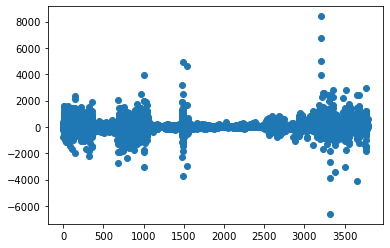

In [130]:
def k_means(data,max):
    means=[]
    inertias=[]
    for k in range(1,max):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
plt.scatter(data.ProductIDS,data.ProfitS)
        

In [138]:
data_WithoutLabels=data.iloc[:,0:5];
#Labels
data_Labels=data.iloc[:,5];
from sklearn.preprocessing import StandardScaler
#instanciation 
sc = StandardScaler()
#Normalization
Z = sc.fit_transform(data_WithoutLabels)
print(Z)



[[-0.71291333  0.0332037   0.4095612   0.40512252 -0.2351664 ]
 [-0.31402497  0.04396832 -0.1848115  -0.1863497  -2.08171948]
 [ 1.363589    0.54923295  0.09387777  0.10211421 -0.2351664 ]
 ...
 [-0.0291433  -1.10569371  1.01873156  1.00629101 -2.08171948]
 [ 0.09668281 -1.5827012  -1.31189997 -1.31111654  0.68811014]
 [-0.07709635 -1.30201358 -0.08616043 -0.08696297 -2.08171948]]


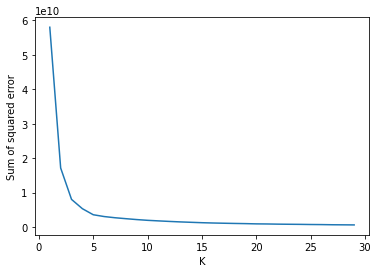

In [136]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
sse = []
k_rng = range(1,30)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['ProductIDS','ProfitS']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)